<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="salaryp.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Salary Class Prediction Classification
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Problem Statement

- The purpose of this project is to predict whether salary will fall under or over 50K. This model will help the company offer competitive pay to existing and future employees while also keeping payroll expenses in check.
- The basic problem is to find out a classification algorithm which will result in maximum accuracy in prediction of salary class (>50K, <=50K) based on the given set (or subset) of attributes.

# Data Definition

Columns are:
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* class: <=50K or >50K

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



<table align="left">
    <tr>
        <td width="10%">
            <img src="py.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Inferences from Outcome: The cell above is to import all the libraries which is Required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
df=pd.read_csv("adult1.csv")


<table align="left">
    <tr>
        <td width="6%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Inferences: Read and display data to get insights from the data </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

<table align="left">
    <tr>
        <td width="6%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Inferences: Display the top 5 rows of the dataframe </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## We are changing some names of columns for our convinence

In [5]:
df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [6]:
df.head()

age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18          ?  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [7]:
df.shape

(48842, 15)

<table align="left">
    <tr>
        <td width="6%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Inferences: To check the dimension of the DataFrame,
                                                ROWS=48842
                                                COLUMNS=15
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="needToKnow.jpeg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> This is the good dataset where cude(columns)=3375 where rows in dataset are more,so this is good dataset.  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="why.jpeg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Why to do this next step:The info() function is used to print a concise summary of a DataFrame</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**Inferences:**
   * The shape of the dataframe (rows=48842,cloumns=15).
   * There are displaying the type of the columns,where there are 6 numerical column and 9 categorical column.
   * There are no null values present in the dataset.
   * Numerical Attributes:['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week,                                  education-num']
   * Categorical Attributes:['workclass', 'education','marital-status''occupation', 'relationship',                                               'race', 'sex', 'native-country','class']
   * The column education-num is wronglly classfied,so after doing the univarate analysis,we are changing the type       to object

#### Why to do this next step:To know the Descriptive statistics summary of the Dataframe

In [9]:
df.describe()

age         fnlwgt  education-num  capital-gain  capital-loss  \
count 48842.000000   48842.000000   48842.000000  48842.000000  48842.000000   
mean     38.643585  189664.134597      10.078089   1079.067626     87.502314   
std      13.710510  105604.025423       2.570973   7452.019058    403.004552   
min      17.000000   12285.000000       1.000000      0.000000      0.000000   
25%      28.000000  117550.500000       9.000000      0.000000      0.000000   
50%      37.000000  178144.500000      10.000000      0.000000      0.000000   
75%      48.000000  237642.000000      12.000000      0.000000      0.000000   
max      90.000000 1490400.000000      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

 **Inferences:**
   * The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%),    minimum, and maximum values,with the standard deviation.
   * According to the count there are no misssing values in the dataset.
   * We cannot consider the describe of education-num because it comes as categorical for Education.
   * There are no large difference between mean and median of age,fnlwgt and hours per week, which indicates that there might be an absence of extreme outliers

#### why to do next step:To know the summary of the Categorical variables of the Dataframe.

In [10]:
df_cat=df.select_dtypes(include='object')
df_cat.describe()

workclass education      marital-status      occupation relationship  \
count      48842     48842               48842           48842        48842   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       33906     15784               22379            6172        19716   

         race    sex native-country  class  
count   48842  48842          48842  48842  
unique      5      2             42      2  
top     White   Male  United-States  <=50K  
freq    41762  32650          43832  37155

**Inference:**
   * The above illustrates the summary of all the category variable like count,unique,top,frequency.
   * All the count values are same,so there are no missing values.
   * The native-country has 42 unique value,where in the further process we can bucket them into the groups.
   * The sex has only two category in them.
   * Top=They give the highest repated values.
   * freq=They give frequency of how many times the mode Columns are repeated.
   * The most people work on private sector with frequency of 33906.
   * Most people have HS-Grad as their highest education with frequency of 15784.
   * Most people are Married-civ-spouse with frequency of 22379.
   * Most people have Prof-speciality as occupation with frequency of 6172.
   * Most people are husbands with frequency of 19716.
   * Most people are of white race with frequency of 41762.
   * Most people are of Male gender with frequency of 32650.
   * Most people are from United States with frequency of 43832.
   * Most people have less than 50K as salary with frequency of 37155.

#### Why to do next step:The univariate analysis is done to focus on each and every attributes by the statistical and  visualization techniques for all the numeric and the categorical variable. 

# Univariate analysis

In [11]:
#This is to show how many columns are there in the dataframe.
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

### AGE 

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 

AGE : 0.5575803166133181


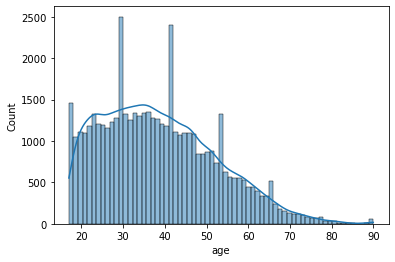

In [13]:
print('AGE :',df['age'].skew())
sns.histplot(data=df,x='age',kde=True);


**Inference:**
   * The skewness is 0.55 and even by the kde line,they are fairly symmetrical but slightly left skewed
   * The minimum age is 17 and maxmimum age is 90.
   * There are maxmimum values present in the range of 20 to 50.
   * There are less values after 80 so,we can infer that the outliers are present.

### Workclass 

In [14]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

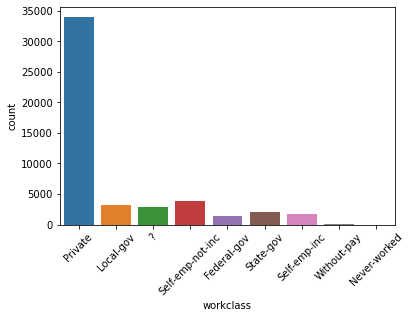

In [15]:
sns.countplot(df['workclass']);
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,15)
plt.xticks(rotation=45)
plt.show()

**Inference:**

   * The max value present in the workclass is 33906 the tuple is Private,where this highest frequency and this over mode.
   * The min value present in the workclass is 7 the tuple is never-worked,where they are low frequency and less values are there.
   * They have undefined tupe that is ?,we have to impute some value to get the meaning of the rows that are present.
   * There are 9 features in the workclass.
   * Total rows = 48842 where there are know null values present.

# fnlwgt 

fnlwgt : 1.4388918785218416


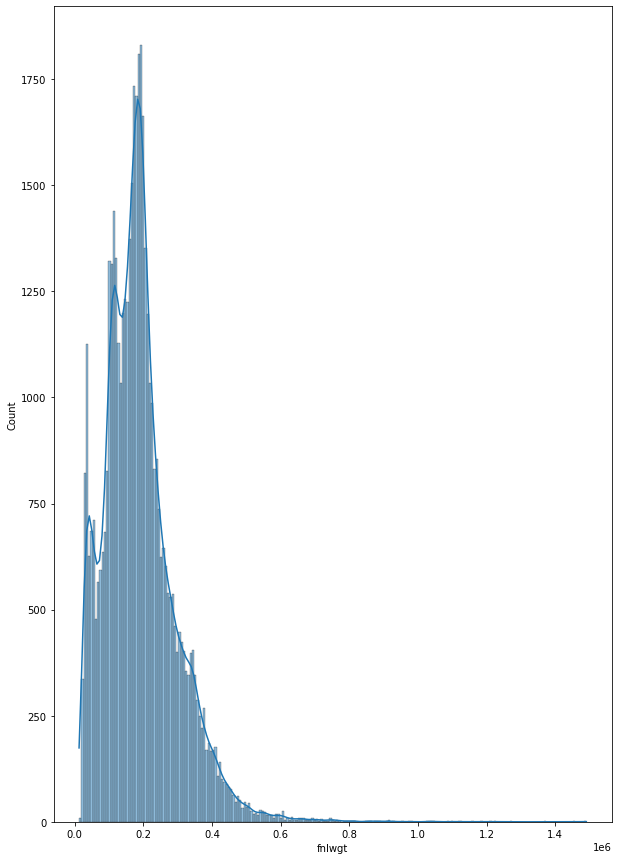

In [16]:
print('fnlwgt :',df['fnlwgt'].skew())
sns.histplot(data=df,x='fnlwgt',kde=True);
plt.rcParams['figure.figsize']=(20,6)

**Inference:**
    
   * The skewness is 1.44 and even by the kde line,they are highly left skewed.
   * The minimum fnlwgt is nearer to 0 but its not zero.
   * There are maxmimum values present in the range of 0.1 to 0.5
   * There are less values after 0.6 so,we can infer that the outliers are present.
   * The column is highly skewed soo we need to do transformation

# Education

In [17]:
df['education'].value_counts()


HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

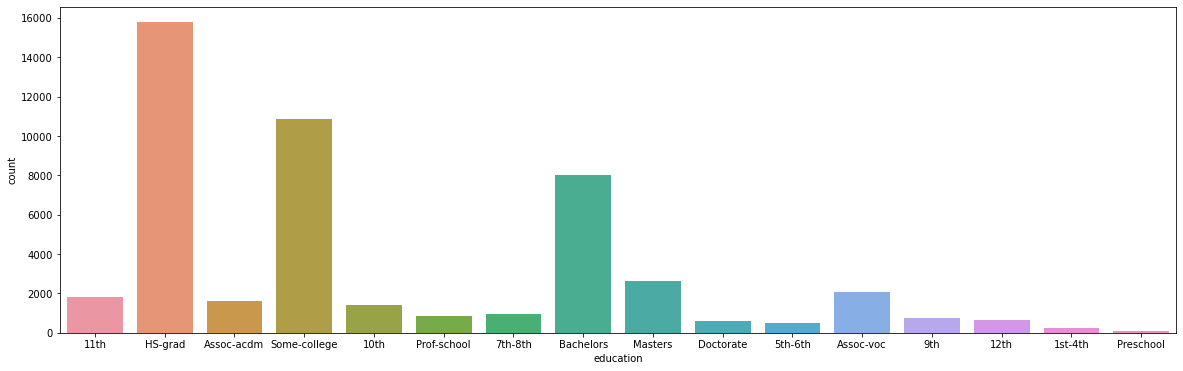

In [18]:
sns.countplot(df['education']);
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,15)

### Inference:

   * The max value present in the education is 15784 the tuple is HS-GRAD,where this highest frequency and this over mode.
   * The min value present in the education is 51 the tuple is Preschool,where they are low frequency and less values are there.
   * The 1st-4th,Preschool are less number of values or samples.
   * There are 16 features in the education,so we cant bucket so less features will be present and more examples on each features.
   * Total rows = 48842 where there are know null values present.

# Education-num

In [19]:
df['education-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: education-num, dtype: int64

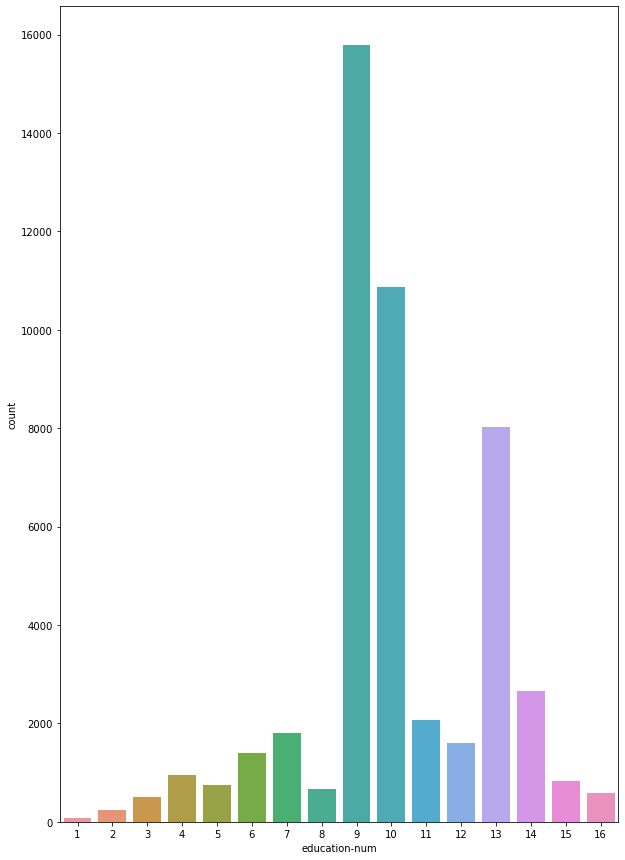

In [20]:
sns.countplot(df['education-num']);
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,15)

    Note:The education-num is the numerical variable (int64) where we have change catogery variable (object) 
        :The education-num is same education attributes where they have same frequency of values present in them but rows that are in the education name of the course and the education-num id of each courses. 
        :Example=HS-GRAD is the course and 9 is the id of that course.     
### Inference:
   * The max value present in the education is 15784 the tuple is 9 ,where this highest frequency and this over mode.
   * The min value present in the education is 51 the tuple is Preschool,where they are low frequency and less values are there.
   * The 1,2 id  are having less number of values or samples.
   * There are 16 unique variables in the education,so we cant bucket so less features will be present and more examples on each features.
   * Total rows = 48842 where there are know null values present.

# Marital-status

In [21]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

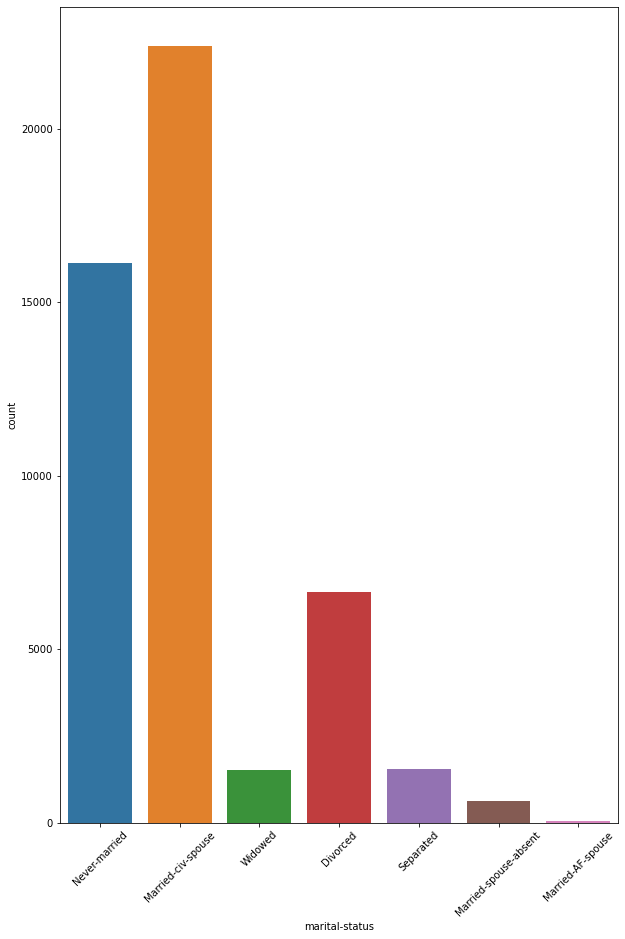

In [22]:
sns.countplot(df['marital-status']);
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(20,10)
plt.xticks(rotation=45)
plt.show()

### Inference:

   * The max value present in the marital-status is 22379 the tuple is married-civ-spouse,where this highest frequency and this our mode.
   * The min value present in the marital-status is 23 the tuple is married-af-spouse,where they are low frequency and less values are there.
   * The 1st-4th,Preschool are less number of values or samples.
   * There are 7 unique variables,where married-af-spouse has less samples.
   * Total rows = 48842 where there are know null values present.

# Occupation

In [23]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

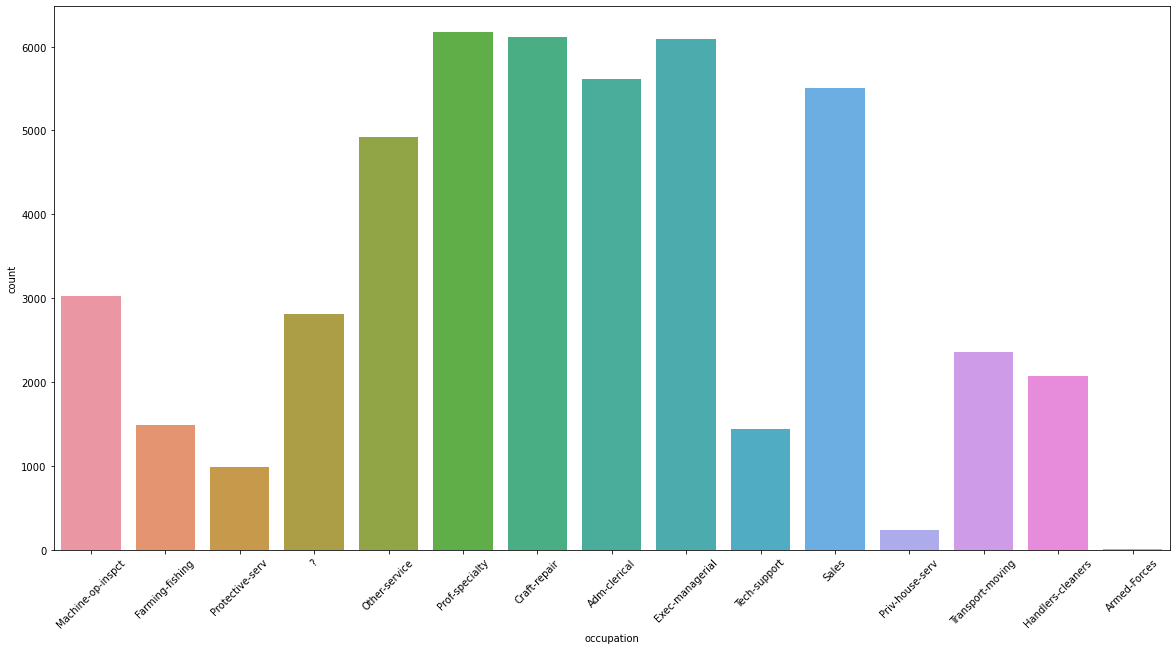

In [24]:
sns.countplot(df['occupation']);
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(30,15)
plt.xticks(rotation=45)
plt.show()

### Inference:

   * The max value present in the occupation is 6172 the tuple is prof-specialty,where this highest frequency and this our mode.
   * The min value present in the occupation is 9 the tuple is armed-forces,where they are low frequency and less values are there.
   * They have undefined tupe that is ?,we have to impute some value to get the meaning of the rows that are present.
   * There are 15 unique variables in the occupation.
   * Total rows = 48842 where there are know null values present.

# Relationship

In [25]:
df['relationship'].value_counts() 

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

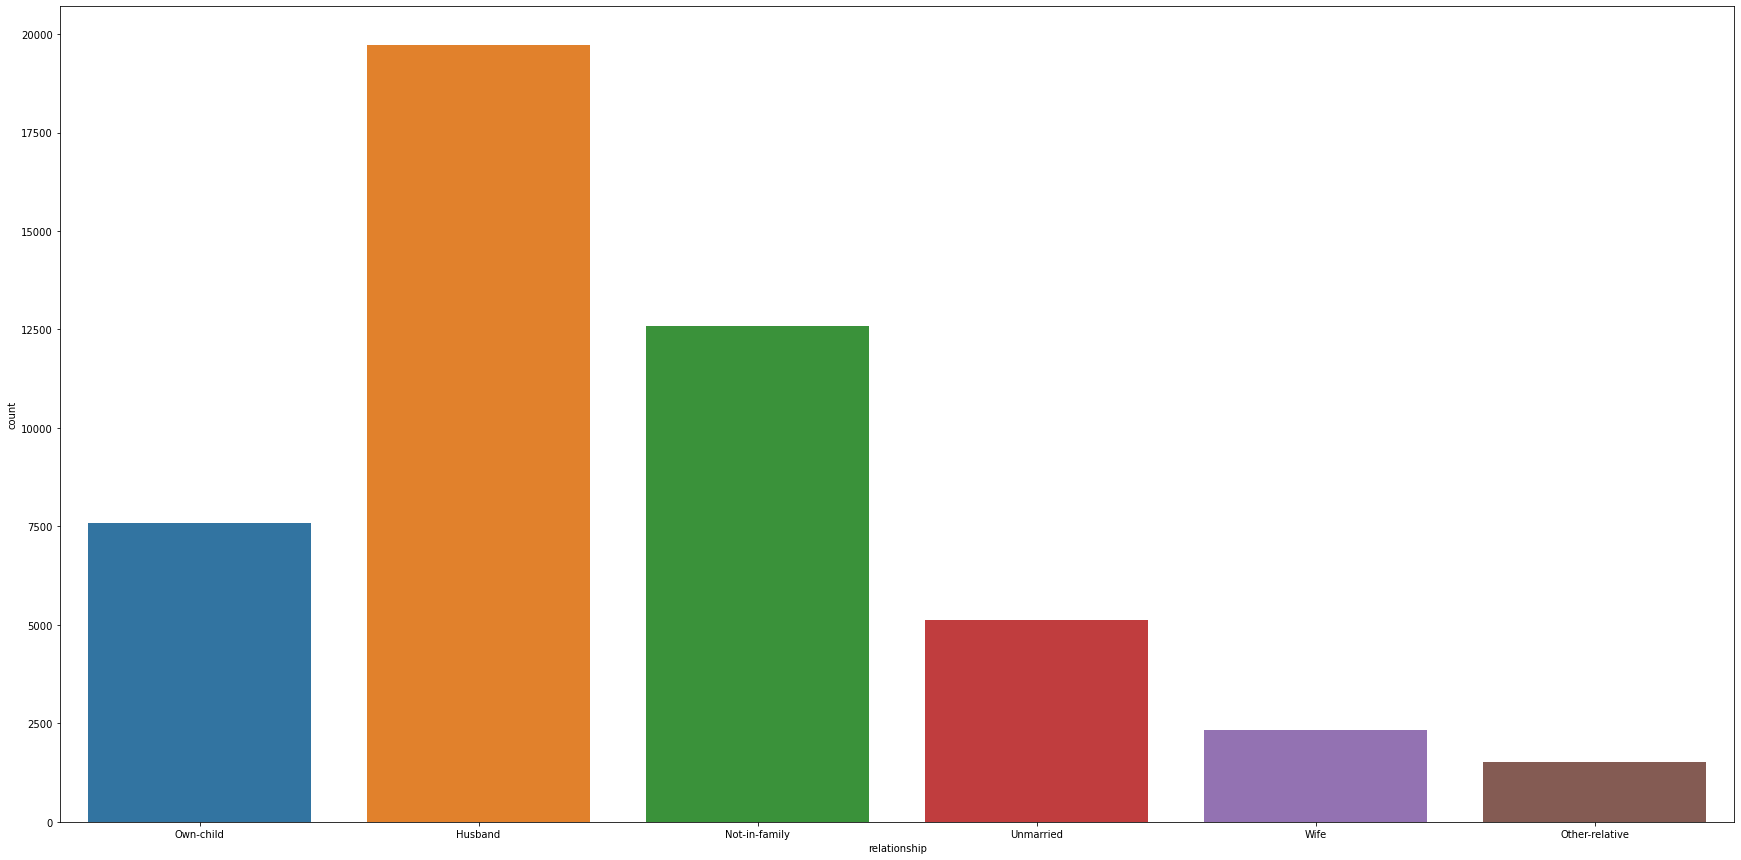

In [26]:
sns.countplot(df['relationship']);
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

### Inference:

   * The max value present in the relationship is 19716 the tuple is  Husband,where this highest frequency and this our mode.
   * The min value present in the relationship is  1506 the tuple is  Other-relative,where they are low frequency and less values are there.
   * There are 6 unique variables in the relationship.
   * Total rows = 48842 where there are know null values present.

# Race 

In [27]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

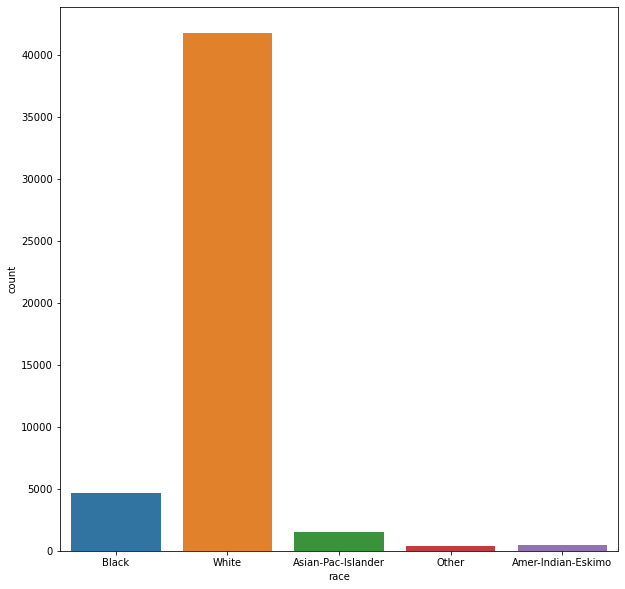

In [28]:
sns.countplot(df['race']);
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

### Inference:

   * The max value present in the race is 41762 the tuple is  white,where this highest frequency and this our mode.
   * The min value present in the race is  406 the tuple is  other,where they are low frequency and less values are there.
   * There are 5 unique variables in the race.
   * Total rows = 48842 where there are know null values present.

# Sex

In [29]:
df['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

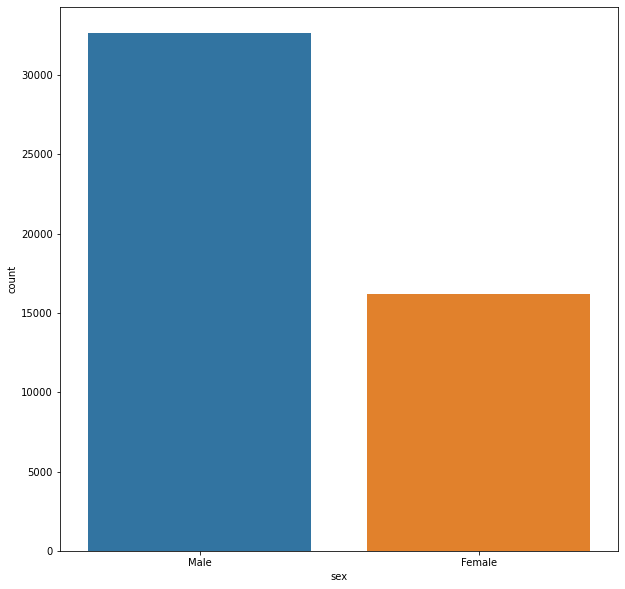

In [30]:
sns.countplot(df['sex']);
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

### Inference:

   * The max value present in the sex is 32650 the tuple is  male,where this highest frequency and this our mode.
   * The min value present in the sex is  16192 the tuple is  Female,where they are low frequency and less values are there.
   * There are 2 unique variables in the race.
   * Total rows = 48842 where there are know null values present.
   * According to the sex attribute the male are working more compared to female according to this dataset.

# Capital-gain

capital-gain : 11.894658996587946


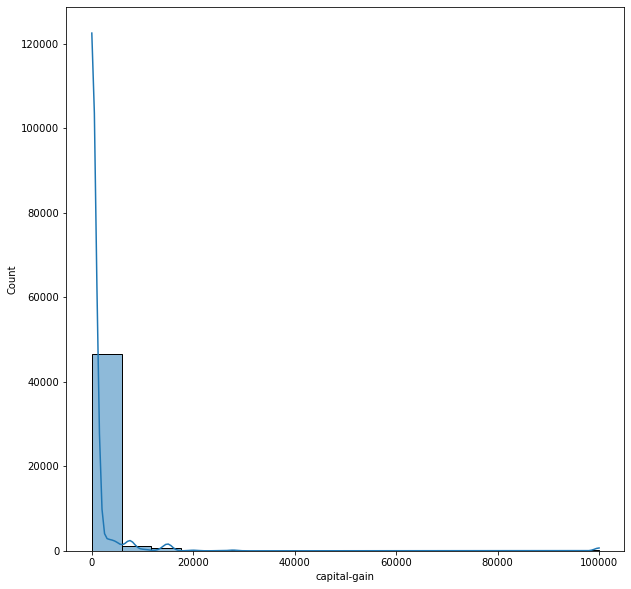

In [31]:
print("capital-gain :",df['capital-gain'].skew())
sns.histplot(data=df,x='capital-gain',kde=True);
plt.rcParams['figure.figsize']=(10,5)

### Inference:

   * The skewness is 11.95 and even by the kde line,they are highly skewed.
   * The minimum captial-gain is 0,where we can infer that some of the rows present  in captial-gain has no gain itself.
   * There are maxmimum values present in the range 2 of 100000
   * There are less values after 10000 so,we can infer that the outliers are present.
   * The column is highly skewed soo we need to do transformation

# Capital-loss

capital-loss : 4.569808857738484
capital-loss(mean) : 87.50231358257237


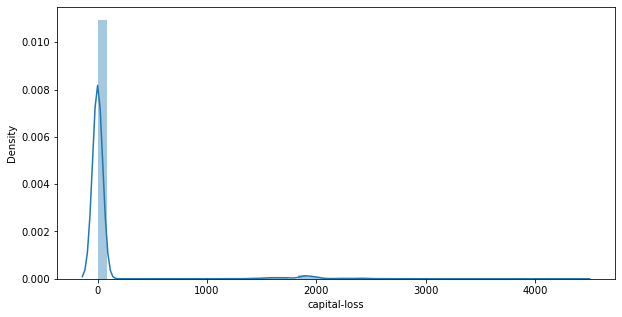

In [32]:
print("capital-loss :",df['capital-loss'].skew())
print("capital-loss(mean) :",df['capital-loss'].mean())
sns.distplot(df['capital-loss'],kde=True);
plt.rcParams['figure.figsize']=(15,8)

### Inference:

  * The skewness is 4.59 and even by the kde line,they are highly skewed.
  * The minimum captial-gain is 0,where we can infer that some of the rows present  in captial-gain has no gain itself.
  * There are values present in the 0(+-) 1std.
  * There are less values after 2000 so,we can infer that the outliers are present.
  * The column is highly skewed soo we need to do transformation.
  * The marginal loss in the column.

# Hours-per-week 

hours-per-week : 0.23874965720275756


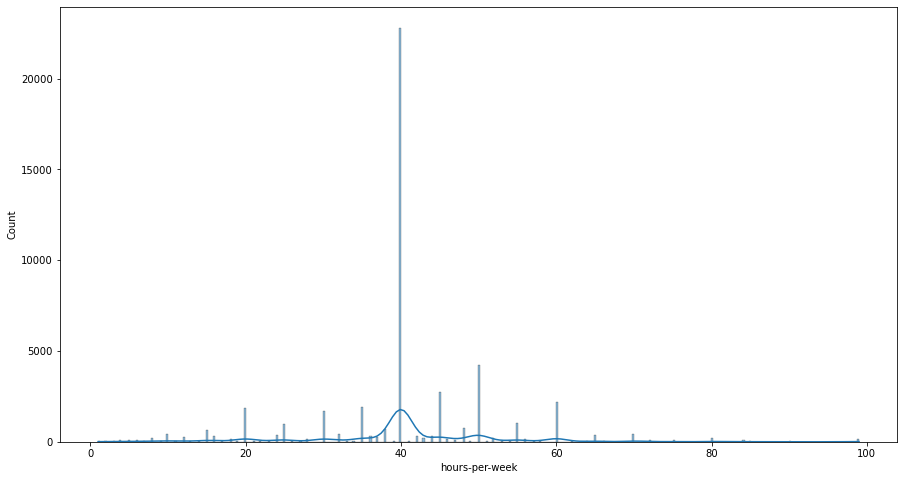

In [33]:
print("hours-per-week :",df['hours-per-week'].skew())
sns.histplot(data=df,x='hours-per-week',kde=True);
plt.rcParams['figure.figsize']=(10,5)

### Inference:

   * The skewness is 0.22 and even by the kde line,they are highly skewed.
   * The minimum captial-gain is 0,where we can infer that some of the rows present  in captial-gain has no gain itself.
   * There are values present in the 0(+-) 1std.
   * There are less values after range of hours 0 to 20 and 75 to 100 so,we can infer that the outliers are present.
   * The column is lightly  skewed soo we need to do Box-cox transformation
   * There are more people working 40 hours-per-week,and in that region they are nearly normally distrinuuted.

# Native-country

In [34]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

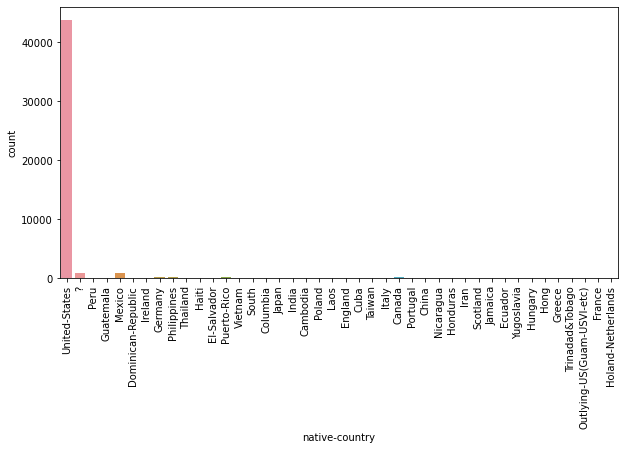

In [35]:
sns.countplot(df['native-country']);
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)
plt.xticks(rotation=90)
plt.show()

### Inference:

   * The max value present in the native-country is 43832 the tuple is united-states this highest frequency and this over mode.
   * The min value present in the native-country is 1 the tuple is holand-netherlands,where they are low frequency and less values are there.
   * They have undefined tupe that is ?,we have to impute some value to get the meaning of the rows that are present.
   * There are 42 features in the native-country.
   * Total rows = 48842 where there are know null values present.
   * There are 42 variables in native-country where we can do some feature engeneering or bucket them into the groups.

In [36]:
df.head(3)

age  workclass  fnlwgt   education  education-num      marital-status  \
0   25    Private  226802        11th              7       Never-married   
1   38    Private   89814     HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951  Assoc-acdm             12  Married-civ-spouse   

          occupation relationship   race   sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black  Male             0             0   
1    Farming-fishing      Husband  White  Male             0             0   
2    Protective-serv      Husband  White  Male             0             0   

   hours-per-week native-country  class  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K

# Class

In [37]:
df['class'].value_counts()

<=50K    37155
>50K     11687
Name: class, dtype: int64

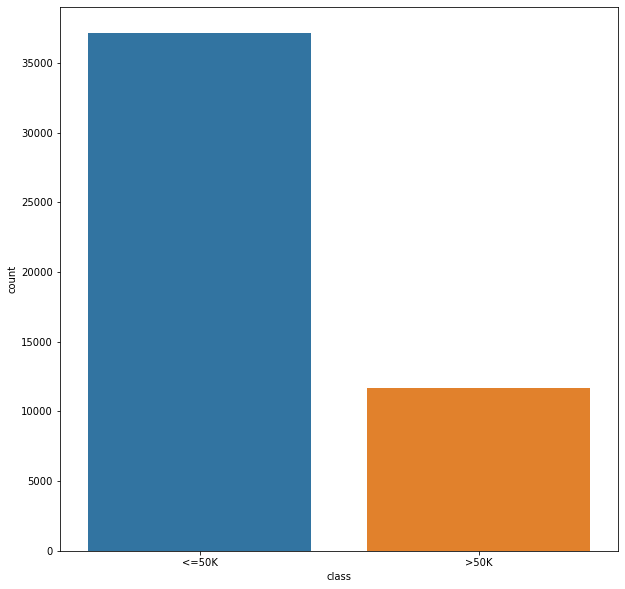

In [38]:
sns.countplot(df['class']);
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

**Inference:**

   * The attribuet class is the Target column.
   * Target variable is class where they have binary values that are class greater than equal to 50 and class less than 50k.
   * The max value present in the class is greater than equal to 50k.
   * The min value present in the sex is  981 the tuple is  Female,where they are low frequency and less values are there.
   * There are 2 unique variables in the race.
   * Total rows = 48842 where there are know null values present.
   * According to the class attribute the =<50K are earning more.
   * According to the class attribute the >50K are earning less,we will see which all attributes are affecting the target variable class.

#### why to do next step:We are taking the only numerical to check if the outliers are present or not.

In [39]:
import numpy as np
#This step is only to take the numerical variable.
df_num=df.select_dtypes(include=np.number)

# Box Plot for numerical variable

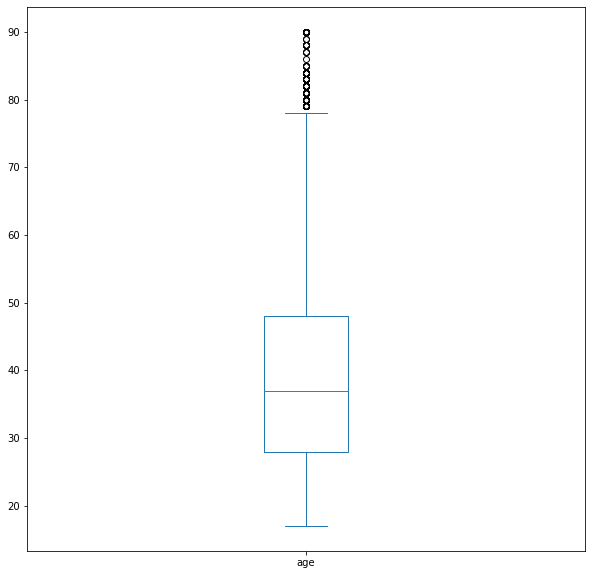

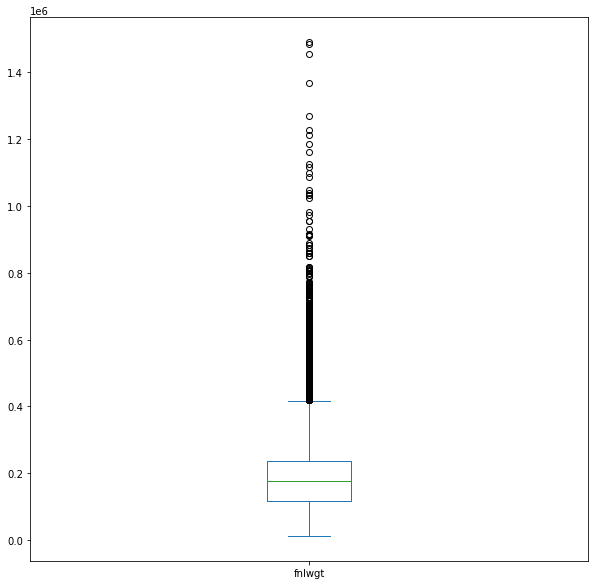

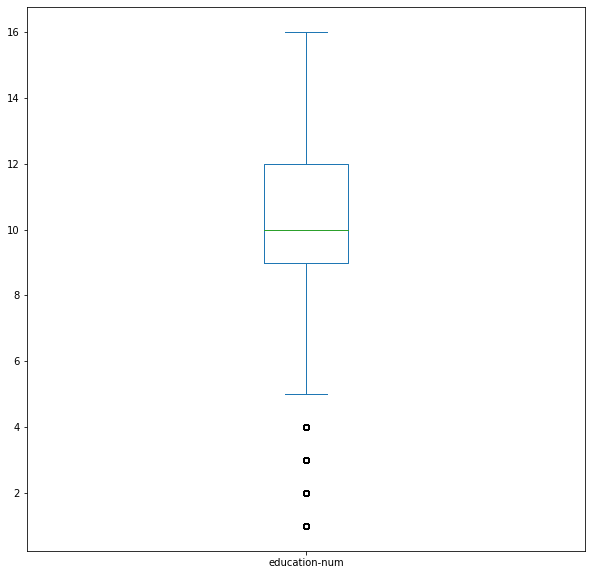

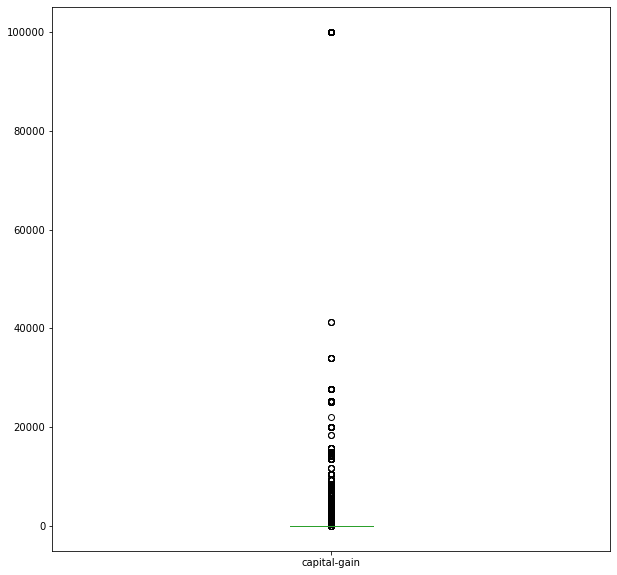

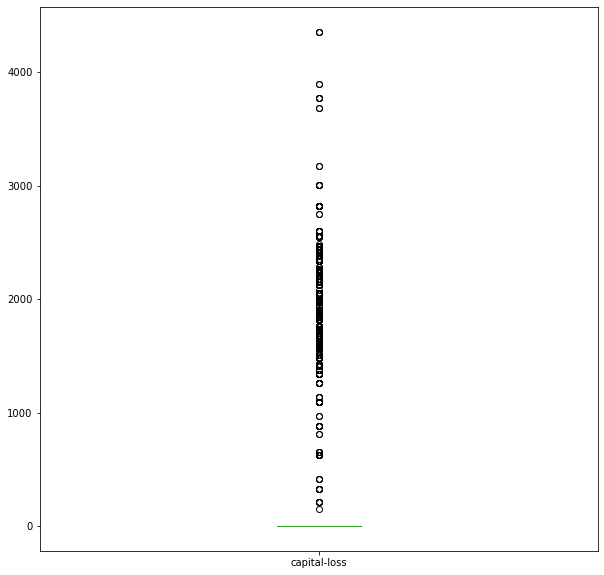

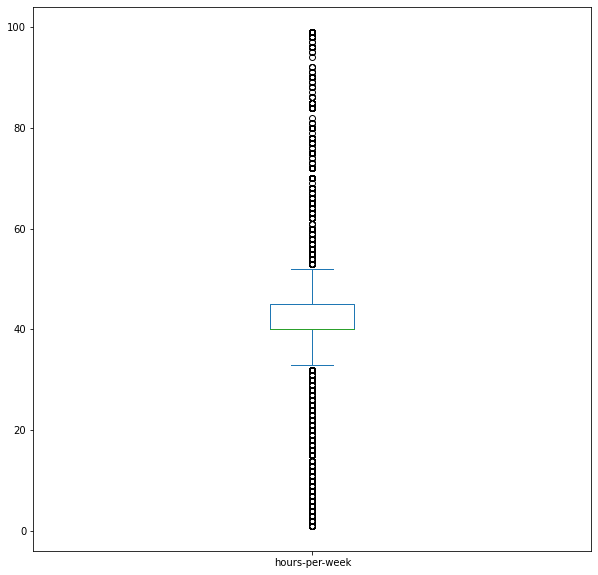

In [40]:
for i in df_num:
    df[i].plot(kind="box")
    plt.show()

### Inference:

   * Points above and below the whiskers are outliers in the variable. These outliers can affect the model performance.
   * The outliers are present in 'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week'
   * In the age there are outliers,there are present in the upper wisker by this we can know that we have more age people present in the attribute,where we can remove any outliers.
   * In the fnlwgt there are outliers,there are present in the upper wisker by this we can know that we have more weight group people present in the attribute,where we can remove any outliers.
   * In the education-num there are outliers,there are present in the lower wisker by this we can know that we have more weight group people present in the attribute,where we can remove any outliers.
   * In the capital - gain  and capital - loss attributes there are outliers seen long the above wisker.
   * In the hours per week there are oiutliers seen in both above and lower wisker.

## This is box plot,hist plot and kde  for all the numeric columns using the for loop.

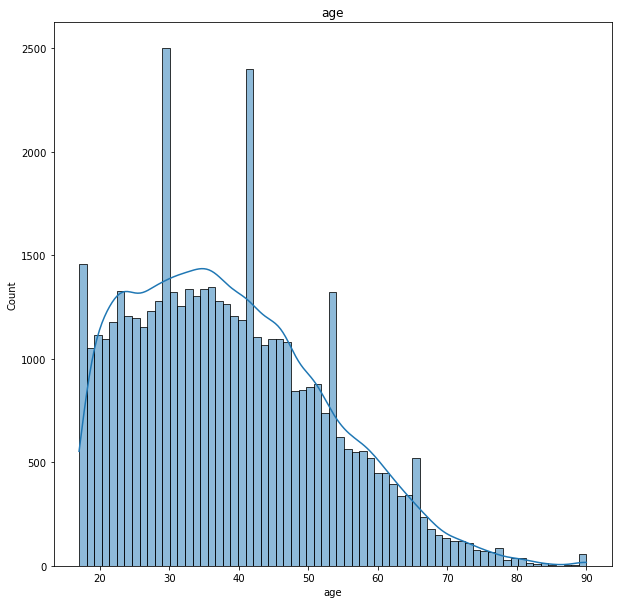

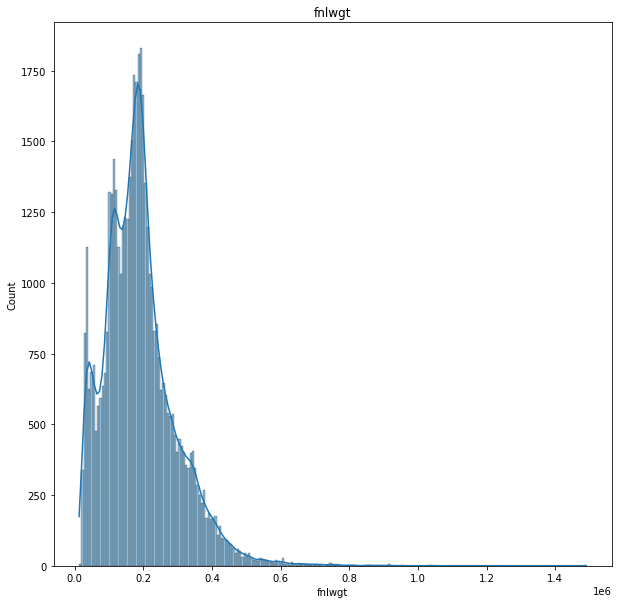

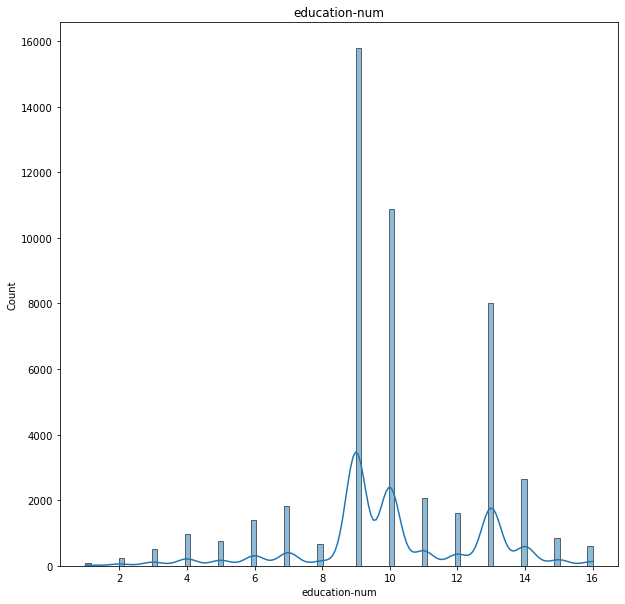

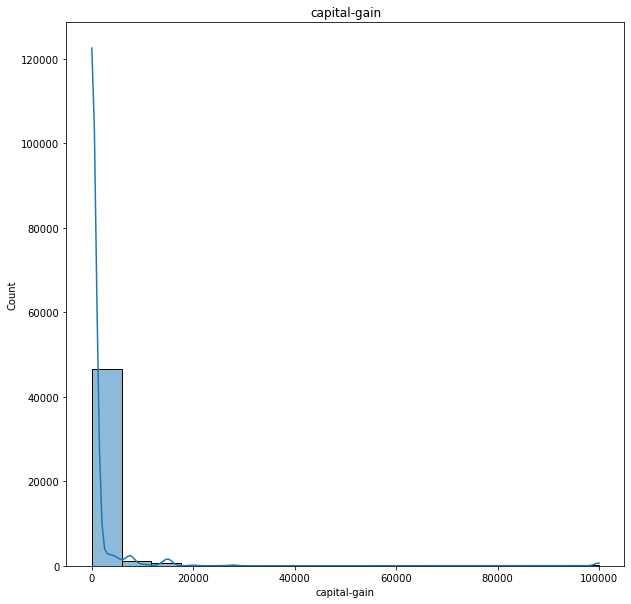

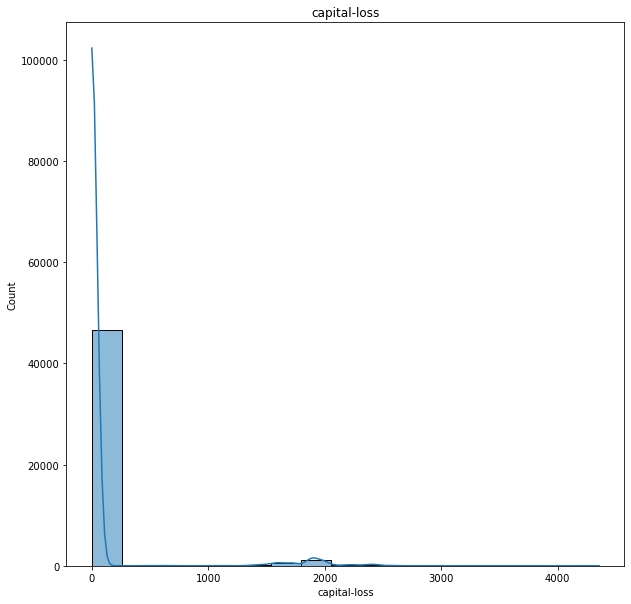

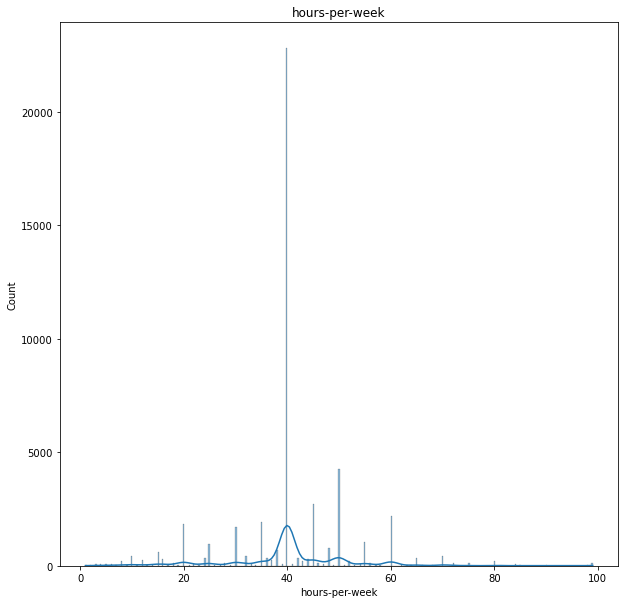

In [41]:
for i in df.select_dtypes(include=np.number).columns:
    plt.title(i)
    sns.histplot(df[i],kde=True)
    plt.show()
 

#### Why do we do the next step:There was wrongly assigend type for attribute.

# Checking the type of the attribute

In [42]:
##This info is only to check the type of columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Inference:

   * From the above output, we see that the data type of  is 'education-num' 'int64'.

But according to data definition, 'education-num' are categorical variables, which are wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.

In [43]:
## Changing the education-num column to object.
df['education-num']=df['education-num'].astype('object')

In [44]:
## This step is to check the education-num column has changed to object.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  object
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.6+ MB


# Missing value Treatment

In [45]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

#### Here we cannot see missing value as there are non-standard format missing data.

In [46]:
df.replace('?',np.nan,inplace=True)

In [47]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

#### Now we can see all the variables in which the missing values are present.


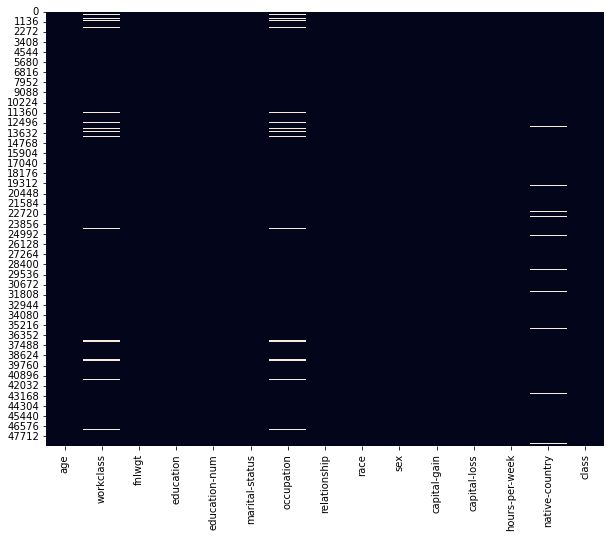

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [49]:
# There are missing values in the workclass and max frequency of that column is 24532 that is Private.
df['workclass'].value_counts().head(1)

Private    33906
Name: workclass, dtype: int64

#### Inference:
For imputing missing value in categorical variable we check mode(most frequent value) and then replace it with that.
Here for workclass 'Private' is mode we will replace null values with Private.

In [50]:
## There are missing values in the occupation and max frequency of that column is 5983 that is  Prof-specialty.
df['occupation'].value_counts().head(1)

Prof-specialty    6172
Name: occupation, dtype: int64

#### Inference:
For imputing missing value in categorical variable we check mode(most frequent value) and then replace it with that.
Here for occupation 'Prof-specialty' is mode we will replace null values with Pro-specialty.

In [51]:
## There are missing values in the native-country and max frequency of that column is 29753 that is   United-States .
df['native-country'].value_counts().head(1)

United-States    43832
Name: native-country, dtype: int64

#### Inference:
For imputing missing value in categorical variable we check mode(most frequent value) and then replace it with that.
Here for native-country 'United-States' is mode we will replace null values with United-States.

# Imputting the missing values for  the variables.

In [52]:
#df['workclass'] = df['workclass'].replace(np.nan,'Private')
#df['occupation'] = df['occupation'].replace(np.nan, 'Prof-specialty')
#df['native-country'] = df['native-country'].replace(np.nan,'United-States')

In [53]:
#df['workclass'] = df['workclass'].replace(np.nan,'UNKOWN')
#df['occupation'] = df['occupation'].replace(np.nan, 'UNKOWN')
#df['native-country'] = df['native-country'].replace(np.nan,'UNKOWN')

#### Inference:The missing values that are present in the columns are categorical variable,so in this process we have imputed the high frequency values that are present in each column.

In [54]:
## After the imputation of missing values,checking it once more.
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

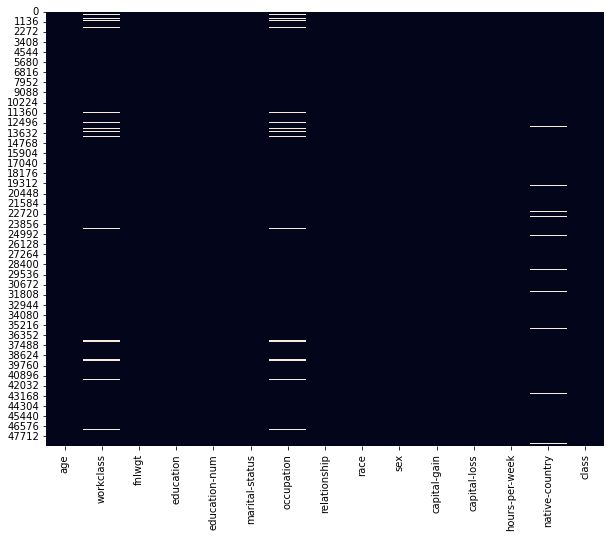

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

#### Inference: After imputing missing values with mode of the columns, now there are no missing values left.

# BIVARATE ANYALSIS

### Quantitative - Quantitative 
■Line plot 
■ Scatter plot 
■ Heatmap


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [57]:
#In this step we group all the numerical variables to the dataframe called df_num
df_num =df.select_dtypes(include =np.number)

#### Inference: We are selecting numerical variables for quantitative-quantative analysis.

In [58]:
#To print the first 4 columns of the numnerical dataset.
df_num.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0   25  226802              7             0             0              40
1   38   89814              9             0             0              50
2   28  336951             12             0             0              40
3   44  160323             10          7688             0              40
4   18  103497             10             0             0              30

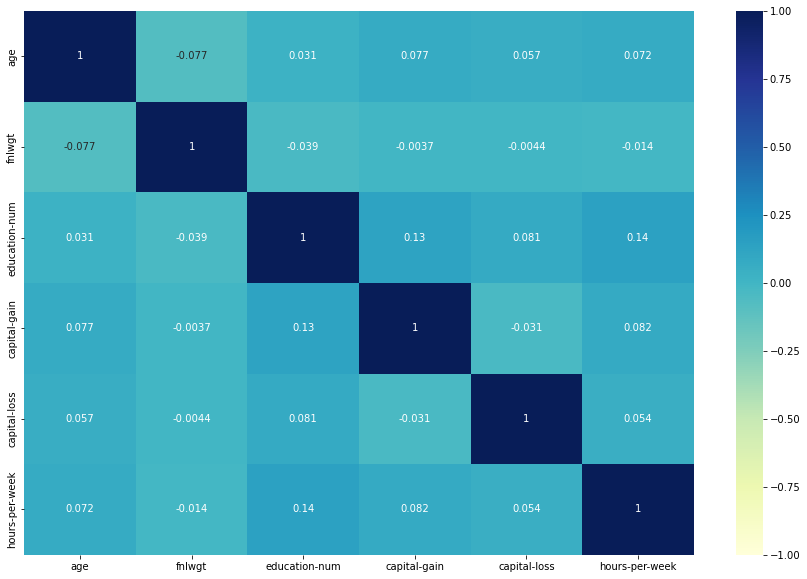

In [59]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(df_num.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)
plt.show()

### Inference:According to the heatmap none of the attributes are correlated.

# AGE AND fnlwgt

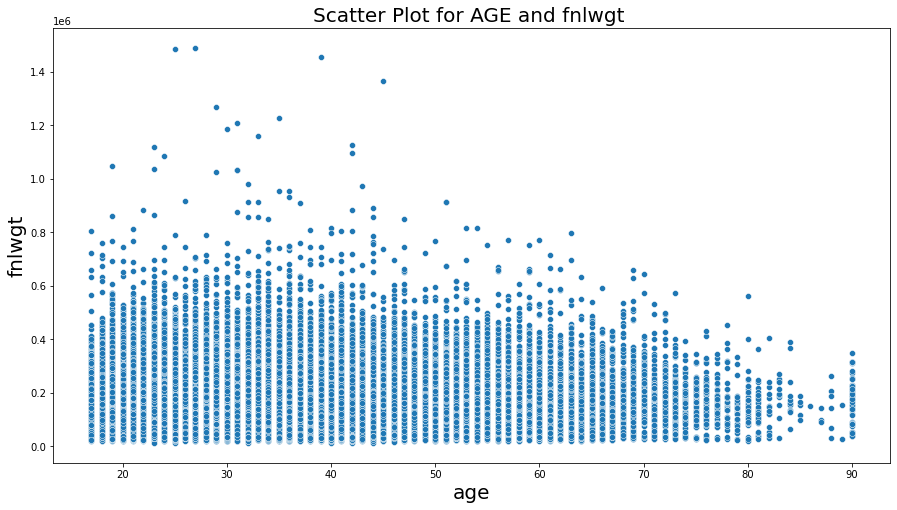

In [60]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.scatterplot('age', 'fnlwgt', data = df_num)
ax.set_ylabel('fnlwgt', fontsize=20)
ax.set_xlabel('age', fontsize=20)
plt.title("Scatter Plot for AGE and fnlwgt ", fontsize=20)
plt.show()

### Inference:

   * According to the scatterplot there is no correlation between age and fnlwght.
   * Maximun values are present in the age of 20 to 70 and fnlwght 0.1 to 0.5.
   * Less number of samples are present in the age 90 and fnlwght 0.1 to 0.3.
   * The outliers are present in the graph.
              

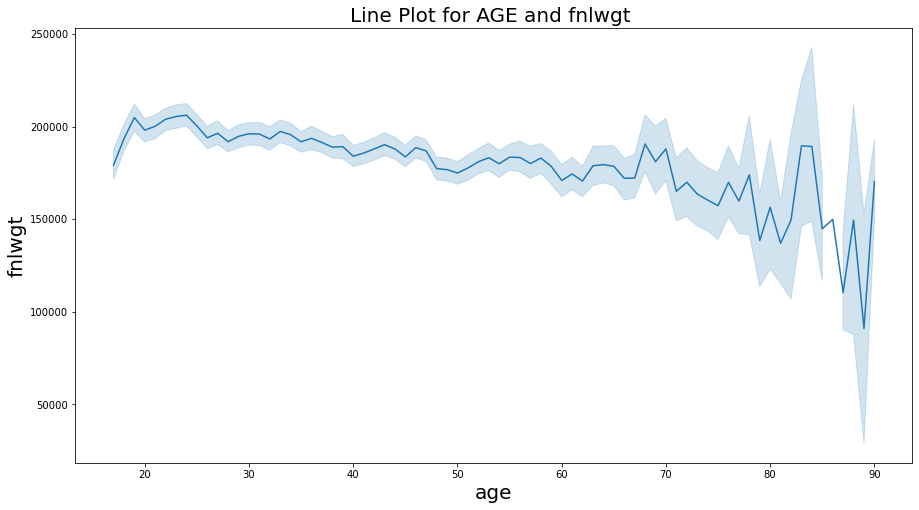

In [61]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.lineplot('age', 'fnlwgt', data = df_num)
ax.set_ylabel('fnlwgt', fontsize=20)
ax.set_xlabel('age', fontsize=20)
plt.title("Line Plot for AGE and fnlwgt ", fontsize=20)
plt.show()

### Inference:

   * From the age 20 to 80 they have little bit consistency.
   * There is drop around the age of 85.
   * The max fnlwght is around 225000

# AGE AND Capital-gain

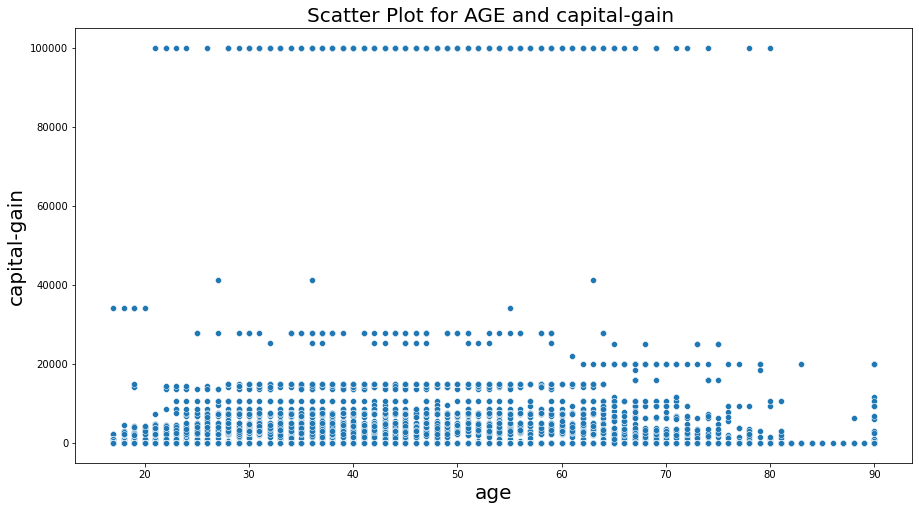

In [62]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.scatterplot('age', 'capital-gain', data = df_num)
ax.set_ylabel('capital-gain', fontsize=20)
ax.set_xlabel('age', fontsize=20)
plt.title("Scatter Plot for AGE and capital-gain ", fontsize=20)
plt.show()

### Inference:

   * According to the scatterplot there is no correlation between age and captial-gain.
   * There are many people in the age group 20 to 80 where there max captial-gain is 18000.
   * There are very less samples whose captial-gain is 100000 and age group is 20 to 80.
   * There are outliers are present in both the variables.
   * From the metric we can say that there is no negative correlation.

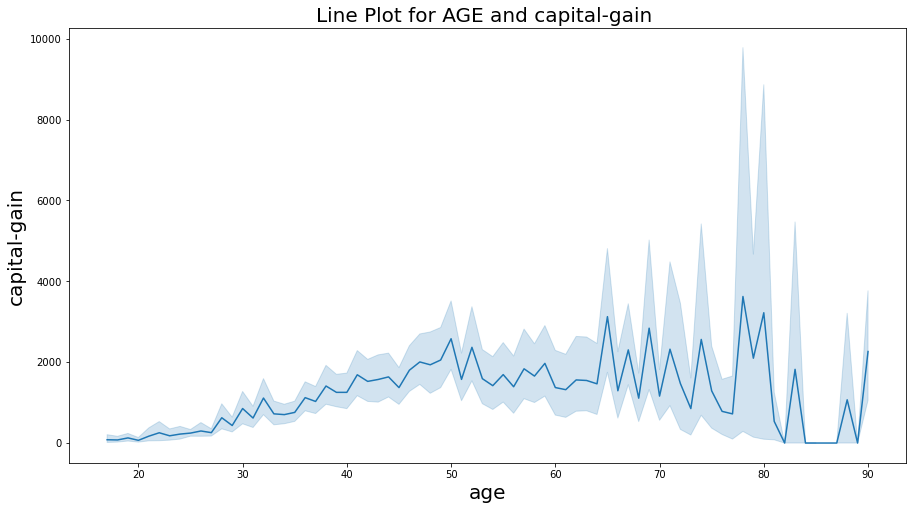

In [63]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.lineplot('age', 'capital-gain', data = df_num)
ax.set_ylabel('capital-gain', fontsize=20)
ax.set_xlabel('age', fontsize=20)
plt.title("Line Plot for AGE and capital-gain ", fontsize=20)
plt.show()

### Inference:

  * According to the line plot which is also known as the trend line,there is consistent growth in captial-gain as the age increases.
  * Below the age 20 there is know captial-gain.
  * At the age around 80 there is sudden increase in the captial-gain.
  * The max age is 90 and the captial-gain is around 2000.

# AGE AND Capital-loss

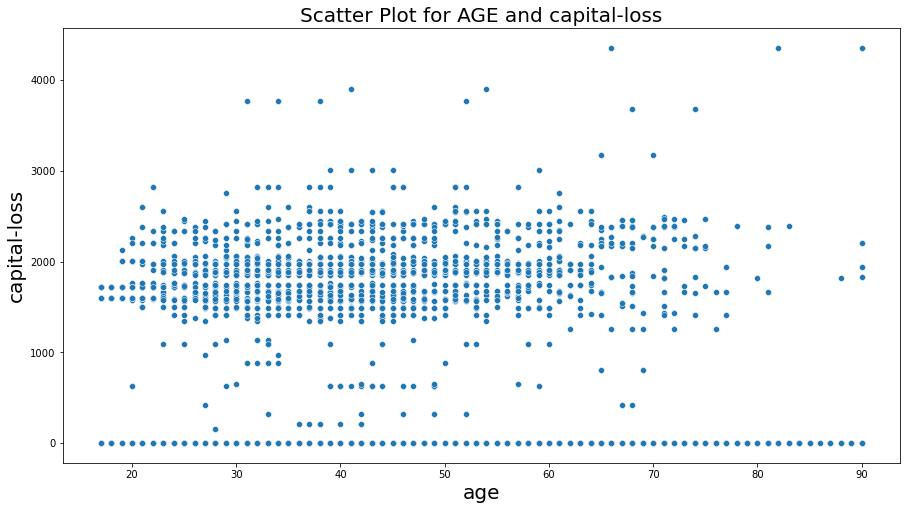

In [64]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.scatterplot('age', 'capital-loss', data = df_num)
ax.set_ylabel('capital-loss', fontsize=20)
ax.set_xlabel('age', fontsize=20)
plt.title("Scatter Plot for AGE and capital-loss", fontsize=20)
plt.show()

### Inference:

   * According to the scatterplot there is no correlation between age and captial-loss.
   * There are many people in the age group 20 to 60 where there max captial-loss is 3000.
   * There are very less samples whose captial-loss is 0 and age group is 20 to 90.
   * There are outliers are present in both the variables.
   * There are less samples in the captial-loss where it is 0 to 900.

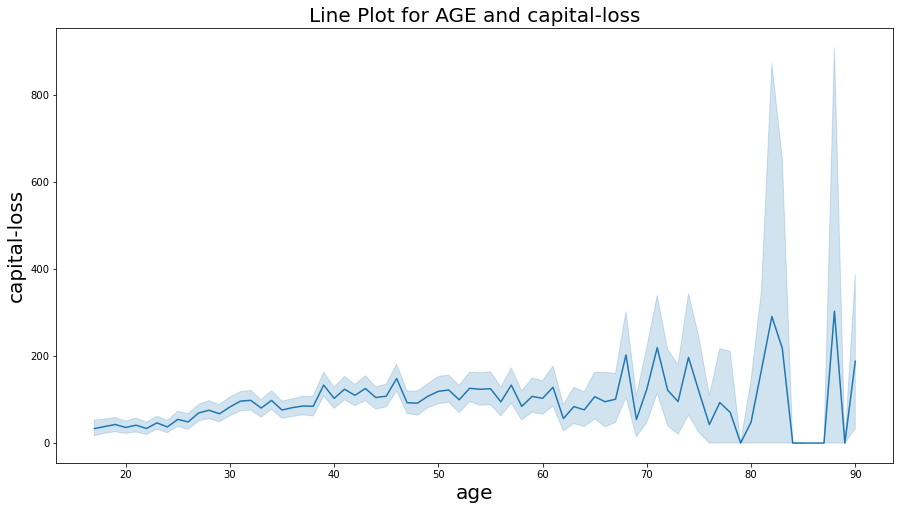

In [65]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.lineplot('age', 'capital-loss', data = df_num)
ax.set_ylabel('capital-loss', fontsize=20)
ax.set_xlabel('age', fontsize=20)
plt.title("Line Plot for AGE and capital-loss", fontsize=20)
plt.show()

### Inference:

   * There seems to be a trend in increase of capital-loss as age goes up. 

# AGE AND hours-per-week

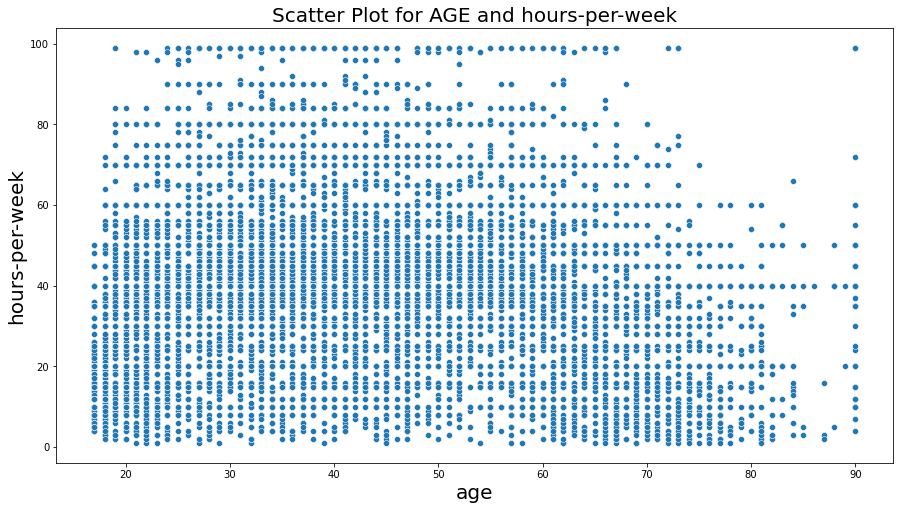

In [66]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.scatterplot('age', 'hours-per-week', data = df_num)
ax.set_ylabel('hours-per-week', fontsize=20)
ax.set_xlabel('age', fontsize=20)
plt.title("Scatter Plot for AGE and hours-per-week", fontsize=20)
plt.show()

### Inference:
    
   * According to the scatterplot there is no correlation between age and Hours-per-week.
   * There are many people in the age group 20 to 75 where there max hours-per-week is 100
   * There are very less samples whose captial-loss is 0 and age group is 20 to 90.
   * There are outliers are present in both the variables.
   * There are less samples in the age 90 and hours-per-week 100.
   * Since corr between age and working hours seems close to 0 we can say that there is no effect of one on other

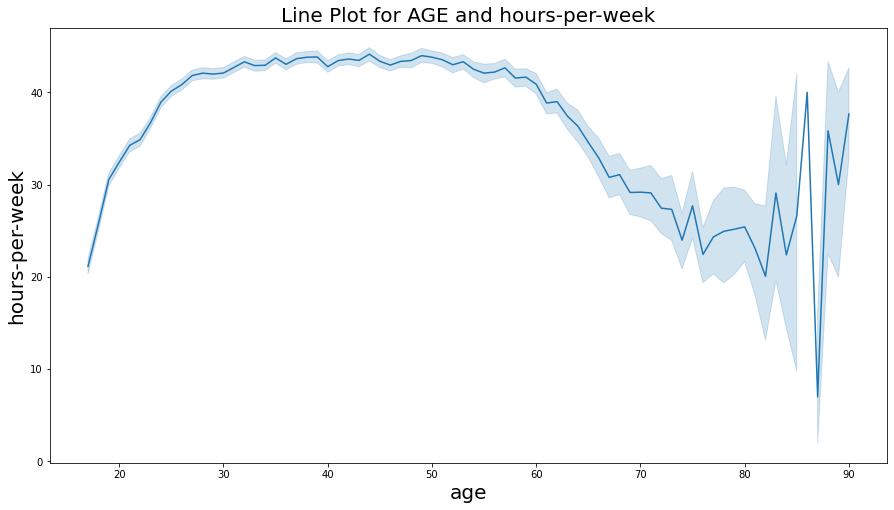

In [67]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.lineplot('age', 'hours-per-week', data = df_num)
ax.set_ylabel('hours-per-week', fontsize=20)
ax.set_xlabel('age', fontsize=20)
plt.title("Line Plot for AGE and hours-per-week", fontsize=20)
plt.show()

### Inference:

   * At around 85 there  is sudden drop in hours-per-week 
   * There is constant line tells us about the they are working perfectly 
   * The range about 60 to 70 they can have less working hours or they can work more also.
   * Max age is 90 and max-working hours is 40 hours-per-week.
   * Age between the 30 and 60 work efficiently and they work for 40 hours-per-week.

# fnlwgt AND capital-gain

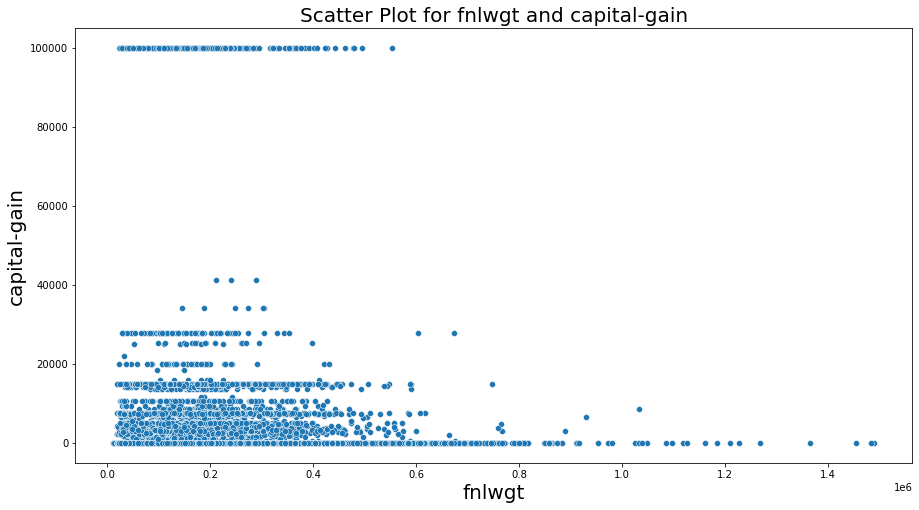

In [68]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.scatterplot('fnlwgt', 'capital-gain', data = df_num)
ax.set_ylabel('capital-gain', fontsize=20)
ax.set_xlabel('fnlwgt', fontsize=20)
plt.title("Scatter Plot for fnlwgt and capital-gain", fontsize=20)
plt.show()

### Inference:

   * According to scatter plot there is no correlation and the correlation value 0.0043 where it is close to zero.
   * The max values are present between 0.0 and 0.4 and the captial-gain is below 10000.
   * There are less samples at the fnlwgt 0.8 to 1.4 and above and where there is no gain.

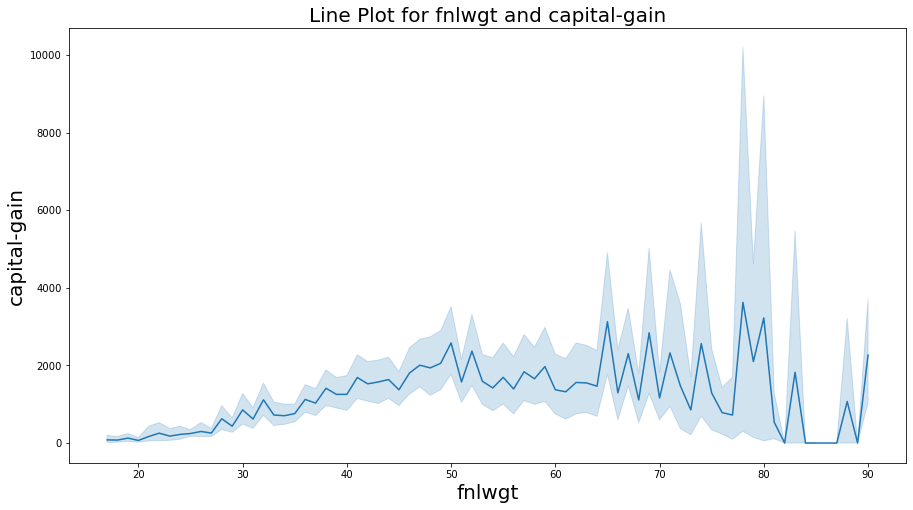

In [69]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.lineplot('age', 'capital-gain', data = df_num)
ax.set_ylabel('capital-gain', fontsize=20)
ax.set_xlabel('fnlwgt', fontsize=20)
plt.title("Line Plot for fnlwgt and capital-gain", fontsize=20)
plt.show()

### Inference:

   * According to line plot there is constient increase in the captial-gain as the fnlwgt increases.
   * There are more captial-gain in the fnlwgt 80.
   * Max fnlwgt is 90 that is where the trend stops.
            

# fnlwgt AND capital-loss

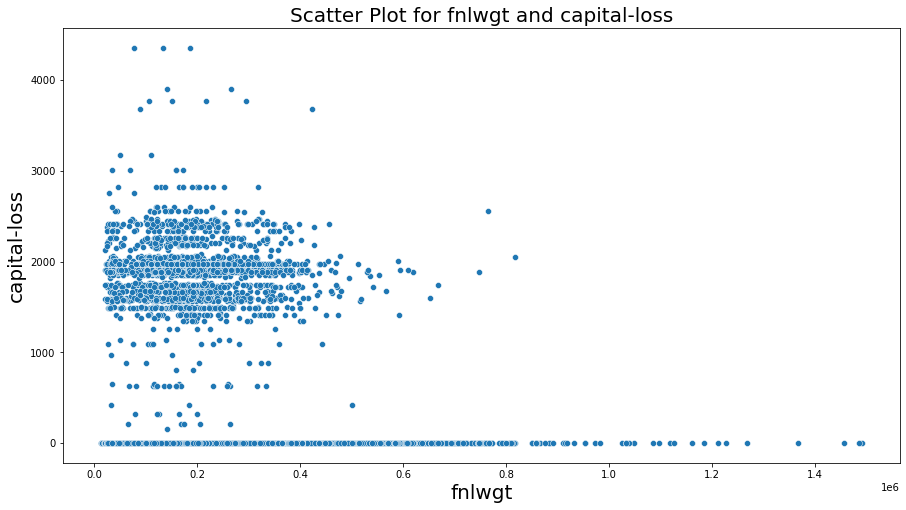

In [70]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.scatterplot('fnlwgt', 'capital-loss', data = df_num)
ax.set_ylabel('capital-loss', fontsize=20)
ax.set_xlabel('fnlwgt', fontsize=20)
plt.title("Scatter Plot for fnlwgt and capital-loss", fontsize=20)
plt.show()

### Inference:

   * According to scatter plot there is no correlation and the correlation value -0.01 where it is close to zero.
   * The max values are present between 0.0 to 0.3 fnlwgt and the captial loss is 1200 and 2500 .
   * There are outliers are present in zero captial-loss where they are very important less samples we cant ignore them.

In [71]:
#plt.rcParams["figure.figsize"] = [15,8]
#ax = sns.lineplot('fnlwgt', 'capital-loss', data = df_num)
#ax.set_ylabel('capital-loss', fontsize=20)
#ax.set_xlabel('fnlwgt', fontsize=20)
#plt.title("Line Plot for fnlwgt and capital-loss", fontsize=20)
#plt.show()

# fnlwgt AND hours-per-week

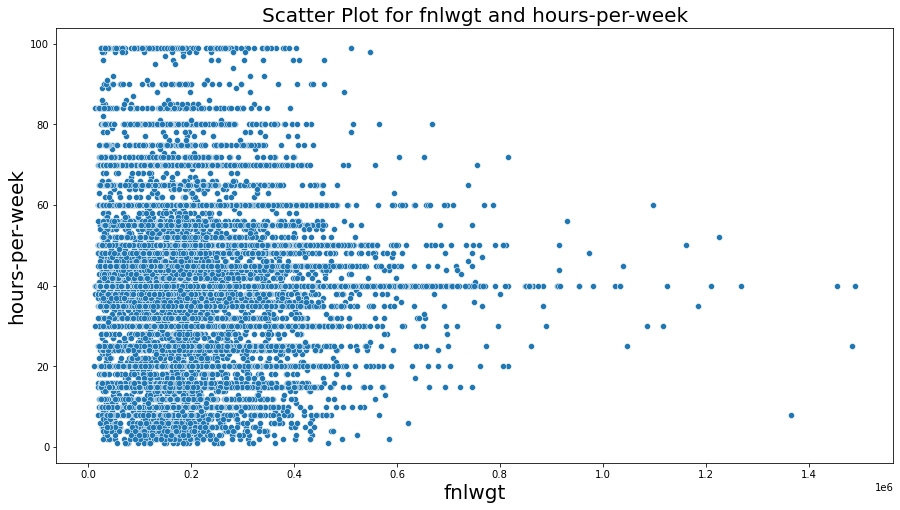

In [72]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.scatterplot('fnlwgt', 'hours-per-week', data = df_num)
ax.set_ylabel('hours-per-week', fontsize=20)
ax.set_xlabel('fnlwgt', fontsize=20)
plt.title("Scatter Plot for fnlwgt and hours-per-week", fontsize=20)
plt.show()

### Inference:

   * According to this scatter plot there is no correleation between the fnlwgt and hours-per-week.
   * Max values are present between 0.1 and 0.3 fnlwgt and 0 to 60 hours.
   * There are less samples at 0.6 and 1.4 where they are working hours are pretty good.

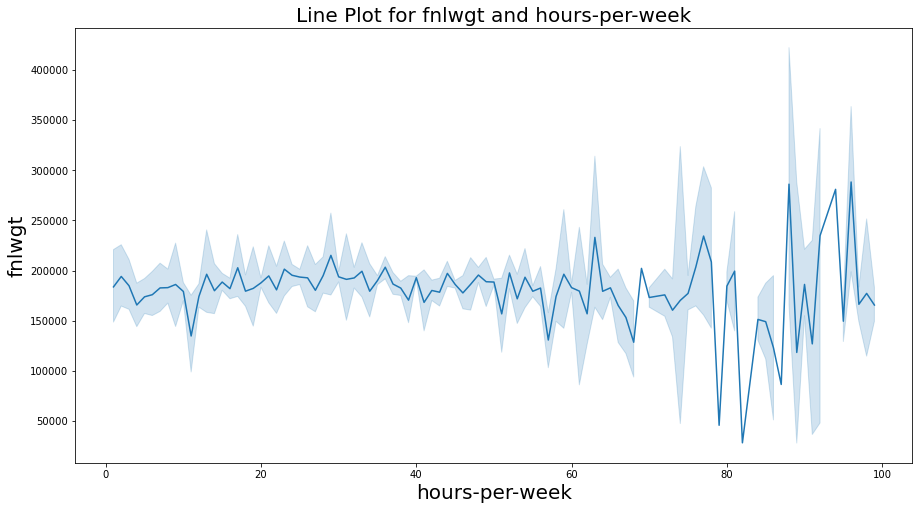

In [73]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.lineplot('hours-per-week','fnlwgt', data = df_num)
ax.set_ylabel('fnlwgt', fontsize=20)
ax.set_xlabel('hours-per-week', fontsize=20)
plt.title("Line Plot for fnlwgt and hours-per-week", fontsize=20)
plt.show()

### Inference:

   * Now i have changed the x and y plane to get the better get the better interpretation on it .
   * There is  constineny in the fnlwgt till the hours-per-week is 75.
   * There is sudden drop at 80,soo we cant see that data at tell that why big drop has happened.
   * There is sudden uplift of the 82 hour-per-week this  impact on data, we can check why this has happened also.

# Capital-gain AND Capital-loss

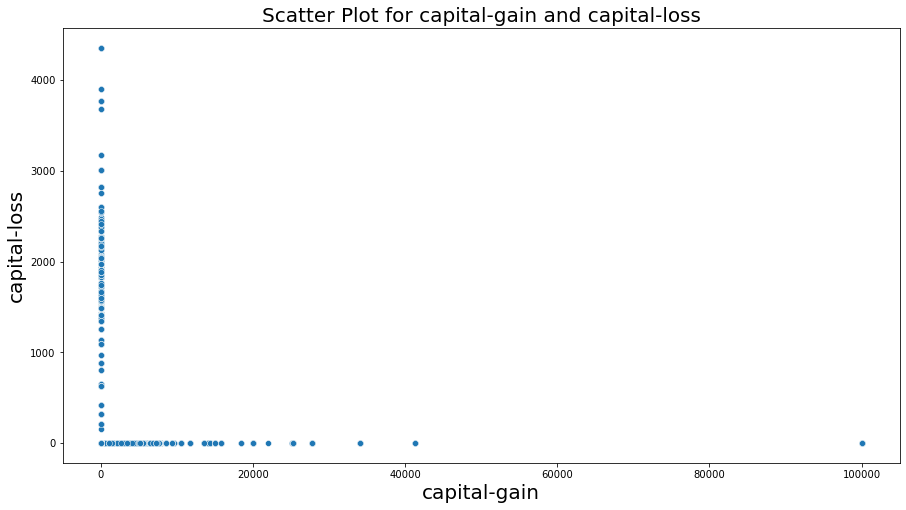

In [74]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.scatterplot('capital-gain', 'capital-loss', data = df_num)
ax.set_ylabel('capital-loss', fontsize=20)
ax.set_xlabel('capital-gain', fontsize=20)
plt.title("Scatter Plot for capital-gain and capital-loss", fontsize=20)
plt.show()

### Inference:
### Possibilities for capital gain and capital loss

##### Both capital gain and capital loss can be zero
##### If capital.gain is zero there is possibility of capital loss being high or above zero.
##### If capital loss is zero there is possibility of capital.gain being high or above zero.

# Capital-gain AND hours-per-week

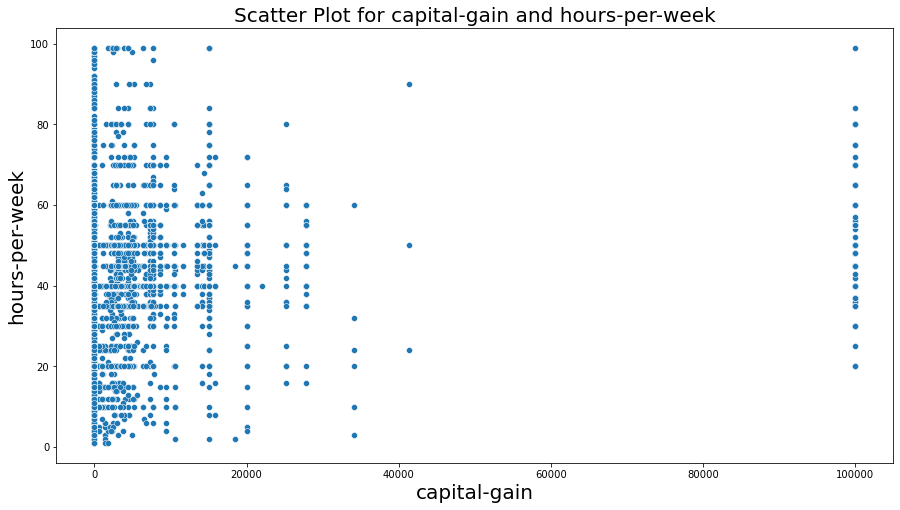

In [75]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.scatterplot('capital-gain', 'hours-per-week', data = df_num)
ax.set_ylabel('hours-per-week', fontsize=20)
ax.set_xlabel('capital-gain', fontsize=20)
plt.title("Scatter Plot for capital-gain and hours-per-week", fontsize=20)
plt.show()

* no Interpretation.

# Capital-loss AND hours-per-week

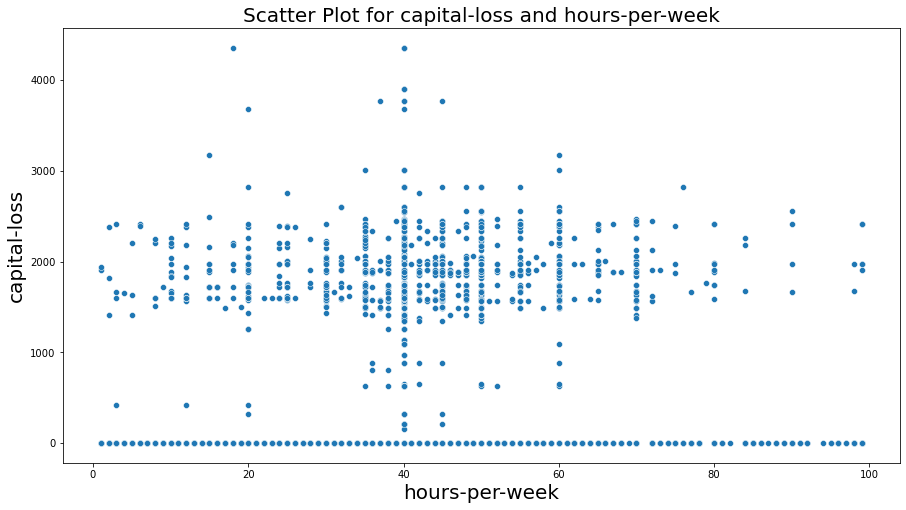

In [76]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.scatterplot('hours-per-week', 'capital-loss', data = df_num)
ax.set_ylabel('capital-loss', fontsize=20)
ax.set_xlabel('hours-per-week', fontsize=20)
plt.title("Scatter Plot for capital-loss and hours-per-week", fontsize=20)
plt.show()

### Inference:

   * The scatterplot wasn't very expressive. In this case so on finding corr between the two entities we can safely say that they aren't related.

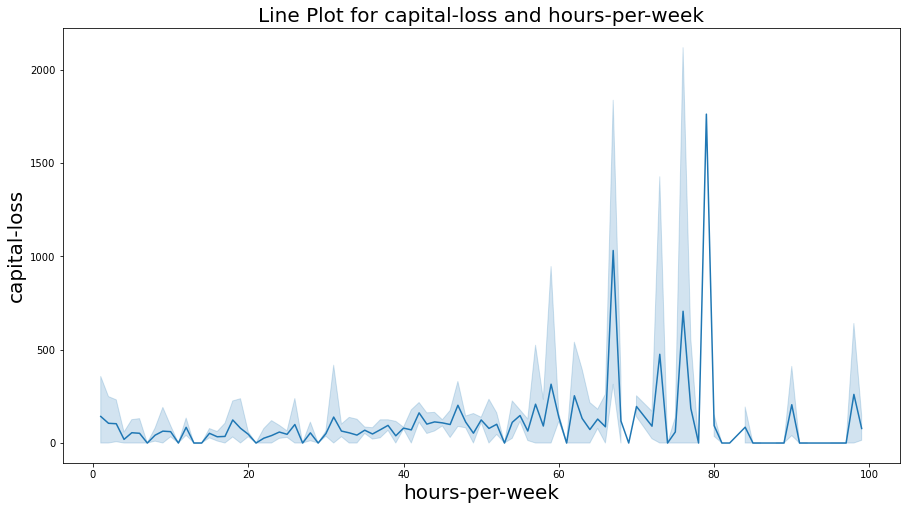

In [77]:
plt.rcParams["figure.figsize"] = [15,8]
ax = sns.lineplot('hours-per-week', 'capital-loss', data = df_num)
ax.set_ylabel('capital-loss', fontsize=20)
ax.set_xlabel('hours-per-week', fontsize=20)
plt.title("Line Plot for capital-loss and hours-per-week", fontsize=20)
plt.show()

### Inference:

   * According to the scatterplot there contionus increase or decrease in the captial-loss as per-hour-week,but the captial loss equal to zero.
   * There is sudden increase in the captial-loss round 65 to 70 but there is sudden drop in that region.

## Quantitative and Categorical

#### Quantitative  and  categorical  analysis  represents  the  relationship  between  one numeric and one categorical variable
##### ●Following graphs can be used for quantitative and categorical data:
##### ○Bar chart
##### ○Kernel density plot
##### ○Box plot   ○Violin plot
##### ○Strip plot
##### ○Swarm plot

In [78]:
## 

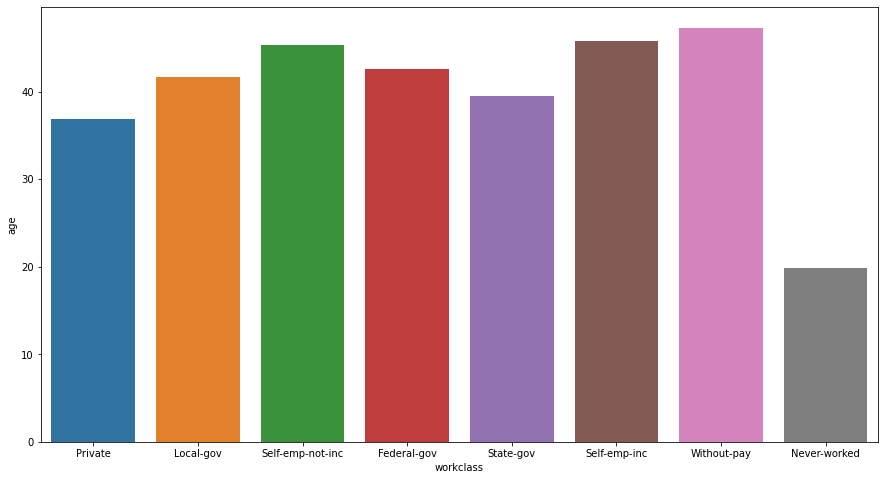

In [79]:
plt.figure(figsize=(15,8))
sns.barplot(x='workclass',y='age',data=df,ci=0)
plt.show()

 ### Inference:
All age group people are fairly working in all kind of workclass.
But self_emp people are working for more age

## Class and Age

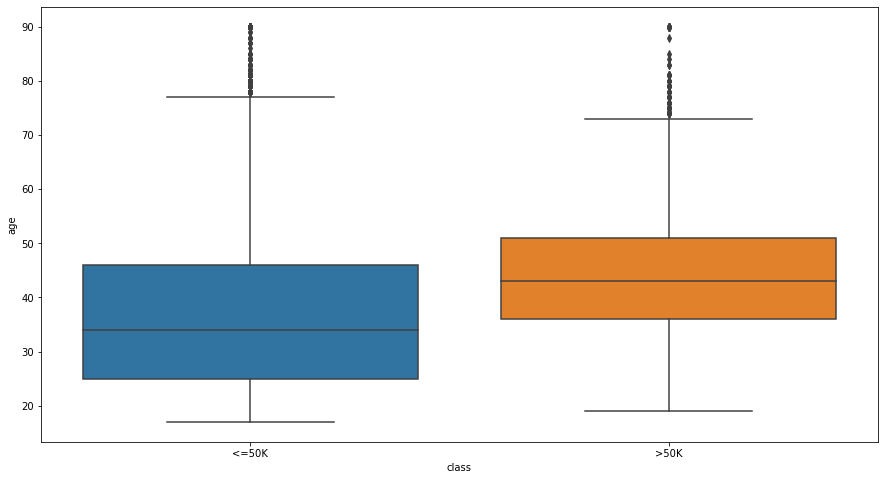

In [80]:
plt.figure(figsize=(15,8))
sns.boxplot(x='class',y='age',data=df)
plt.show()

#### The above bivariate boxplot shows :

Outliers present in both the class group(<=50k and >50k) wrt "age" attribute.

Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(45 year).


In [81]:
df[['class', 'age']].groupby(['class'], as_index=False).mean().sort_values(by='age', ascending=False)

class       age
1   >50K 44.275178
0  <=50K 36.872184

- The mean "age" for Income group(<=50k) is 36.8 years.
- And for Income group(>50k) is 44.2 years

The above bivariate boxplot shows :

- Outliers present in both the income group(<=50k and >50k) wrt "age" attribute.
- Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).
- Interquartile range(IQR) :
- For Income group(<=50k) , IQR is between [25,46] (long range)
- Middle 50% of the Age is spread over longer range for the income group who earn <=50k.

- For Income group(>50k) , IQR is between [38,50] (shorter range)

In [82]:
df["class"].value_counts()

<=50K    37155
>50K     11687
Name: class, dtype: int64

**Hypothesis:**
- Null Hypothesis :- there is no difference in Mean age of income group >50k and income group <=50k.
- Alternate Hypothesis :- there is difference in Mean age of income group >50k and income group <=50k.

In [83]:
import random
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats


df = df[(np.abs(stats.zscore(df["age"])) < 3)] 

income_1 = df[df['class']=='>50K' ]['age']
income_0 = df[df['class']=='<=50K' ]['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [84]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 5.754188706795961
p value 3.4535308999433865e-08
we reject null hypothesis


- We can conclude that there is a significant difference in the mean ages of income group >50k and income group <=50k.
- It means that age has some contribution to the distinguish income groups.

## Education - age

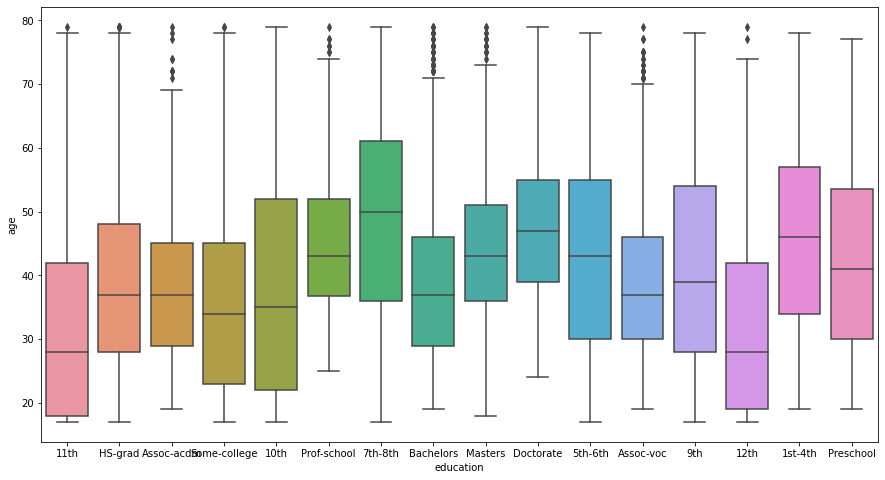

In [85]:
plt.figure(figsize=(15,8))
sns.boxplot(x='education',y='age',data=df)
plt.show()

### Inference:
   
   * There are 16 unique categories present in the education attribute.
   * Hs-grad has 32.32% of all the education attribute.
   * HS-grad (15784) has the maximum number of observations followed by some-college(10878) and Bachelors(8025).
   * Pre-school has minimum samples i.e. 83.

## Occupation - age

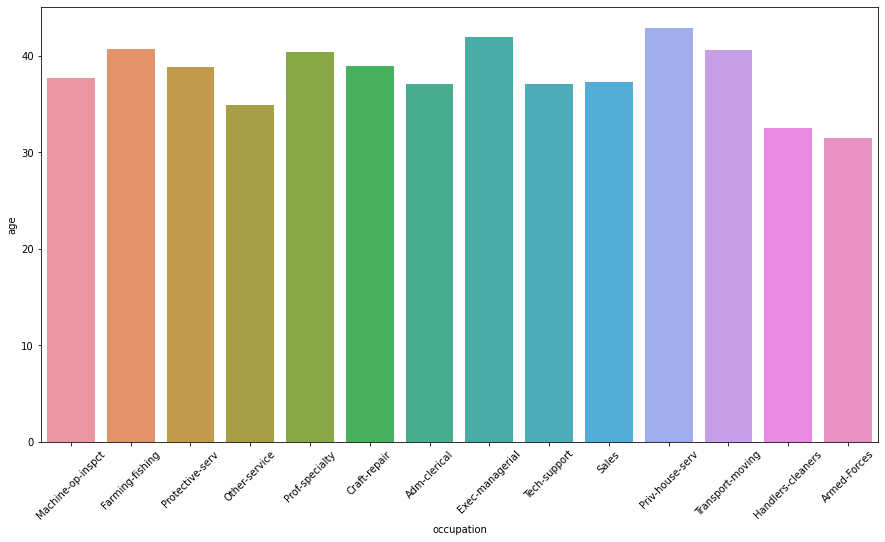

In [86]:
plt.figure(figsize=(15,8))
sns.barplot(x='occupation',y='age',data=df,ci=0)
plt.xticks(rotation=45)
plt.show()

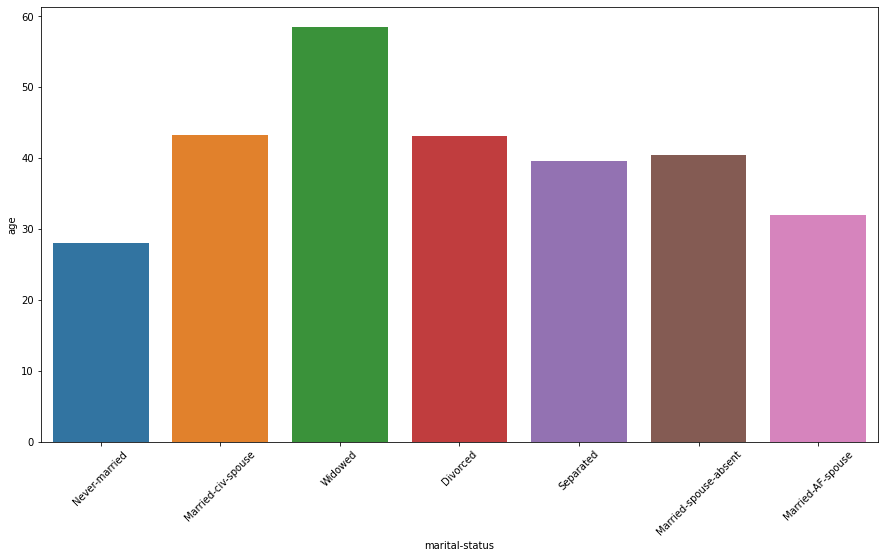

In [87]:
plt.figure(figsize=(15,8))
sns.barplot(x='marital-status',y='age',data=df,ci=0)
plt.xticks(rotation=45)
plt.show()

### Inference:

   * People with age less than 30 are under category of never-married.
   * People with age more than 50 has lost thier partners and are widowed.

### Class and fnlwgt

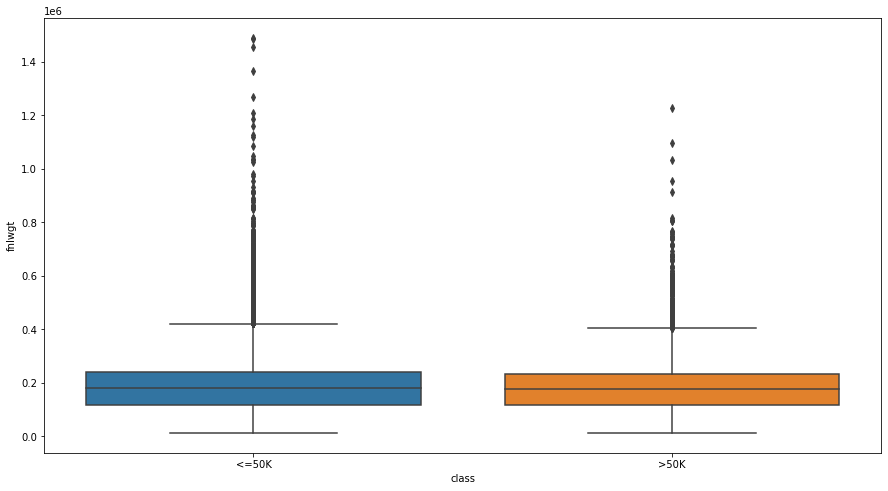

In [88]:
plt.figure(figsize=(15,8))
sns.boxplot(x='class',y='fnlwgt',data=df)
plt.show()

### Description about boxplot
* As evident from the above plot, both class group has nearly same IQR and median is centered on 0.

* Outliers are present in both the class groups.

* It seems that the boxplot for final weight w.r.t class groups is similar except the number of outliers in class group who earns <=50k is more.

**Inferences:**
- Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
- Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [89]:
df = df[(np.abs(stats.zscore(df["fnlwgt"])) < 3)] 

income_1 = df[df['class']=='>50K' ]['fnlwgt']
income_0 = df[df['class']=='<=50K' ]['fnlwgt']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [90]:
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest -0.491511232408206
p-value 0.6236093650473794
we accept null hypothesis


- We can conclude that there is no difference in Mean of income group >50k and income group <=50k.
- It means that final weight has no contribution to the distinguish income group.

### Marital status- fnlwgt

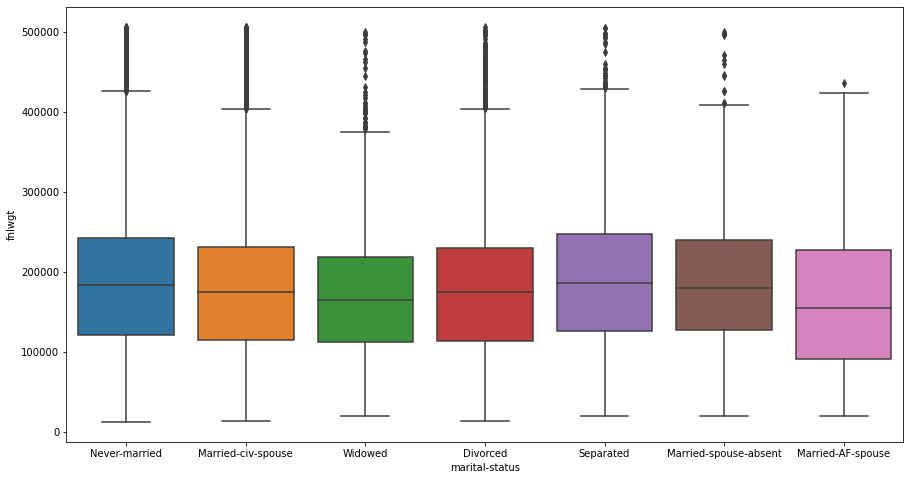

In [91]:
plt.figure(figsize=(15,8))
sns.boxplot(x='marital-status',y='fnlwgt',data=df)
plt.show()

###  Inference:
- marital status is not actually affecting mean for fnlwgt. we can see for all type mean is same.


## Age-sex

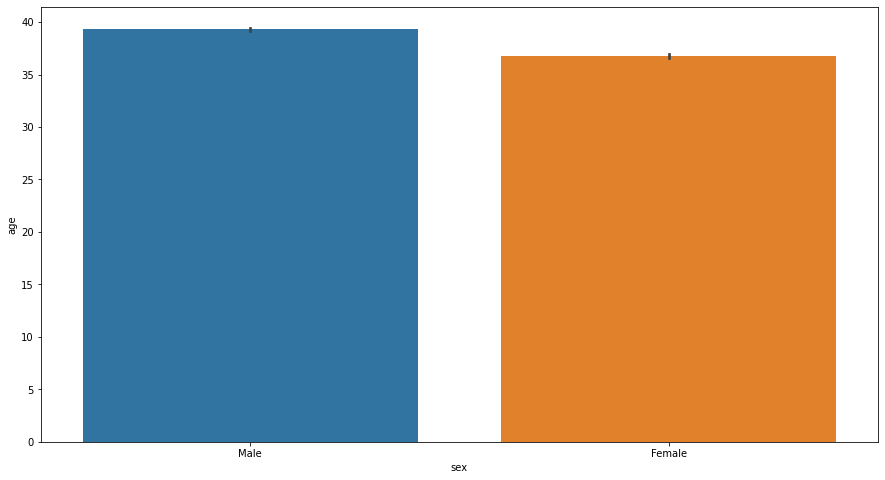

In [92]:
sns.barplot(data=df,y='age',x='sex')
plt.show()

### Inference: 
- Males works  slightly higher age then female

## Age -race

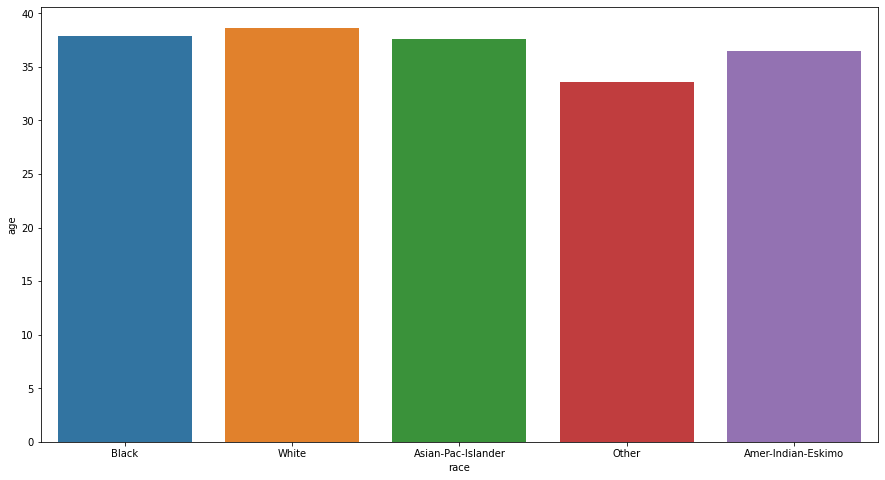

In [93]:
sns.barplot(data=df,y='age',x='race',ci=0)
plt.show()

### Inference: 
White people are working till higher and black,asian,american are almost same in age group 

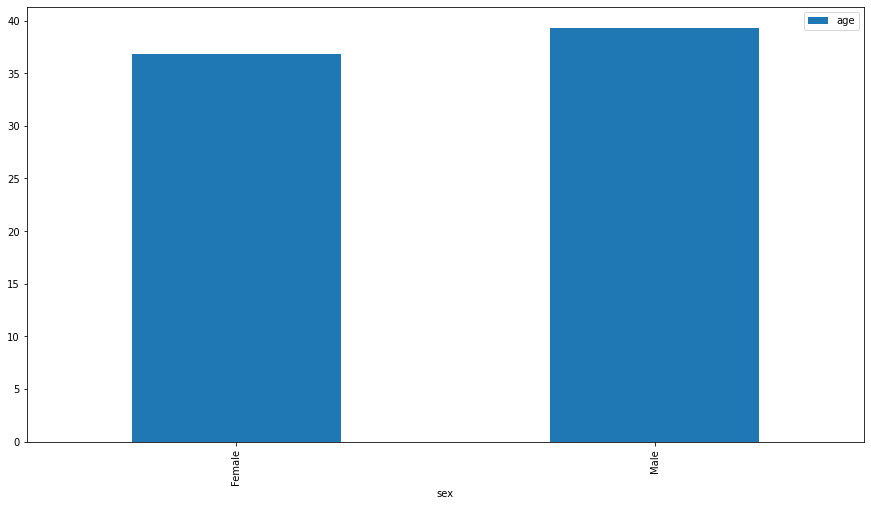

In [94]:
df[['sex','age']].groupby('sex').mean().plot(kind='bar')
plt.show()

### Inference:Males has higher mean than compare to female,male are working more of their age

# Captital Gain

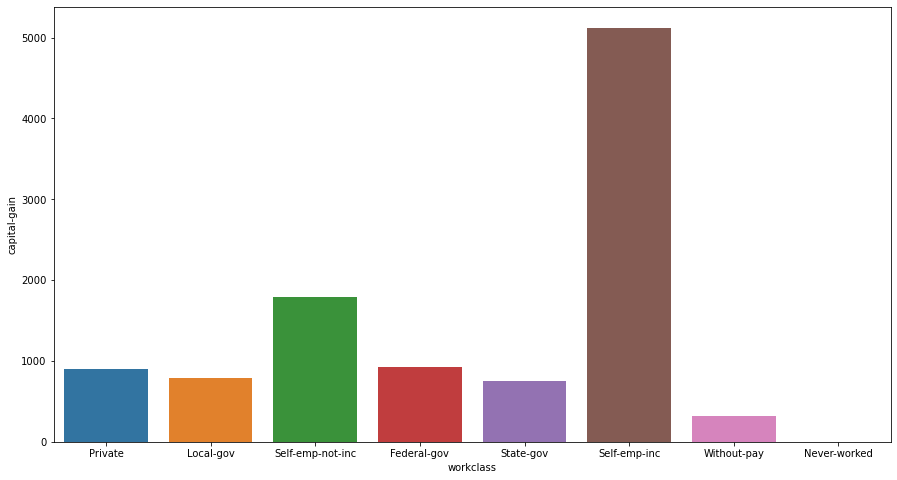

In [95]:
sns.barplot(df['workclass'],df['capital-gain'],ci=0)
plt.show()

### Inference:

   * Self-emp-inc have the highest Captital gain as compared to others.
   * Never worked have the lowest capital gain.

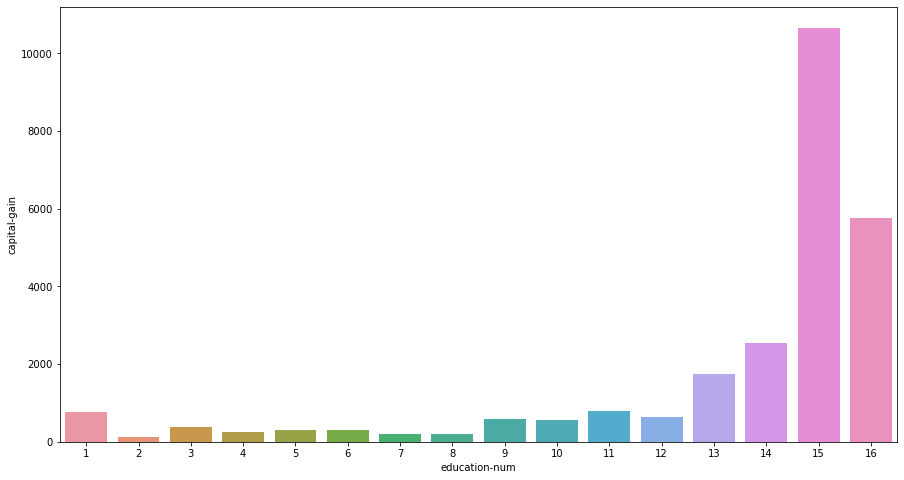

In [96]:
sns.barplot(df['education-num'],df['capital-gain'],ci=0)
plt.show()

### Inference:

   * Education number 15 which denotes people have graduated as  Prof-school have highest capital gain.
   * Education number 2 where the people have studied till 1st to 4th have lowest capital gain 

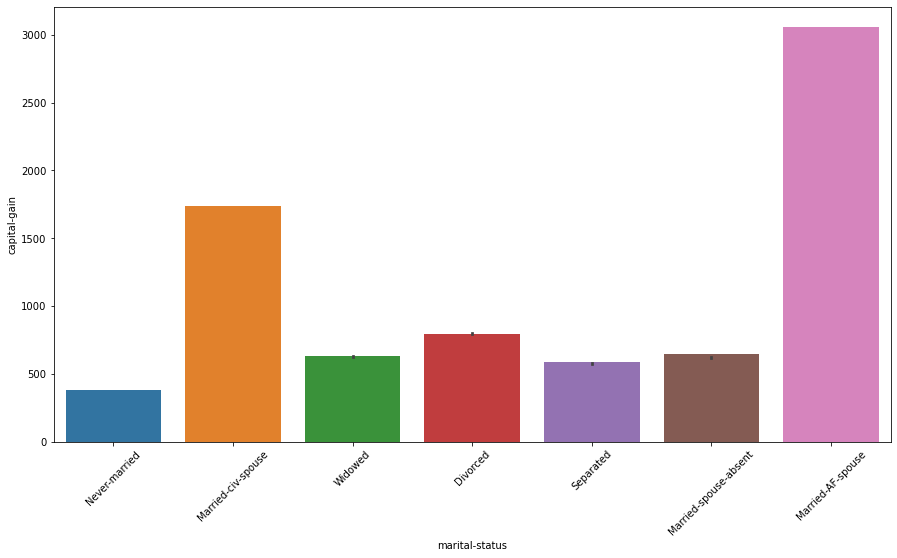

In [97]:
sns.barplot(df['marital-status'],df['capital-gain'],ci=1)
plt.xticks(rotation=45)
plt.show()

### Inference:

   * Married civ spouse  have highest capital gain as compared to others.
   * Never married have the lowest capital gain.
   * Widowed and Married spouse absent have similar capital gain.

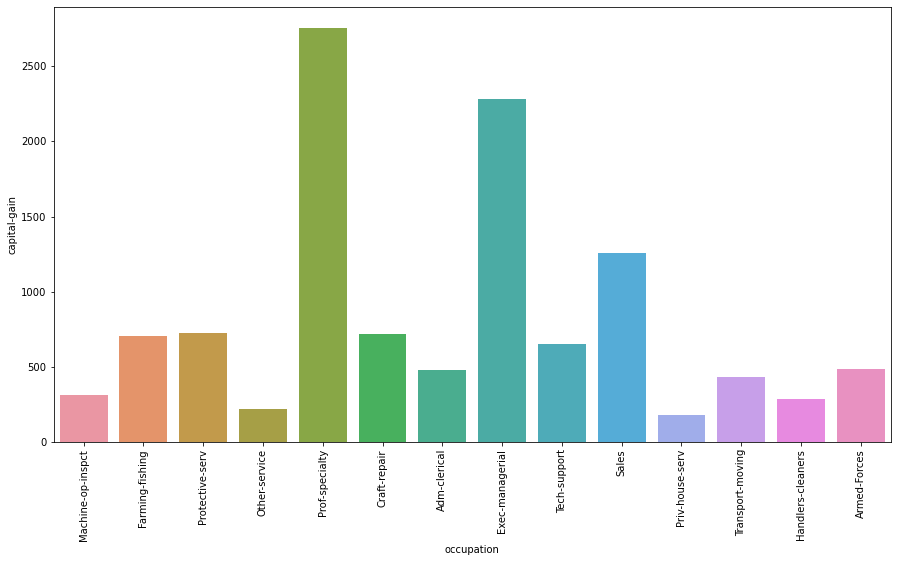

In [98]:
sns.barplot(df['occupation'],df['capital-gain'],ci=0)
plt.xticks(rotation=90)
plt.show()

### Inference:

   * Prof-speciality occupation have the highest capital gain. 
   * Armed forces occupation have the lowest. 
   * Farming fishing and Prof speciality have similar capital gain.
   * Adm clerical and transport moving have similar capital gain too.

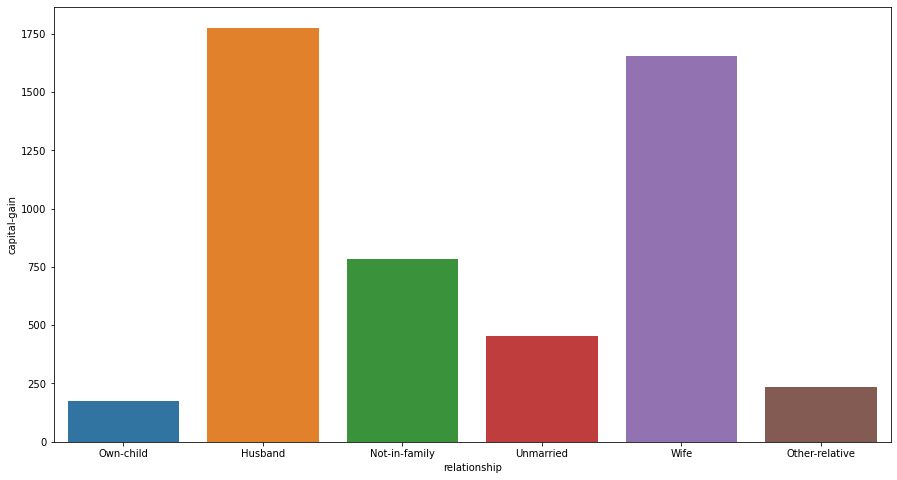

In [99]:
sns.barplot(df['relationship'],df['capital-gain'],ci=0)
plt.show()

### Inference:

   * Husband have the highest capital gain.
   * Wife have the second highest capital gain. 
   * Own child have the least capital gain.

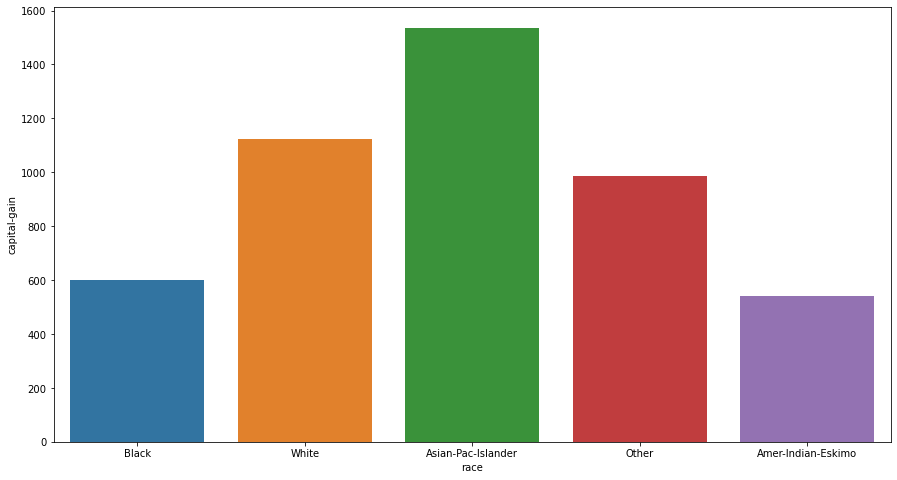

In [100]:
sns.barplot(df['race'],df['capital-gain'],ci=0)
plt.show()

### Inference:

   * Asian pac Islander race have the highest capital gain compared to others.
   * Black and Amer-Indian-Eskimo have the lowest capital gain and look similar having capital.

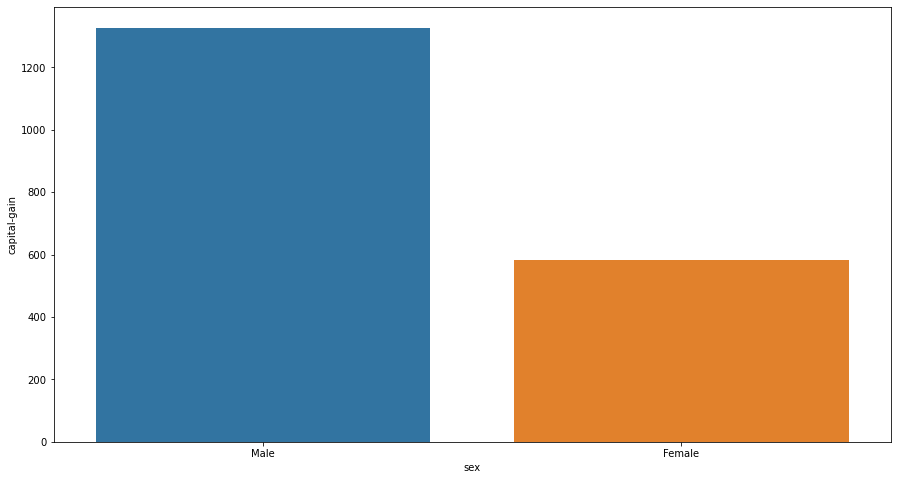

In [101]:
sns.barplot(df['sex'],df['capital-gain'],ci=0)
plt.show()

### Inference: Male have the higher capital gain compared to female.

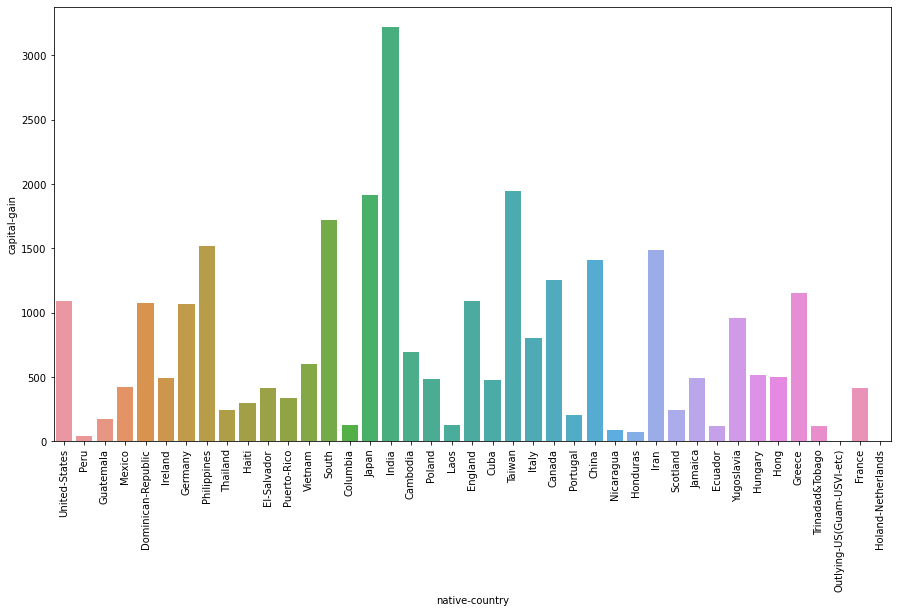

In [102]:
sns.barplot(df['native-country'],df['capital-gain'],ci=0)
plt.xticks(rotation=90)
plt.show()

### Inference:

   * India has the highest Capital Gain comparest to others.
   * Honduras,Thailand,Halti,Outlying-Us,Trinadad and Tobago and Hong have the lowest Capital gain. 


### Capital gain - class

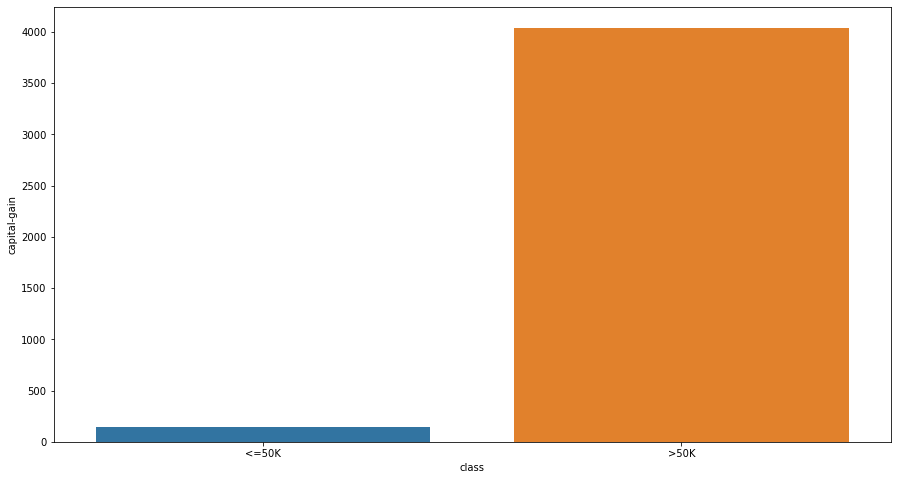

In [103]:
sns.barplot(df['class'],df['capital-gain'],ci=0)
plt.show()

### Inference: The class of people earning >50K have more capital gain then people earning <=50K.

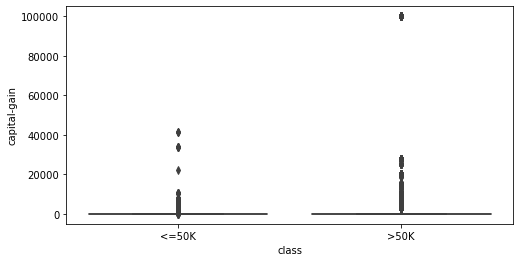

In [104]:
plt.figure(figsize=(8,4)) 
sns.boxplot(x="class", y="capital-gain", data=df)
plt.show()

## Inference
- Most of the capital gains value is accumulated at 0 for both the income group .

**Inferences:**
- Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
- Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [105]:
df = df[(np.abs(stats.zscore(df["capital-gain"])) < 3)] 

income_1 = df[df['class']=='>50K' ]['capital-gain']
income_0 = df[df['class']=='<=50K' ]['capital-gain']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [106]:
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.073645244268883
p-value 0.002670361058073095
we reject null hypothesis


#### We can conclude that there is difference in Mean of income group >50k and income group <=50k.

# Capital Loss

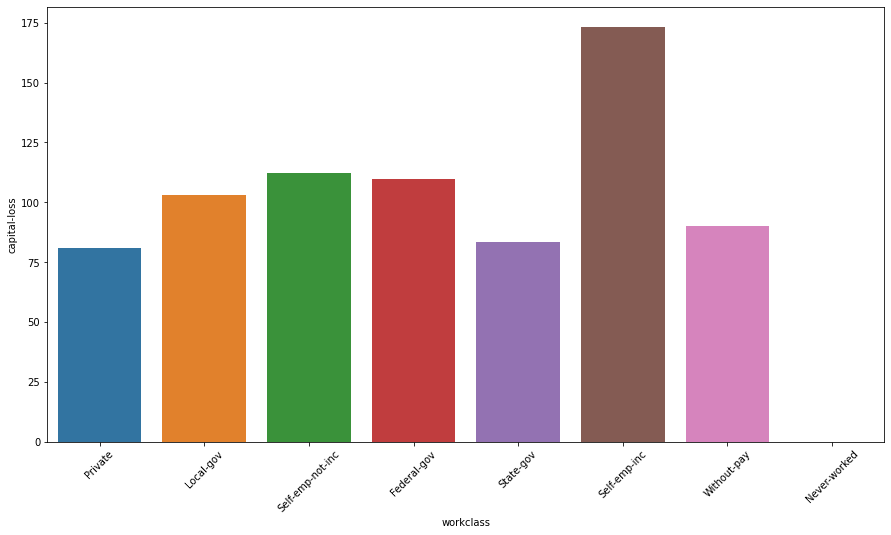

In [107]:
sns.barplot(df['workclass'],df['capital-loss'],ci=0)
plt.xticks(rotation=45)
plt.show()

### Interpretataion:

   * Self-emp-inc have the highest capital loss.
   * Without pay and never worked have no capital loss.
   * State gov and private have similar capital loss.

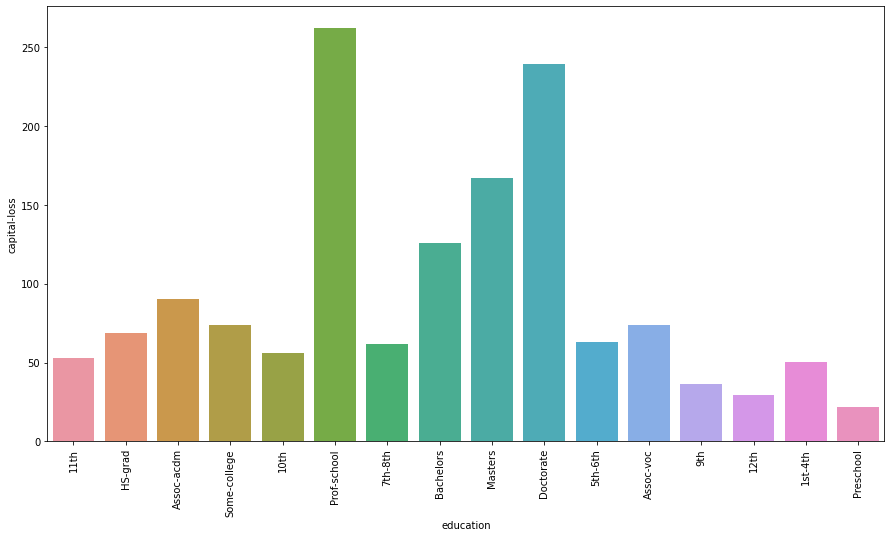

In [108]:
sns.barplot(df['education'],df['capital-loss'],ci=0)
plt.xticks(rotation=90)
plt.show()

### Inference:

   * Doctorate have the highest capital loss.
   * People studied till 9th have the least capital loss.
   * HS grad,Assoc voc have similar capital loss.

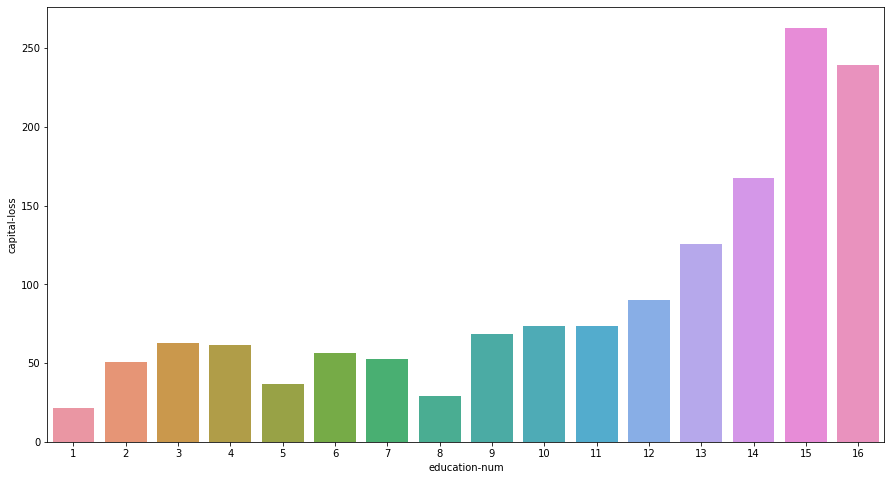

In [109]:
sns.barplot(df['education-num'],df['capital-loss'],ci=0)
plt.show()

### Inference:

   * Education number 16 that is Doctorate have the highest capital loss.
   * Education number 5 that is pepple studied till 9th have the least capital loss.

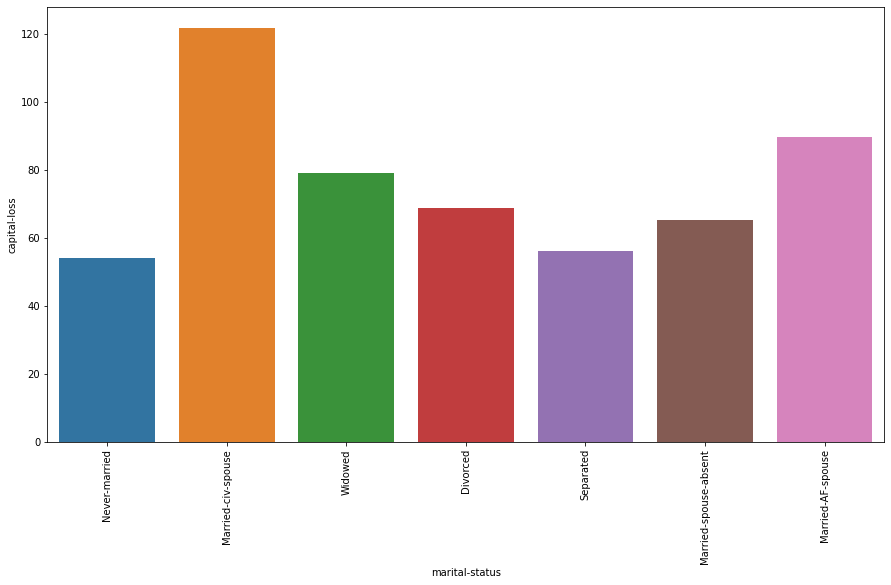

In [110]:
sns.barplot(df['marital-status'],df['capital-loss'],ci=0)
plt.xticks(rotation=90)
plt.show()

### Inference:

   * Married civ Spouse have the highest capital loss.
   * Married AF Spouse have the least capital loss.
   * Married spouse absent and seperated have similar capital loss in both.

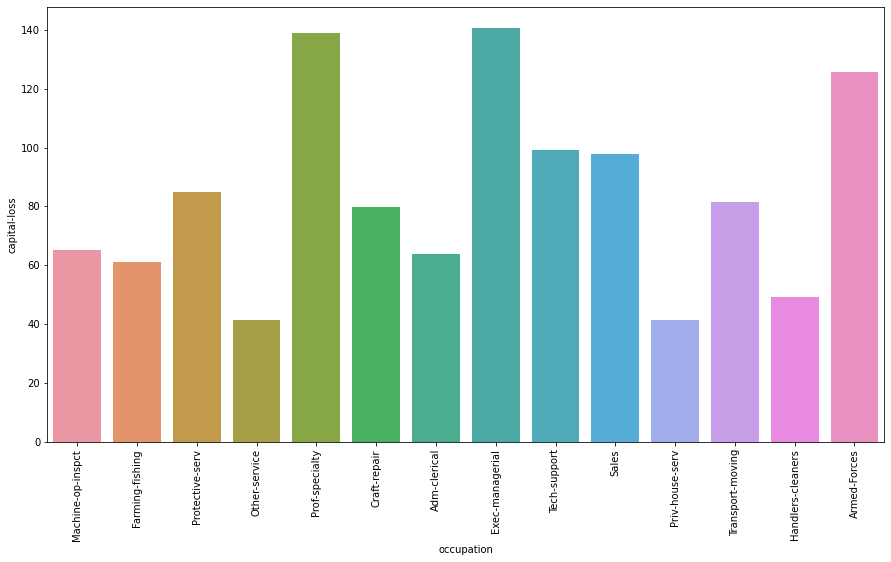

In [111]:
sns.barplot(df['occupation'],df['capital-loss'],ci=0)
plt.xticks(rotation=90)
plt.show()

### Inference:

   * Armed force occupation has the highest capital loss.
   * Priv-house-serv occupation has the least capital loss.

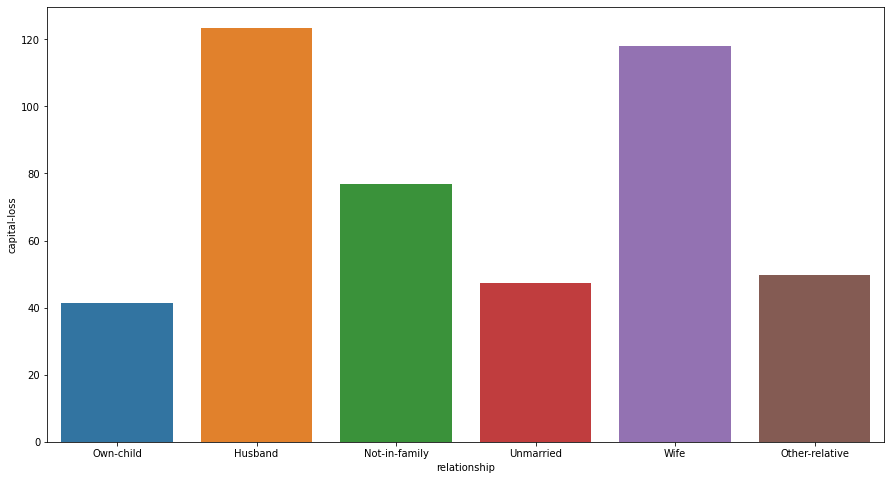

In [112]:
sns.barplot(df['relationship'],df['capital-loss'],ci=0)
plt.show()

### Inference:

   * Husband  have the highest capital loss compared to others.
   * wife have the second most capital loss.
   * Own child have the lowest capital loss.

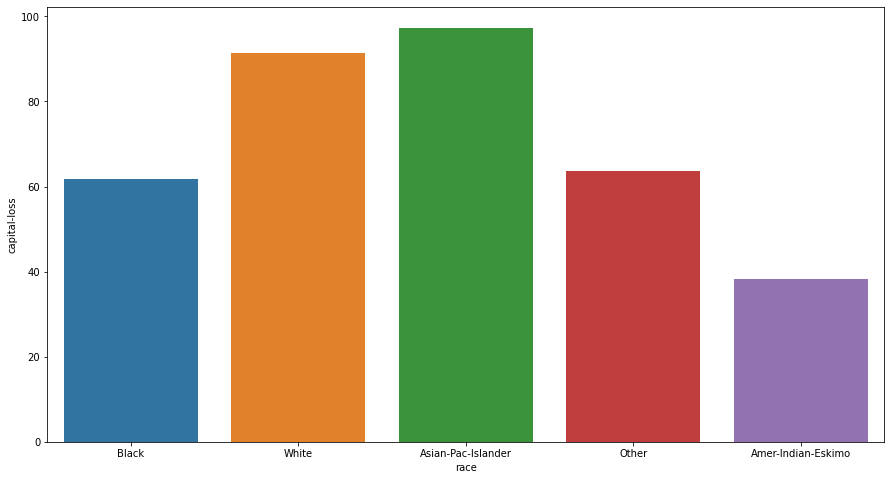

In [113]:
sns.barplot(df['race'],df['capital-loss'],ci=0)
plt.show()

### Inference:

   * Amer indian eskimo race has the lowest capital loss compared to others.
   * Asian pac islander race has the highest capital loss. 
   * Black and others race has similar capital loss in both.

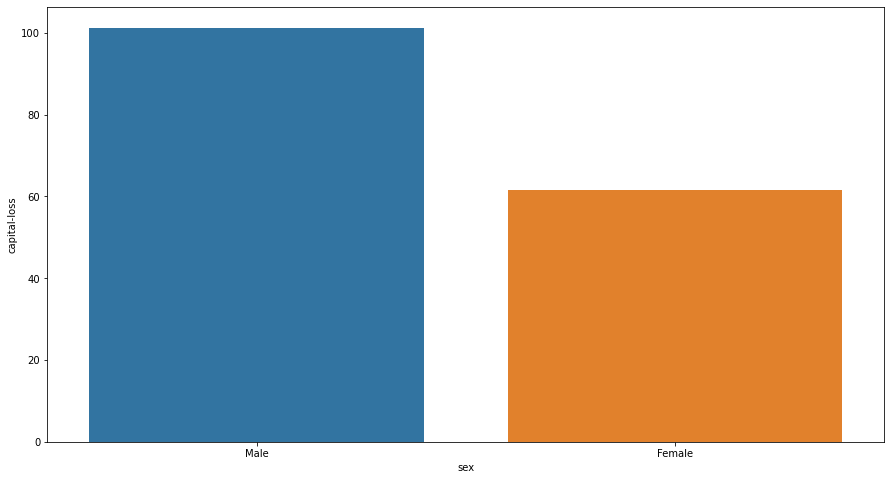

In [114]:
sns.barplot(df['sex'],df['capital-loss'],ci=0)
plt.show()

### Inference: Males have the highest  capital loss compared to the female.

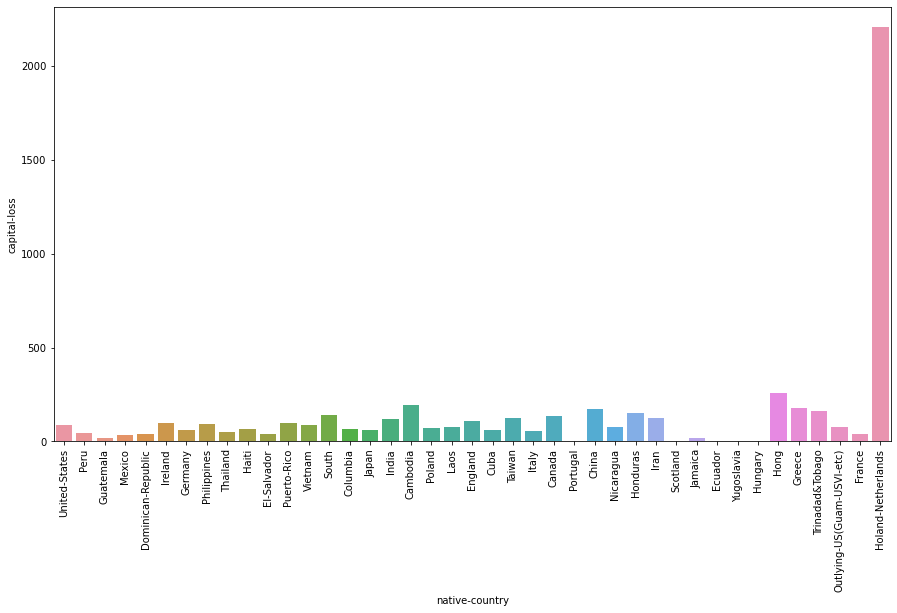

In [115]:
sns.barplot(df['native-country'],df['capital-loss'],ci=0)
plt.xticks(rotation=90)
plt.show()

### Inference:

   * Holland-Netherlands has the highest Capital Loss comparest to others.
   * Jamaica,Thailand,Ecuador,Scotland,Outlying-Us and Laos have the lowest Capital loss.

### Capital-loss - class

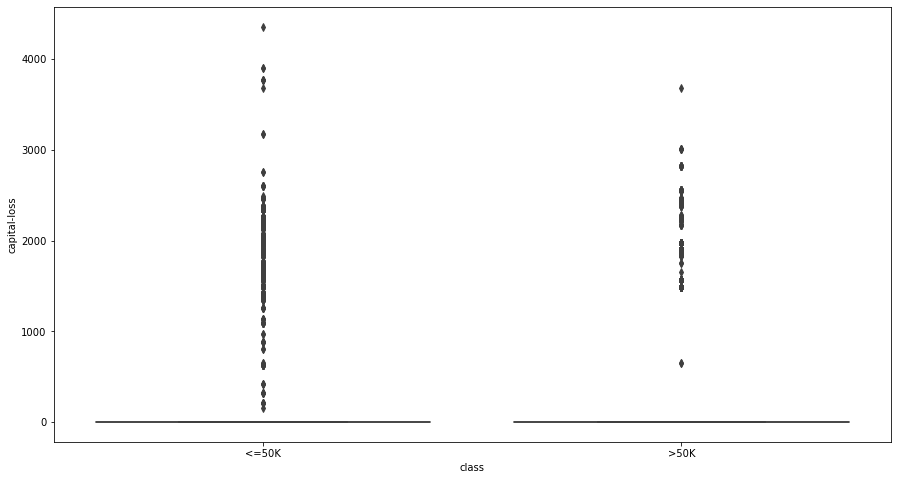

In [116]:
sns.boxplot(df['class'],df['capital-loss'])
plt.show()

#### This boxplot is similar to the capital gain boxplot where most of the values are concentrated on 0.

**Hypothesis:**
- Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
- Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [117]:
income_1 = df[df['class']=='>50K' ]["capital-loss"]
income_0 = df[df['class']=='<=50K']["capital-loss"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.2475864183077547
p-value 0.0014899137007379777
we reject null hypothesis


- We can conclude that there is no difference in Mean capital loss of income group >50k and income group <=50k.
- It means that capital-loss is unable to seperate the income groups.

# Hours-Per-Week

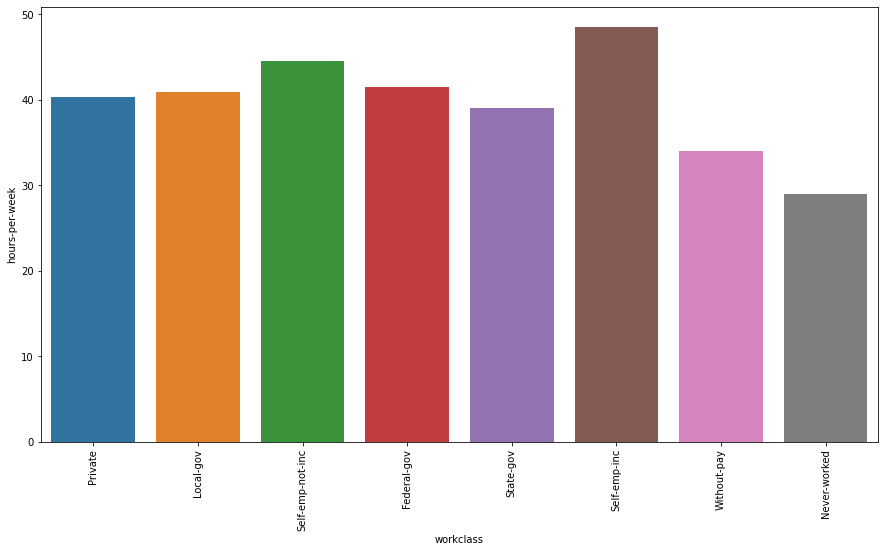

In [118]:
sns.barplot(df['workclass'],df['hours-per-week'],ci=0)
plt.xticks(rotation=90)
plt.show()

### Inference:

   * Self emp-Inc work higher hours in a week compared to others.
   * People who never work have lower working hours in a week.

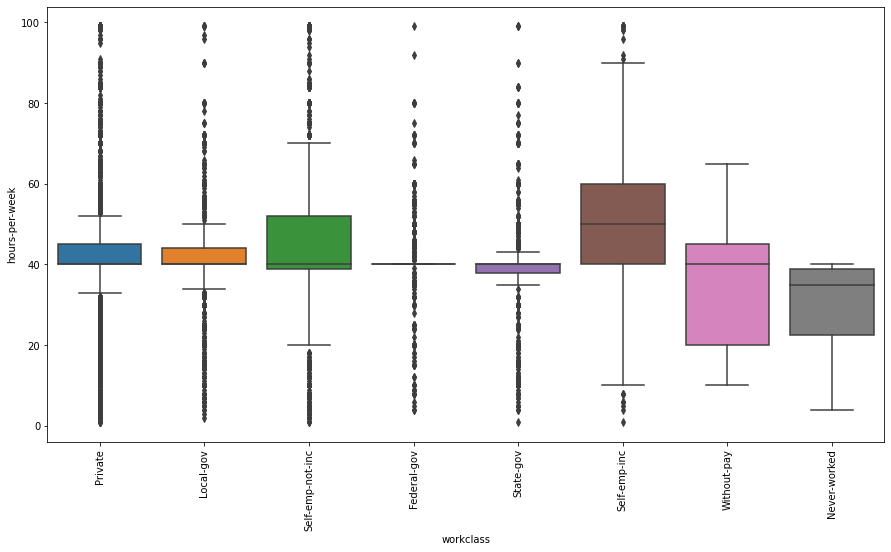

In [119]:
sns.boxplot(df['workclass'],df['hours-per-week'])
plt.xticks(rotation=90)
plt.show()

### Inference:

   * Data is not linear.
   * Data is not normally distributed.
   * Without pay and never worked have no outliers.
   * Most of the Federal gov wokclass work 40 hours per week.

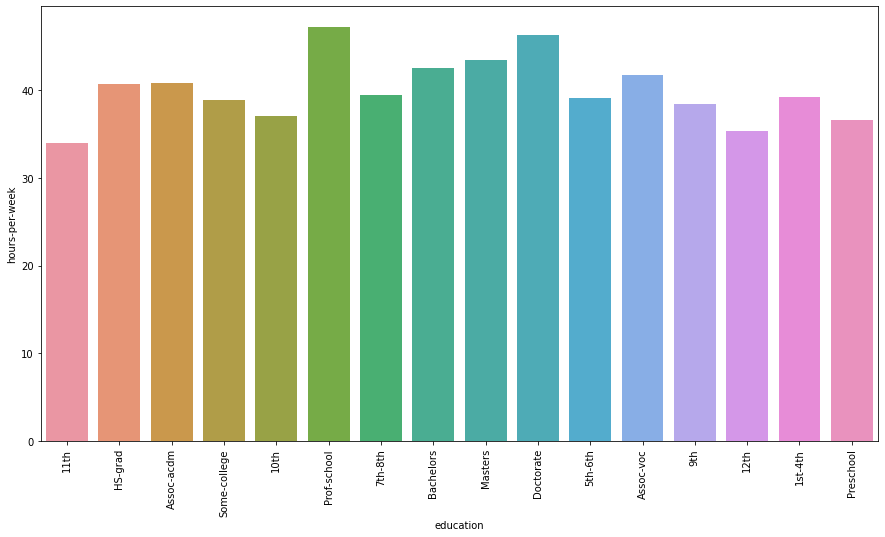

In [120]:
sns.barplot(df['education'],df['hours-per-week'],ci=0)
plt.xticks(rotation=90)
plt.show()

### Inference:

   * Prof work higher hours in a week compared to others.
   * People who have studied till 11th work  the least hours per week.
   * Some college and people studied till 5th and 6th work in a similar pattern.

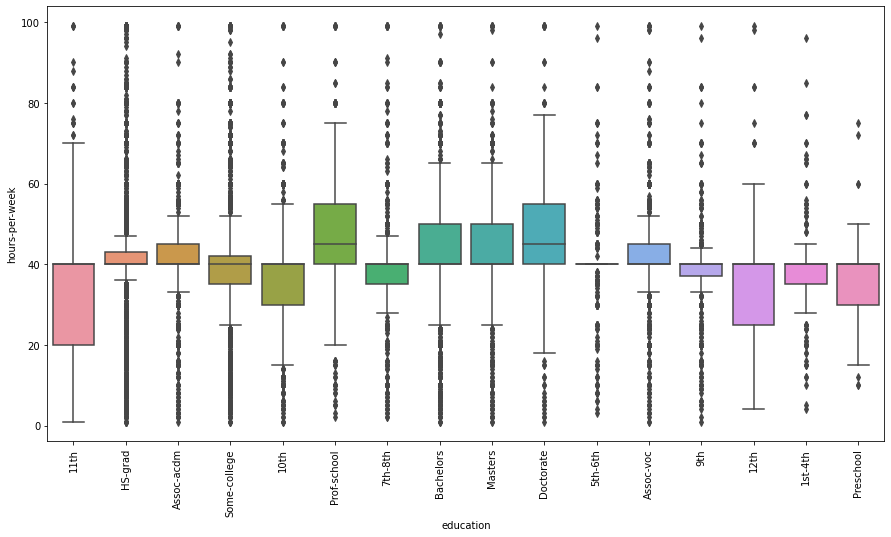

In [121]:
sns.boxplot(df['education'],df['hours-per-week'])
plt.xticks(rotation=90)
plt.show()

### Inference:

   * The variation is not normal.
   * Hours per week is indepent of education.
   * People who have done thier schooling till 5th-6th work 40 hours per week.

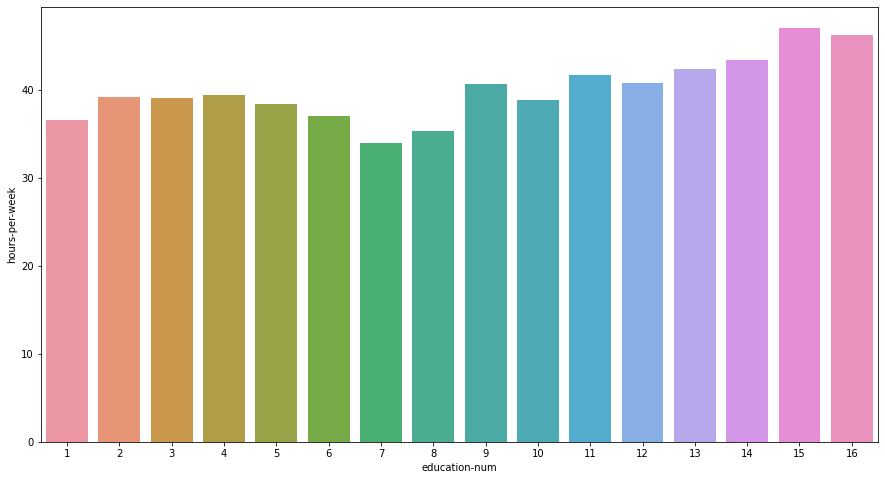

In [122]:
sns.barplot(df['education-num'],df['hours-per-week'],ci=0)
plt.show()

### Inference:

   * Education num 15 that is Prof work higher hours in a week compared to others.
   * Education num 7th that is people who have studied till 11th work  the least hours per week.

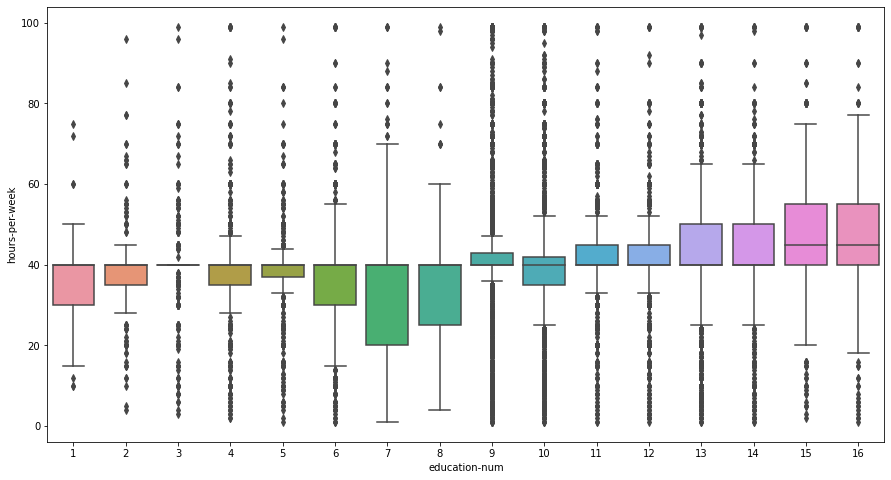

In [123]:
sns.boxplot(df['education-num'],df['hours-per-week'])
plt.show()

### Inference:

   * The variation is not normal.
   * Hours per week is indepent of education.
   * Education num-3 that is people who have done thier schooling till 5th-6th work 40 hours per week.

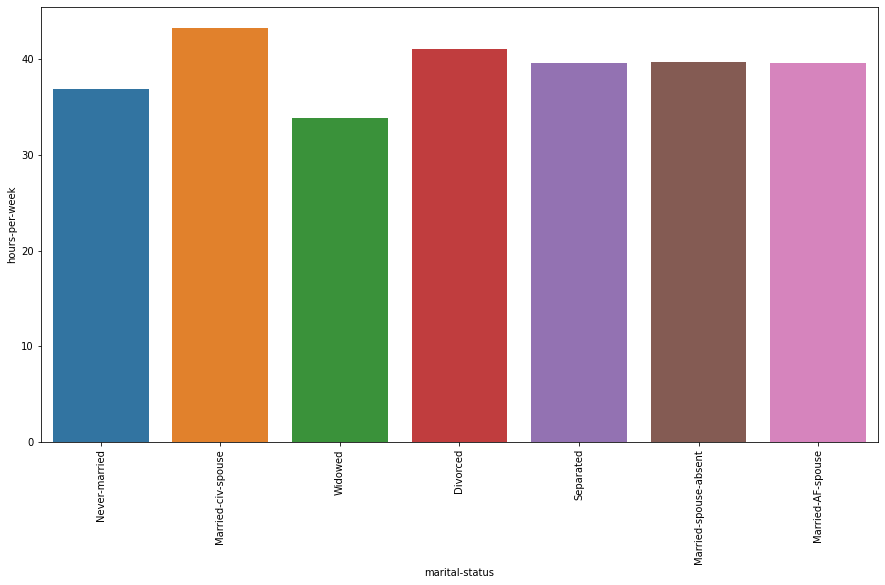

In [124]:
sns.barplot(df['marital-status'],df['hours-per-week'],ci=0)
plt.xticks(rotation=90)
plt.show()

### Inference:

   * Married civ spouse work higher hours in a week compared to others.
   * Widowed have the least working hours in a week.

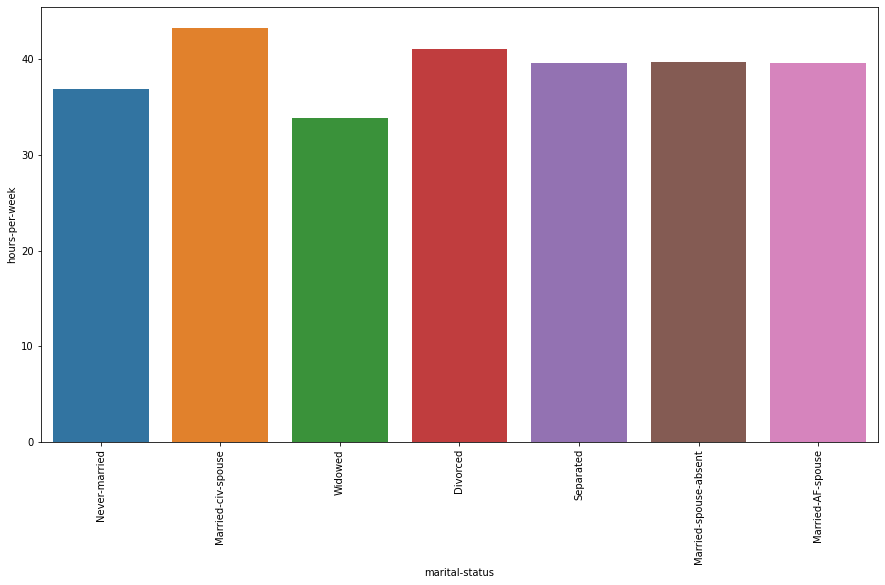

In [125]:
sns.barplot(df['marital-status'],df['hours-per-week'],ci=0)
plt.xticks(rotation=90)
plt.show()

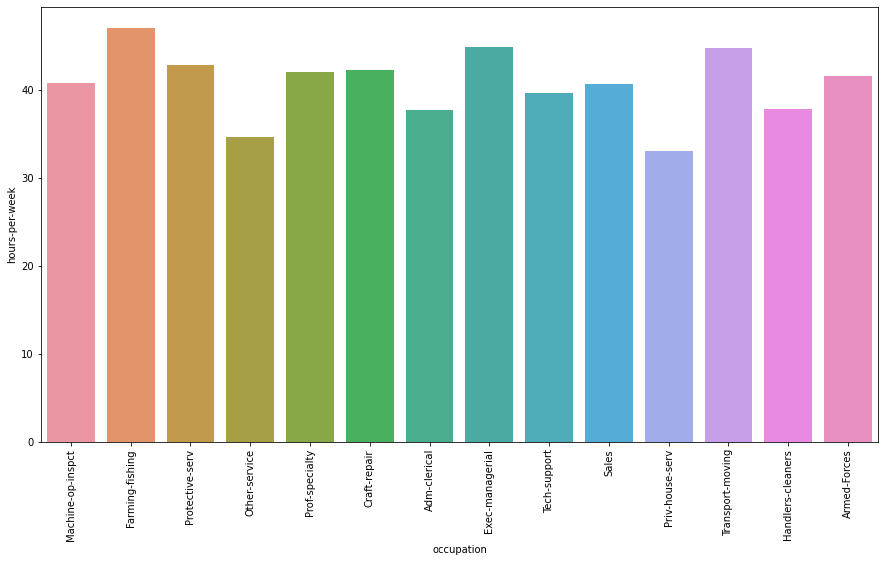

In [126]:
sns.barplot(df['occupation'],df['hours-per-week'],ci=0)
plt.xticks(rotation=90)
plt.show()

### Inference:

   * Farming fishing occupation work higher hours in a week compared to others.
   * Prof-speciality occupation have the least working hours in a week.
   * Sales and Machine-op-inspct have similar hours of working.

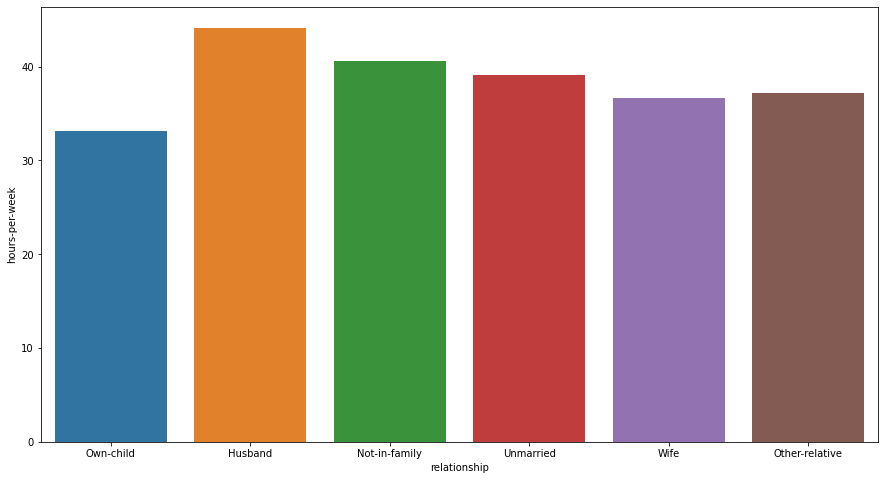

In [127]:
sns.barplot(df['relationship'],df['hours-per-week'],ci=0)
plt.show()

### Inference:

   * Husbands work more number hours per week compared to others.
   * Own child work the least number of hours per week.
   * Wives and Other relative work almost similar no of hours per week.

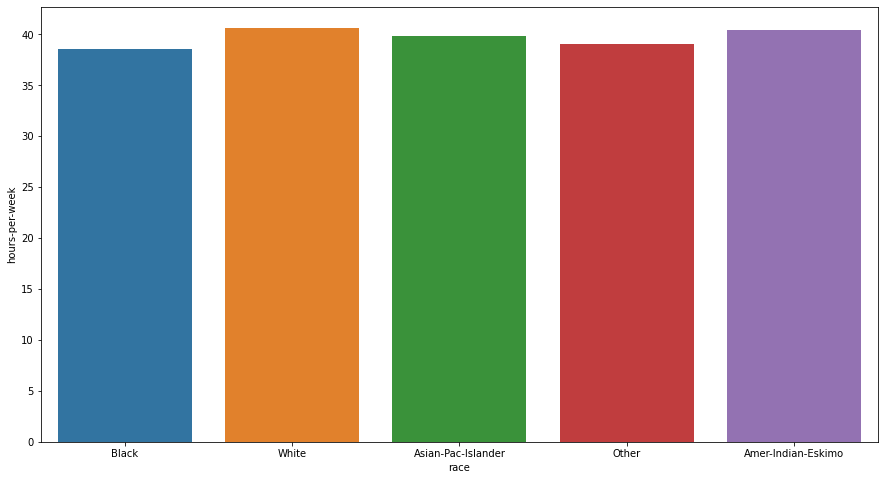

In [128]:
sns.barplot(df['race'],df['hours-per-week'],ci=0)
plt.show()

### Inference:

   * White race work more hours per week slightly more than Asian-Pac-Islander,Amer-Indian-Eskimo and others.
   * Black race work the least number of hours per week.
   * Asian-Pac-Islander and Amer-Indian-Eskimo work almost similar no of hours per week.

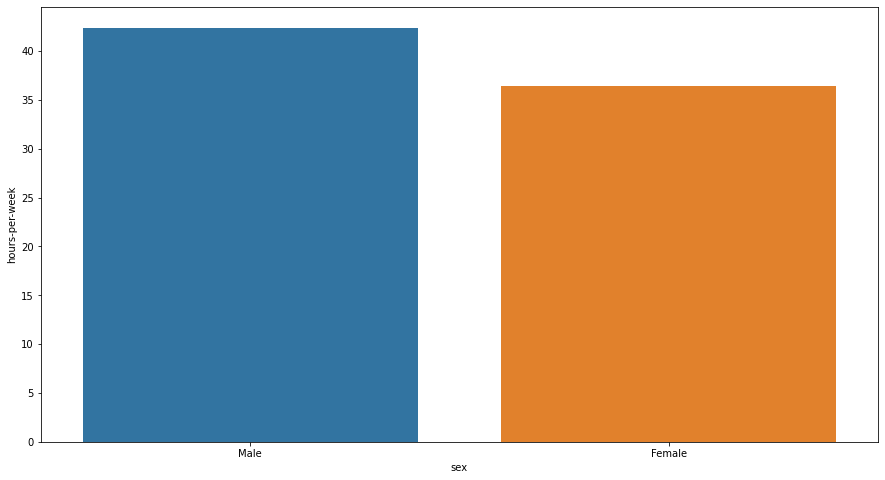

In [129]:
sns.barplot(df['sex'],df['hours-per-week'],ci=0)
plt.show()

### Inference: Male work higher on a weekely basis than the female.

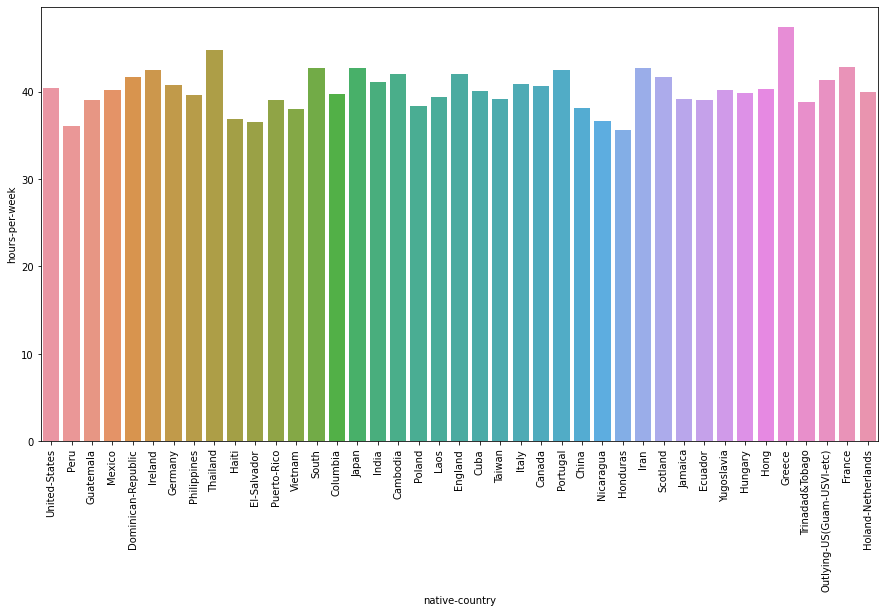

In [130]:
sns.barplot(df['native-country'],df['hours-per-week'],ci=0)
plt.xticks(rotation=90)
plt.show()

### Inference:

   * Thaliand has the highest hours of working per week.
   * Peru and Hungary have the lowest hours of work per week.

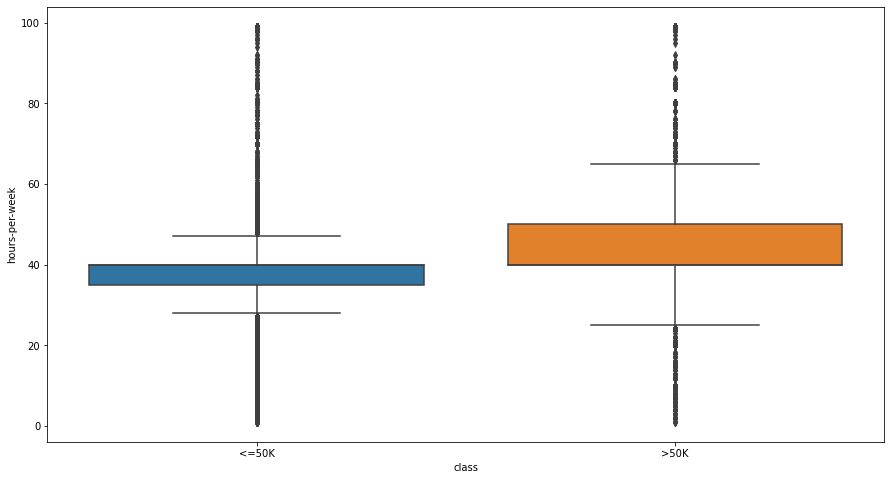

In [131]:
sns.boxplot(df['class'],df['hours-per-week'])
plt.show()

### Inference: People earning >50K have long hours of working per week as compared to the people earning <=50K. 

- Bivariate Analysis with the boxplot shows that:

- The median "hours-per-week" for Income group who earns >50k is greater than the Income group who earns <=50k.

- Interpretation

- Income group who earns >50k has spend ~44 "hours-per-week".(long hours)
- Income group who earns <=50k has spend ~37 "hours-per-week".
- The boxplot for Income group who earns <=50k has small range for minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR) i.e.~
[28,48].
But the boxplot for Income group who earns >50k has large range for minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR) i.e.~[23,68].

- Interpretation

- Income group who earns >50k have flexible working hours
- More Outliers present in the Income group who earns <=50k.

**Hypothesis:**
- Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
- Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [132]:
df = df[(np.abs(stats.zscore(df["hours-per-week"])) < 3)] 

income_1 = df[df['class']=='>50K' ]['hours-per-week']
income_0 = df[df['class']=='<=50K' ]['hours-per-week']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [133]:
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',format(pval, '.70f'))

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 4.531331275540557
p value 0.0000103714624110430443621822318989167399649886647239327430725097656250
we reject null hypothesis


- We can conclude that there is difference in Mean of income group >50k and income group <=50k.
- It means that hours-per-week has some contribution to the distinguish income groups.

#### Inference: Here both the category of class works for same hours per week.

# Categorical and Categorical
1. Grouped Bar Plot
2. Pivot Table
3. Stacked Bar Plot
4. Crosstab
  


### Note: 
- Here the corsstab and stacked bar plot will give the same information,where the Stacked bar plot will give the pictorial representation of the corsstab so we have written only one inference for both the output.

In [134]:
df['education-num']=df['education-num'].astype('object')

### Inference:
education-num was wrongly classified as number its categorical feature so we are changing datatype of that.

In [135]:
df_cat=df.select_dtypes(include='object')

### Inference:
For doing categorical-catrgorical analysis we are selecting object dtypes features.

In [136]:
df_cat.columns

Index(['workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')

### Inference:
displaying all categorical features from datasets.

# workclass and education

In [137]:
ax=pd.crosstab(index=df_cat['workclass'], columns= df_cat['education'])
ax

education         10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  \
workclass                                                            
Federal-gov         15    14     8        1        1        4    6   
Local-gov           49    61    25        4       13       39   31   
Never-worked         2     3     0        0        0        1    0   
Private            992  1386   498      196      399      598  553   
Self-emp-inc        24    23    12        2        7       17   11   
Self-emp-not-inc    96    96    29       14       29      123   55   
State-gov           18    15    11        1        4       16   10   
Without-pay          0     0     0        0        0        2    0   

education         Assoc-acdm  Assoc-voc  Bachelors  Doctorate  HS-grad  \
workclass                                                                
Federal-gov               79         61        307         21      386   
Local-gov                124        121        686         35      741   
Never-worked               0          0          0          0        2   
Private                 1067       1465       5129        232    11401   
Self-emp-inc              56         53        387         44      397   
Self-emp-not-inc         103        157        583         70     1185   
State-gov                 63         75        422        120      408   
Without-pay                2          0          0          0       14   

education         Masters  Preschool  Prof-school  Some-college  
workclass                                                        
Federal-gov           106          0           35           354  
Local-gov             519          4           39           576  
Never-worked            0          0            0             2  
Private              1311         60          306          7391  
Self-emp-inc           97          0           96           313  
Self-emp-not-inc      196          5          171           682  
State-gov             253          1           39           475  
Without-pay             0          0            0             3

### Inference:

   * Among Workclass private has the most number of people.
   * In private sector, HS grads is present the most.
   * In govt sector people who attended college are present more.

# Workclass and marital-status

In [138]:
ax=pd.crosstab(index=df_cat['workclass'], columns= df_cat['marital-status'])
ax

marital-status    Divorced  Married-AF-spouse  Married-civ-spouse  \
workclass                                                           
Federal-gov            234                  3                 699   
Local-gov              521                  0                1494   
Never-worked             1                  0                   1   
Private               4589                 21               14030   
Self-emp-inc           123                  0                1154   
Self-emp-not-inc       402                  2                2380   
State-gov              312                  2                 873   
Without-pay              0                  0                  13   

marital-status    Married-spouse-absent  Never-married  Separated  Widowed  
workclass                                                                   
Federal-gov                          15            361         38       48  
Local-gov                            33            789         97      133  
Never-worked                          1              7          0        0  
Private                             433          11977       1083      851  
Self-emp-inc                          7            198         25       32  
Self-emp-not-inc                     43            572         84      111  
State-gov                            23            612         63       46  
Without-pay                           1              6          0        1

### Inference:.
From the above output we can see that most of the people from all marital status are working in private sector
but as compared to all other category of marital status "Married-civ-spouse" is most working class.

And people from Married-AF-spouse are rarely working or not working at all in any of the workclass.

# workclass and occupation

In [139]:
ax=pd.crosstab(index=df_cat['workclass'], columns= df_cat['occupation'])
ax

occupation        Adm-clerical  Armed-Forces  Craft-repair  Exec-managerial  \
workclass                                                                     
Federal-gov                477            15            91              261   
Local-gov                  410             0           205              324   
Private                   4137             0          4641             3854   
Self-emp-inc                47             0           158              563   
Self-emp-not-inc            63             0           776              545   
State-gov                  369             0            92              284   
Without-pay                  3             0             1                1   

occupation        Farming-fishing  Handlers-cleaners  Machine-op-inspct  \
workclass                                                                 
Federal-gov                     8                 36                 19   
Local-gov                      42                 62                 24   
Private                       641               1884               2842   
Self-emp-inc                   76                  6                 17   
Self-emp-not-inc              560                 21                 56   
State-gov                      23                 19                 18   
Without-pay                     8                  2                  2   

occupation        Other-service  Priv-house-serv  Prof-specialty  \
workclass                                                          
Federal-gov                  55                0             247   
Local-gov                   294                0            1043   
Private                    3954              230            3248   
Self-emp-inc                 37                0             202   
Self-emp-not-inc            262                0             532   
State-gov                   184                0             612   
Without-pay                   2                0               0   

occupation        Protective-serv  Sales  Tech-support  Transport-moving  
workclass                                                                 
Federal-gov                    46     17            94                32  
Local-gov                     437     15            57               154  
Private                       286   4332          1130              1805  
Self-emp-inc                    4    385             8                36  
Self-emp-not-inc                6    563            38               172  
State-gov                     168     19            85                58  
Without-pay                     0      1             0                 1

### Inference:
- From the above output we can see, Armed-forces people are working only for federal government rest all occupation contribute in all workclass.

# workclass and relationship

In [140]:
ax=pd.crosstab(index=df_cat['workclass'], columns= df_cat['relationship'])
ax

relationship      Husband  Not-in-family  Other-relative  Own-child  \
workclass                                                             
Federal-gov           636            392              31         99   
Local-gov            1250            777              64        326   
Never-worked            0              1               1          7   
Private             12343           8849            1164       5579   
Self-emp-inc         1082            219              14         90   
Self-emp-not-inc     2178            717              59        227   
State-gov             760            567              32        243   
Without-pay             8              0               0          8   

relationship      Unmarried  Wife  
workclass                          
Federal-gov             179    61  
Local-gov               428   222  
Never-worked              0     1  
Private                3598  1451  
Self-emp-inc             69    65  
Self-emp-not-inc        232   181  
State-gov               228   101  
Without-pay               2     3

### Inference:
- As compared to other workclass, in Self-emp-inc husbands are lead to work more.
- There are very few husbands who work without pay.

# workclass and race

In [141]:
ax=pd.crosstab(index=df_cat['workclass'], columns= df_cat['race'])
ax

race              Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
workclass                                                                    
Federal-gov                       33                  62    241     10   1052
Local-gov                         64                  55    421     16   2511
Never-worked                       0                   0      3      0      7
Private                          272                1018   3108    311  28275
Self-emp-inc                       2                  57     33      3   1444
Self-emp-not-inc                  32                  94    125     15   3328
State-gov                         20                  92    222     13   1584
Without-pay                        0                   1      1      0     19

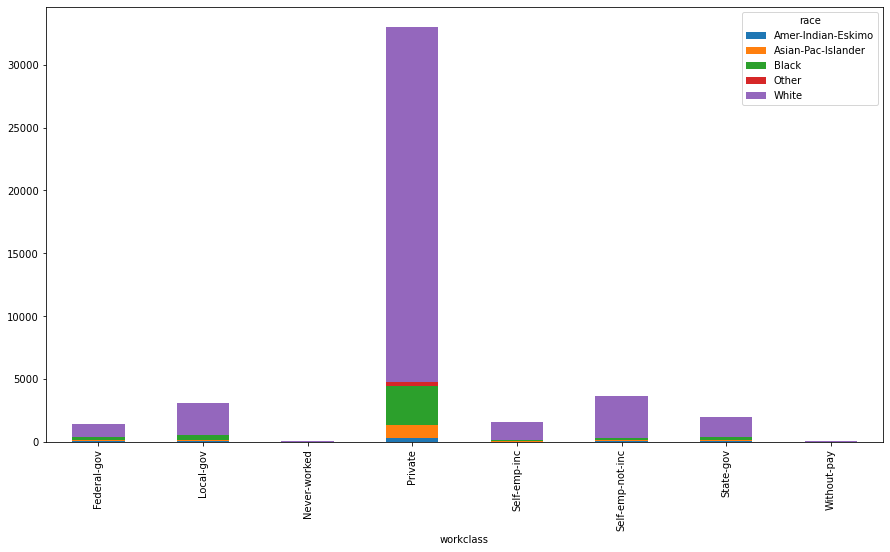

In [142]:
ax.plot.bar(stacked=True);

### Inference:
- As seen above, majority of the peeople are white calls working people.
- Private sector white people are the most in number.
- There are only 7 white people who never worked.
- There are 19 white peoele who work without pay.
- According to the above graph maximum people are white(color of the graph is purple) people according to all sectors.
- According to the above graph minimum people are others(color of the graph is Red) people according to all sectors.
- According to the graph there are minimum people never-worked and without-pay workclass.

# workclass and sex

In [143]:
ax=pd.crosstab(index=df_cat['workclass'], columns= df_cat['sex'])
ax

sex               Female   Male
workclass                      
Federal-gov          442    956
Local-gov           1234   1833
Never-worked           3      7
Private            11358  21626
Self-emp-inc         193   1346
Self-emp-not-inc     589   3005
State-gov            743   1188
Without-pay            7     14

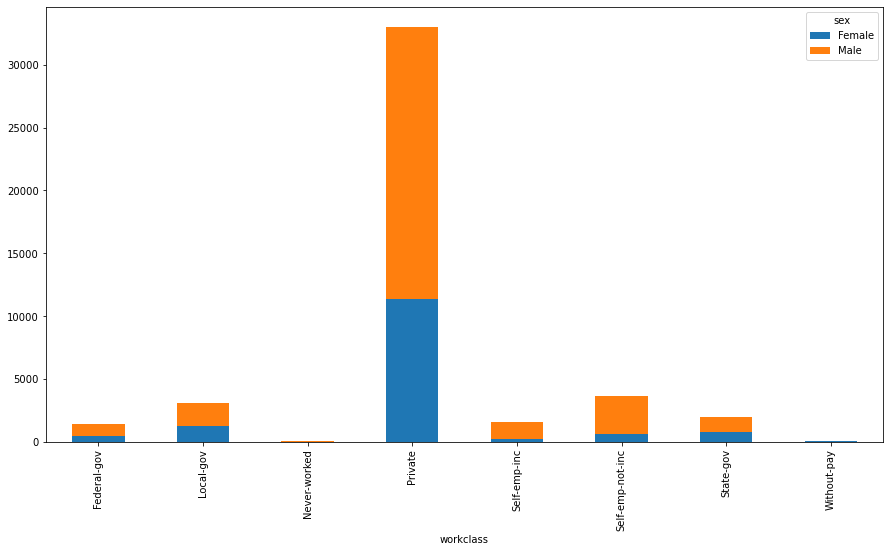

In [144]:
ax.plot.bar(stacked=True);

### Inference:
- As seen above, majority of the peeople are from the Private sector.
- Private sector Males are the highest in number.
- There are only 3 Feamles and 7 male swho never worked.
- There are 7 Females and 14 males people who work without pay.

# workclass and native-country

In [145]:
ax=pd.crosstab(index=df_cat['workclass'], columns= df_cat['native-country'])
ax

native-country    Cambodia  Canada  China  Columbia  Cuba  Dominican-Republic  \
workclass                                                                       
Federal-gov              1       3      2         2     3                   0   
Local-gov                0      10      3         1     8                   4   
Never-worked             0       0      0         0     0                   0   
Private                 22     112     84        66    94                  87   
Self-emp-inc             0      13      4         0    12                   1   
Self-emp-not-inc         2      19      5         7    14                   2   
State-gov                1       4     13         2     0                   0   
Without-pay              0       0      0         0     0                   0   

native-country    Ecuador  El-Salvador  England  France  Germany  Greece  \
workclass                                                                  
Federal-gov             0            2        4       1        8       0   
Local-gov               1            5        6       4       15       1   
Never-worked            0            0        0       0        0       0   
Private                36          127       87      24      135      29   
Self-emp-inc            0            1        2       2        8       7   
Self-emp-not-inc        3            3       13       2       15       8   
State-gov               2            0        3       1       10       0   
Without-pay             0            0        0       0        0       0   

native-country    Guatemala  Haiti  Holand-Netherlands  Honduras  Hong  \
workclass                                                                
Federal-gov               1      2                   0         0     0   
Local-gov                 3      4                   0         1     1   
Never-worked              0      0                   0         0     0   
Private                  75     56                   1        13    24   
Self-emp-inc              0      2                   0         2     1   
Self-emp-not-inc          3      3                   0         1     0   
State-gov                 0      2                   0         2     2   
Without-pay               0      0                   0         0     0   

native-country    Hungary  India  Iran  Ireland  Italy  Jamaica  Japan  Laos  \
workclass                                                                      
Federal-gov             0      4     2        0      1        1      3     1   
Local-gov               0      3     2        0      5        7      2     1   
Never-worked            0      0     0        0      0        0      0     0   
Private                11     98    35       32     69       86     65    19   
Self-emp-inc            1      9     2        1      6        1      3     0   
Self-emp-not-inc        5     10    13        3     13        4      8     0   
State-gov               0     17     1        0      2        3      2     0   
Without-pay             0      0     0        0      0        0      0     0   

native-country    Mexico  Nicaragua  Outlying-US(Guam-USVI-etc)  Peru  \
workclass                                                               
Federal-gov            4          0                           0     0   
Local-gov             21          3                           1     1   
Never-worked           0          0                           0     0   
Private              787         36                          19    39   
Self-emp-inc           7          0                           0     0   
Self-emp-not-inc      41          3                           1     2   
State-gov              6          1                           1     0   
Without-pay            0          0                           0     0   

native-country    Philippines  Poland  Portugal  Puerto-Rico  Scotland  South  \
workclass                                                                 

### Inference:
- People from the United States are the highest in number.
- Private sector peoeple are spread out throughout the countries.

# Workclass and class

In [146]:
ax=pd.crosstab(index=df_cat['workclass'], columns= df_cat['class'])
ax

class             <=50K  >50K
workclass                    
Federal-gov         853   545
Local-gov          2166   901
Never-worked         10     0
Private           25968  7016
Self-emp-inc        712   827
Self-emp-not-inc   2604   990
State-gov          1417   514
Without-pay          19     2

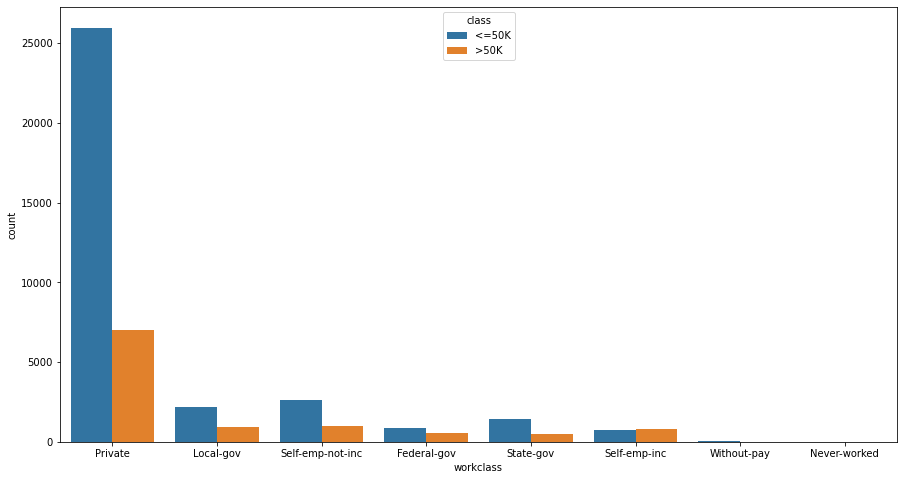

In [147]:
sns.countplot('workclass',data=df_cat,hue='class');

### Inference:
-- This plot shows that:

- In private workclass most of the people earn <=50k(belong to income group 0).
- self-emp-inc workclass is only where more people earn >50k(belong to income group 1).
- In Federal-gov workclass nearly more than half of the people earn >50k.

In [148]:
c_t = pd.crosstab(df['workclass'].sample(frac=0.002, replace=True, random_state=1),df['class'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

class             <=50K  >50K
workclass                    
Local-gov             7     2
Private              50    12
Self-emp-inc          2     3
Self-emp-not-inc      4     2
State-gov             3     3

The table was called a contingency table, by Karl Pearson, because the intent is to help determine whether one variable is contingent upon or depends upon the other variable. For example, does an interest in workclass depend on income, or are they independent?

### Hypothesis:
- H0(Null Hypothesis) : There is no relationship between workclass and income.
- H1(Alternate Hypothesis) : There is a relationship between workclass and income.

In [149]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
p_value 0.15983805134426884
[[ 6.75  2.25]
 [46.5  15.5 ]
 [ 3.75  1.25]
 [ 4.5   1.5 ]
 [ 4.5   1.5 ]]
probability=0.950, critical=9.488, stat=6.580
Independent (fail to reject H0)


#### Conclusion:
As we have accept the H0, that there is no relationship between these two categorical variable.
We can conclude that is no dependency of "workclass" attribute on the target variable "income

# Education AND Marital-status 

In [150]:
ax=pd.crosstab(index=df_cat['education'], columns= df_cat['marital-status'])
ax

marital-status  Divorced  Married-AF-spouse  Married-civ-spouse  \
education                                                         
10th                 167                  1                 492   
11th                 188                  0                 528   
12th                  60                  0                 193   
1st-4th               17                  0                 121   
5th-6th               30                  0                 261   
7th-8th               99                  0                 508   
9th                   92                  0                 338   
Assoc-acdm           275                  1                 677   
Assoc-voc            353                  2                 984   
Bachelors            812                  6                3981   
Doctorate             50                  1                 371   
HS-grad             2346                 12                7000   
Masters              349                  0                1469   
Preschool              2                  0                  27   
Prof-school           61                  0                 503   
Some-college        1530                  9                4051   

marital-status  Married-spouse-absent  Never-married  Separated  Widowed  
education                                                                 
10th                               21            512         72       66  
11th                               25            897         75       55  
12th                               10            343         19       16  
1st-4th                            16             50         11       18  
5th-6th                            27            123         31       18  
7th-8th                            19            151         38       84  
9th                                12            217         40       34  
Assoc-acdm                         19            509         40       35  
Assoc-voc                          18            528         64       57  
Bachelors                          95           2612        131      113  
Doctorate                          10             85         11       11  
HS-grad                           191           4561        593      597  
Masters                            23            606         39       55  
Preschool                           5             37          3        5  
Prof-school                         4            121          9        8  
Some-college                      103           4368        305      239

### Inference:
- Hs Grad people are married with  a spouse.
- Some colege people are either married or never married.
- Bachelores peoeple are also married with a spouse.

# Education AND Occupation

In [151]:
ax=pd.crosstab(index=df_cat['education'], columns= df_cat['occupation'])
ax

occupation    Adm-clerical  Armed-Forces  Craft-repair  Exec-managerial  \
education                                                                 
10th                    57             0           236               37   
11th                    99             0           268               47   
12th                    50             1            91               18   
1st-4th                  6             0            27                6   
5th-6th                  8             0            69                5   
7th-8th                 18             0           166               23   
9th                     16             0           142               20   
Assoc-acdm             280             0           165              233   
Assoc-voc              267             1           370              231   
Bachelors              746             1           323             1953   
Doctorate                6             0             4               74   
HS-grad               2012             5          2824             1140   
Masters                103             2            32              734   
Preschool                3             0             5                1   
Prof-school             12             1             8               60   
Some-college          1823             4          1234             1250   

occupation    Farming-fishing  Handlers-cleaners  Machine-op-inspct  \
education                                                             
10th                       64                104                149   
11th                       59                173                153   
12th                       29                 54                 59   
1st-4th                    28                 25                 36   
5th-6th                    50                 58                 93   
7th-8th                    95                 63                127   
9th                        43                 69                101   
Assoc-acdm                 24                 34                 50   
Assoc-voc                  75                 41                 95   
Bachelors                 101                 77                 98   
Doctorate                   1                  0                  1   
HS-grad                   525                928               1508   
Masters                    10                  5                 12   
Preschool                  16                  5                 12   
Prof-school                 5                  0                  1   
Some-college              233                394                483   

occupation    Other-service  Priv-house-serv  Prof-specialty  Protective-serv  \
education                                                                       
10th                    271                8              12               12   
11th                    366               18              29               18   
12th                    126                7              13               10   
1st-4th                  53               14               3                1   
5th-6th                  92               20               2                1   
7th-8th                 143               17              12                9   
9th                     139               15               4                9   
Assoc-acdm              105                3             198               48   
Assoc-voc               156                5             243               63   
Bachelors               252                9            2173              142   
Doctorate                 1                1             409                1   
HS-grad                1877               86             336              314   
Masters                  34                1            1264               19   
Preschool                21                2               1                0   
Prof-school               6                0             558              

### Inference:
- Hs Grad people are are well educated with a good job.
- Some colege people are also the same dense in number.
- Bachelores peoeple are almost the same as the above.

# Education AND Relationship

In [152]:
ax=pd.crosstab(index=df_cat['education'], columns= df_cat['relationship'])
ax

relationship  Husband  Not-in-family  Other-relative  Own-child  Unmarried  \
education                                                                    
10th              442            290              60        318        179   
11th              462            322              89        640        211   
12th              161            125              38        234         63   
1st-4th           107             60              22         11         27   
5th-6th           228            100              59         18         64   
7th-8th           472            195              43         63         99   
9th               295            156              43        106         99   
Assoc-acdm        565            471              30        192        194   
Assoc-voc         854            521              36        208        269   
Bachelors        3499           2416             129        758        501   
Doctorate         349            125               4         11         28   
HS-grad          6159           3713             587       2236       1893   
Masters          1291            777              19         77        206   
Preschool          21             37               5          7          6   
Prof-school       467            155               7         17         25   
Some-college     3540           2668             295       2524       1119   

relationship  Wife  
education           
10th            42  
11th            44  
12th            20  
1st-4th          6  
5th-6th         21  
7th-8th         27  
9th             34  
Assoc-acdm     104  
Assoc-voc      118  
Bachelors      447  
Doctorate       22  
HS-grad        712  
Masters        171  
Preschool        3  
Prof-school     35  
Some-college   459

### Inference:
- Hs Grad people are are married witha husband. There is alos a ratio of Unmarried peoeple in the group.
- Some colege people are also the same  but th ratio is slightly higher.
- Bachelores peoeple are most of them have a husband abd many are not in a family too.

# Education AND Race

In [153]:
ax=pd.crosstab(index=df_cat['education'], columns= df_cat['race'])
ax

race          Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
education                                                                
10th                          21                  15    178     11   1106
11th                          26                  26    245     22   1449
12th                           5                  15     98     16    507
1st-4th                        4                   9     22     13    185
5th-6th                        2                  26     41     23    398
7th-8th                       10                  14     88     23    764
9th                            6                  10    108     15    594
Assoc-acdm                    13                  48    158     10   1327
Assoc-voc                     31                  53    163      8   1751
Bachelors                     28                 398    466     48   6810
Doctorate                      3                  44     15      3    474
HS-grad                      172                 322   1695    105  13006
Masters                       13                 138    133     13   2244
Preschool                      1                   7     11      2     58
Prof-school                    2                  48     18      3    635
Some-college                 120                 294   1027     84   9080

### Inference:
- White people are the most in number.
- Balck people are the next highest in line.

# Education AND Sex

In [154]:
ax=pd.crosstab(index=df_cat['education'], columns= df_cat['sex'])
ax

sex           Female   Male
education                  
10th             442    889
11th             638   1130
12th             206    435
1st-4th           57    176
5th-6th          125    365
7th-8th          227    672
9th              210    523
Assoc-acdm       610    946
Assoc-voc        720   1286
Bachelors       2411   5339
Doctorate        100    439
HS-grad         4974  10326
Masters          814   1727
Preschool         24     55
Prof-school      120    586
Some-college    4096   6509

### Inference:
- Male are the most in number from the Hs Grad education category.
- Some college people are the next highest in line with Males being the highest.

# Education AND Native-country 

In [155]:
ax=pd.crosstab(index=df_cat['education'], columns= df_cat['native-country'])
ax

native-country  Cambodia  Canada  China  Columbia  Cuba  Dominican-Republic  \
education                                                                     
10th                   0       2      2         4     3                   4   
11th                   0       5      0         2     2                   4   
12th                   1       3      1         3     5                   7   
1st-4th                1       0      1         2     5                  10   
5th-6th                0       1      1         2     8                   5   
7th-8th                1       5      5         2     7                  12   
9th                    0       3      2         4     6                   7   
Assoc-acdm             0       4      0         4     4                   1   
Assoc-voc              2      11      0         5     6                   2   
Bachelors              5      38     29         5    19                   6   
Doctorate              0      11     12         1     2                   0   
HS-grad                9      49     28        34    32                  24   
Masters                0      11     24         0     9                   3   
Preschool              1       0      2         0     0                   2   
Prof-school            0       2      3         3     6                   0   
Some-college           8      33      9        10    22                  13   

native-country  Ecuador  El-Salvador  England  France  Germany  Greece  \
education                                                                
10th                  2            6        4       0        2       3   
11th                  1            7        2       0        5       1   
12th                  2            2        1       0        4       0   
1st-4th               1           12        1       0        0       0   
5th-6th               2           28        1       0        0       1   
7th-8th               2            6        0       1        2       2   
9th                   0           15        1       0        0       0   
Assoc-acdm            0            3        6       3       11       0   
Assoc-voc             2            0        3       1       16       4   
Bachelors             5            7       32      10       50       5   
Doctorate             0            1        6       2        5       0   
HS-grad              13           32       36       6       47      16   
Masters               3            3       12       7        8       5   
Preschool             0            7        0       0        0       0   
Prof-school           0            1        3       1        4       1   
Some-college         11           16       15       5       50       7   

native-country  Guatemala  Haiti  Holand-Netherlands  Honduras  Hong  Hungary  \
education                                                                       
10th                    6      3                   0         1     0        0   
11th                    6      3                   0         2     1        0   
12th                    3      2                   0         0     0        0   
1st-4th                 9      1                   0         1     0        0   
5th-6th                12      3                   0         3     1        1   
7th-8th                10      2                   0         0     1        0   
9th                     6      4                   0         0     2        0   
Assoc-acdm              1      4                   0         0     2        1   
Assoc-voc               2      0                   0         0     1        1   
Bachelors               3      5                   0         2     6        4   
Doctorate               0      0                   0         0     2        0   
HS-grad                17     24                   0         5     7        6   
Masters                 0      2                   0         0     5        2   
Preschool               2    

### Inference:
- According to graph and corsstab the people in the united-states are maxmimum in every category.
- According to graph and corsstab the people in the Trinadad&Tobago are minimum in every category.

# Education AND class

In [156]:
ax=pd.crosstab(index=df_cat['education'], columns= df_cat['class'])
ax

class         <=50K  >50K
education                
10th           1252    79
11th           1680    88
12th            595    46
1st-4th         226     7
5th-6th         466    24
7th-8th         842    57
9th             693    40
Assoc-acdm     1157   399
Assoc-voc      1503   503
Bachelors      4604  3146
Doctorate       150   389
HS-grad       12917  2383
Masters        1163  1378
Preschool        78     1
Prof-school     198   508
Some-college   8619  1986

### Inference:
- Males from the Hs Grad earn the highest from all.
- Males from the some college are next in line.
- Females from Masters degree eran higher than the Males.
- According to the above graph there are more people earing more than 50k in almost every category.

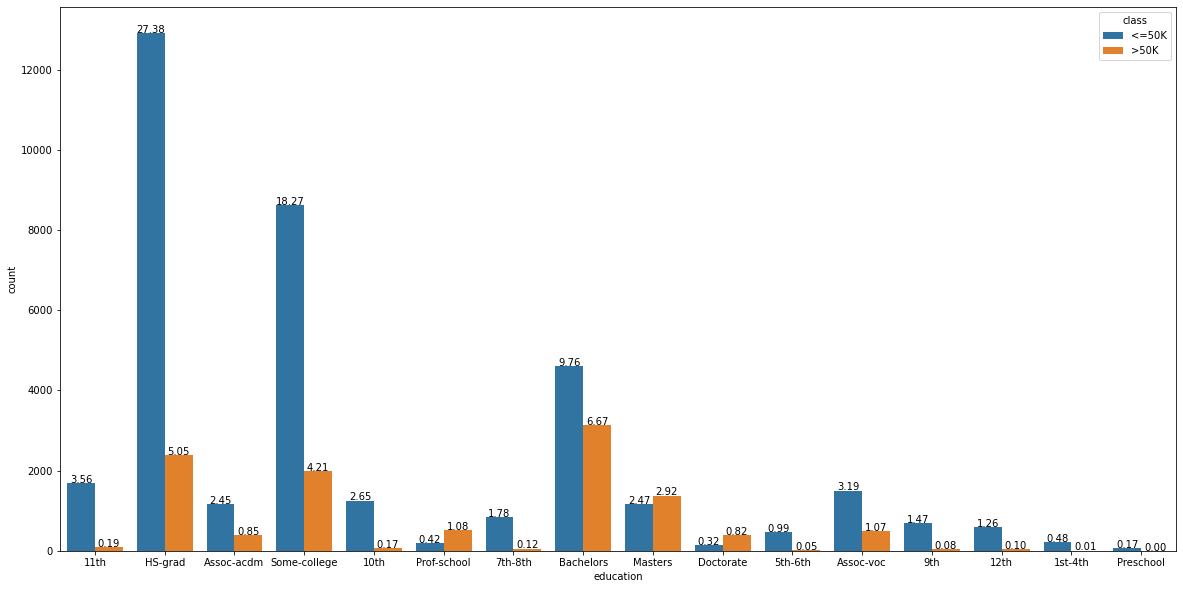

In [157]:
plt.figure(figsize=(20,10))
total = float(len(df["class"]) )

ax = sns.countplot(x="education", hue="class", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

- This plot shows that:

- Despite the fact that most of the categories fall under the HS-grad but the interesting thing is only 5.12% of all people belong to the income group 1(i.e. earns more than 50k), surprisely less than the categories fall under the Bachelors which is 6.78%.
- There only few categories in "education" attribute whose percentage to fall under income group 1 is greater than the falling under income group 0.
- These are prof-school, masters and doctorate.
- We can also infer that higher eduction may provide better earnings.

#### Hypothesis test (to test the relationship between income & education)
Here, In this example

- H0(Null Hypothesis) : There is no relationship between education and income.
- H1(Alternate Hypothesis) : There is a relationship between education and income

In [158]:
# contingency table
c_t = pd.crosstab(df['education'].sample(frac=0.002, replace=True, random_state=1),df['class'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

class         <=50K  >50K
education                
10th              2     0
12th              2     0
5th-6th           1     0
7th-8th           2     0
9th               2     0
Assoc-voc         3     2
Bachelors         7     9
Doctorate         0     1
HS-grad          27     3
Masters           2     5
Some-college     24     2

In [159]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print("p-value", p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=10
p-value 0.0003984658085764228
[[ 1.53191489  0.46808511]
 [ 1.53191489  0.46808511]
 [ 0.76595745  0.23404255]
 [ 1.53191489  0.46808511]
 [ 1.53191489  0.46808511]
 [ 3.82978723  1.17021277]
 [12.25531915  3.74468085]
 [ 0.76595745  0.23404255]
 [22.9787234   7.0212766 ]
 [ 5.36170213  1.63829787]
 [19.91489362  6.08510638]]
probability=0.950, critical=18.307, stat=32.013
Dependent (reject H0)


- With the help of Chi-Squared test,


- As we have rejected the H0, that there is no relationship between these two categorical variable.
- We can conclude that is some dependency of "education" attribute on the target variable "income"

# Education-num AND Marital-status

In [160]:
ax=pd.crosstab(index=df_cat['education-num'], columns= df_cat['marital-status'])
ax

marital-status  Divorced  Married-AF-spouse  Married-civ-spouse  \
education-num                                                     
1                      2                  0                  27   
2                     17                  0                 121   
3                     30                  0                 261   
4                     99                  0                 508   
5                     92                  0                 338   
6                    167                  1                 492   
7                    188                  0                 528   
8                     60                  0                 193   
9                   2346                 12                7000   
10                  1530                  9                4051   
11                   353                  2                 984   
12                   275                  1                 677   
13                   812                  6                3981   
14                   349                  0                1469   
15                    61                  0                 503   
16                    50                  1                 371   

marital-status  Married-spouse-absent  Never-married  Separated  Widowed  
education-num                                                             
1                                   5             37          3        5  
2                                  16             50         11       18  
3                                  27            123         31       18  
4                                  19            151         38       84  
5                                  12            217         40       34  
6                                  21            512         72       66  
7                                  25            897         75       55  
8                                  10            343         19       16  
9                                 191           4561        593      597  
10                                103           4368        305      239  
11                                 18            528         64       57  
12                                 19            509         40       35  
13                                 95           2612        131      113  
14                                 23            606         39       55  
15                                  4            121          9        8  
16                                 10             85         11       11

### Inference:
- Note:As mentioned as before the education-num is id for each education classes,so they will have same inference.
- Hs Grad(9) people are married with  a spouse.
- Some colege people are either married or never married.
- Bachelores peoeple are also married with a spouse.

#  Education-num AND Occupation

In [161]:
ax=pd.crosstab(index=df_cat['education-num'], columns= df_cat['occupation'])
ax

occupation     Adm-clerical  Armed-Forces  Craft-repair  Exec-managerial  \
education-num                                                              
1                         3             0             5                1   
2                         6             0            27                6   
3                         8             0            69                5   
4                        18             0           166               23   
5                        16             0           142               20   
6                        57             0           236               37   
7                        99             0           268               47   
8                        50             1            91               18   
9                      2012             5          2824             1140   
10                     1823             4          1234             1250   
11                      267             1           370              231   
12                      280             0           165              233   
13                      746             1           323             1953   
14                      103             2            32              734   
15                       12             1             8               60   
16                        6             0             4               74   

occupation     Farming-fishing  Handlers-cleaners  Machine-op-inspct  \
education-num                                                          
1                           16                  5                 12   
2                           28                 25                 36   
3                           50                 58                 93   
4                           95                 63                127   
5                           43                 69                101   
6                           64                104                149   
7                           59                173                153   
8                           29                 54                 59   
9                          525                928               1508   
10                         233                394                483   
11                          75                 41                 95   
12                          24                 34                 50   
13                         101                 77                 98   
14                          10                  5                 12   
15                           5                  0                  1   
16                           1                  0                  1   

occupation     Other-service  Priv-house-serv  Prof-specialty  \
education-num                                                   
1                         21                2               1   
2                         53               14               3   
3                         92               20               2   
4                        143               17              12   
5                        139               15               4   
6                        271                8              12   
7                        366               18              29   
8                        126                7              13   
9                       1877               86             336   
10                      1146               24             627   
11                       156                5             243   
12                       105                3             198   
13                       252                9            2173   
14                        34                1            1264   
15                         6                0             558   
16                         1                1             409   

occupation     Protective-serv  Sales  Tech-support  Transport-moving  
education-num                                                          
1                  

### Inference:
- From the above output we can see, Armed-forces people are working only for federal government rest all occupation contribute in all workclass.

# Education-num AND Relationship

In [162]:
ax=pd.crosstab(index=df_cat['education-num'], columns= df_cat['relationship'])
ax

relationship   Husband  Not-in-family  Other-relative  Own-child  Unmarried  \
education-num                                                                 
1                   21             37               5          7          6   
2                  107             60              22         11         27   
3                  228            100              59         18         64   
4                  472            195              43         63         99   
5                  295            156              43        106         99   
6                  442            290              60        318        179   
7                  462            322              89        640        211   
8                  161            125              38        234         63   
9                 6159           3713             587       2236       1893   
10                3540           2668             295       2524       1119   
11                 854            521              36        208        269   
12                 565            471              30        192        194   
13                3499           2416             129        758        501   
14                1291            777              19         77        206   
15                 467            155               7         17         25   
16                 349            125               4         11         28   

relationship   Wife  
education-num        
1                 3  
2                 6  
3                21  
4                27  
5                34  
6                42  
7                44  
8                20  
9               712  
10              459  
11              118  
12              104  
13              447  
14              171  
15               35  
16               22

# Education-num AND Race

In [163]:
ax=pd.crosstab(index=df_cat['education-num'], columns= df_cat['race'])
ax

race           Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
education-num                                                             
1                               1                   7     11      2     58
2                               4                   9     22     13    185
3                               2                  26     41     23    398
4                              10                  14     88     23    764
5                               6                  10    108     15    594
6                              21                  15    178     11   1106
7                              26                  26    245     22   1449
8                               5                  15     98     16    507
9                             172                 322   1695    105  13006
10                            120                 294   1027     84   9080
11                             31                  53    163      8   1751
12                             13                  48    158     10   1327
13                             28                 398    466     48   6810
14                             13                 138    133     13   2244
15                              2                  48     18      3    635
16                              3                  44     15      3    474

# Education-num AND Sex

In [164]:
ax=pd.crosstab(index=df_cat['education-num'], columns= df_cat['sex'])
ax

sex            Female   Male
education-num               
1                  24     55
2                  57    176
3                 125    365
4                 227    672
5                 210    523
6                 442    889
7                 638   1130
8                 206    435
9                4974  10326
10               4096   6509
11                720   1286
12                610    946
13               2411   5339
14                814   1727
15                120    586
16                100    439

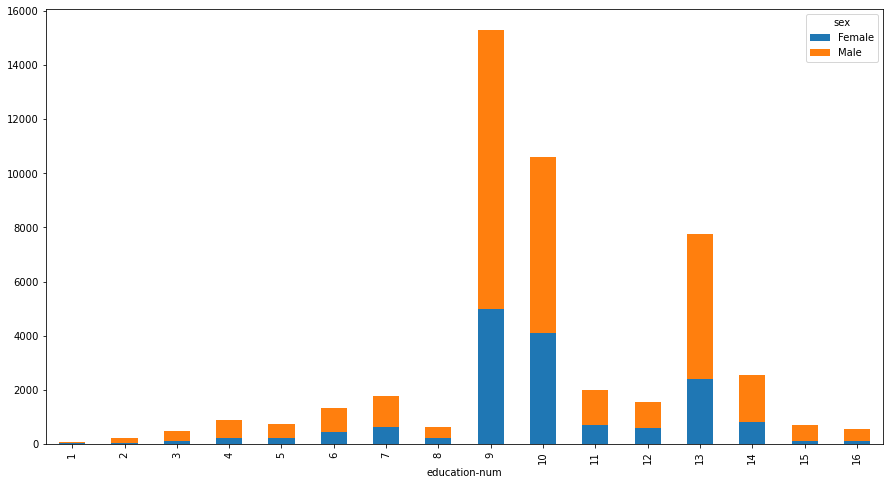

In [165]:
ax.plot.bar(stacked=True);

# Education-num AND Native-country

In [166]:
ax=pd.crosstab(index=df_cat['education-num'], columns= df_cat['native-country'])
ax

native-country  Cambodia  Canada  China  Columbia  Cuba  Dominican-Republic  \
education-num                                                                 
1                      1       0      2         0     0                   2   
2                      1       0      1         2     5                  10   
3                      0       1      1         2     8                   5   
4                      1       5      5         2     7                  12   
5                      0       3      2         4     6                   7   
6                      0       2      2         4     3                   4   
7                      0       5      0         2     2                   4   
8                      1       3      1         3     5                   7   
9                      9      49     28        34    32                  24   
10                     8      33      9        10    22                  13   
11                     2      11      0         5     6                   2   
12                     0       4      0         4     4                   1   
13                     5      38     29         5    19                   6   
14                     0      11     24         0     9                   3   
15                     0       2      3         3     6                   0   
16                     0      11     12         1     2                   0   

native-country  Ecuador  El-Salvador  England  France  Germany  Greece  \
education-num                                                            
1                     0            7        0       0        0       0   
2                     1           12        1       0        0       0   
3                     2           28        1       0        0       1   
4                     2            6        0       1        2       2   
5                     0           15        1       0        0       0   
6                     2            6        4       0        2       3   
7                     1            7        2       0        5       1   
8                     2            2        1       0        4       0   
9                    13           32       36       6       47      16   
10                   11           16       15       5       50       7   
11                    2            0        3       1       16       4   
12                    0            3        6       3       11       0   
13                    5            7       32      10       50       5   
14                    3            3       12       7        8       5   
15                    0            1        3       1        4       1   
16                    0            1        6       2        5       0   

native-country  Guatemala  Haiti  Holand-Netherlands  Honduras  Hong  Hungary  \
education-num                                                                   
1                       2      4                   0         0     1        0   
2                       9      1                   0         1     0        0   
3                      12      3                   0         3     1        1   
4                      10      2                   0         0     1        0   
5                       6      4                   0         0     2        0   
6                       6      3                   0         1     0        0   
7                       6      3                   0         2     1        0   
8                       3      2                   0         0     0        0   
9                      17     24                   0         5     7        6   
10                      7     17                   1         5     1        2   
11                      2      0                   0         0     1        1   
12                      1      4                   0         0     2        1   
13                      3      5                   0         2     6        4   
14                      0    

#  Education-num AND class

In [167]:
ax=pd.crosstab(index=df_cat['education-num'], columns= df_cat['class'])
ax

class          <=50K  >50K
education-num             
1                 78     1
2                226     7
3                466    24
4                842    57
5                693    40
6               1252    79
7               1680    88
8                595    46
9              12917  2383
10              8619  1986
11              1503   503
12              1157   399
13              4604  3146
14              1163  1378
15               198   508
16               150   389

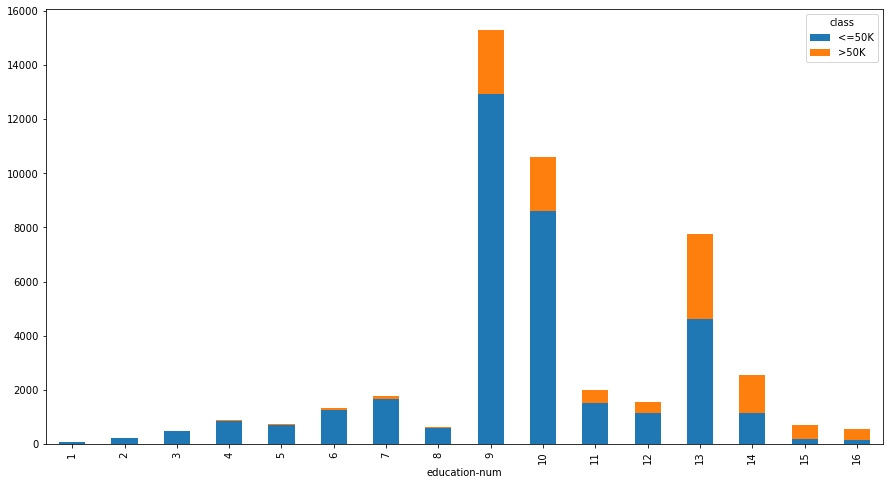

In [168]:
ax.plot.bar(stacked=True);

## Inference
- According to the plot we can see that if you have higher education then we will more than 50K income.
- According to the plot we can see that if you have lower education then we will have less than 50k income.

# Marital-status AND Occupation

In [169]:
ax=pd.crosstab(index=df_cat['marital-status'], columns= df_cat['occupation'])
ax

occupation             Adm-clerical  Armed-Forces  Craft-repair  \
marital-status                                                    
Divorced                       1170             0           661   
Married-AF-spouse                 5             0             3   
Married-civ-spouse             1468             7          3723   
Married-spouse-absent            82             0            77   
Never-married                  2323             8          1273   
Separated                       218             0           154   
Widowed                         240             0            73   

occupation             Exec-managerial  Farming-fishing  Handlers-cleaners  \
marital-status                                                               
Divorced                           850               84                195   
Married-AF-spouse                    3                1                  1   
Married-civ-spouse                3451              771                703   
Married-spouse-absent               48               30                 32   
Never-married                     1219              416               1015   
Separated                          118               23                 60   
Widowed                            143               33                 24   

occupation             Machine-op-inspct  Other-service  Priv-house-serv  \
marital-status                                                             
Divorced                             431            736               43   
Married-AF-spouse                      1              5                0   
Married-civ-spouse                  1446           1052               25   
Married-spouse-absent                 35             87                9   
Never-married                        859           2388               95   
Separated                            121            273               21   
Widowed                               85            247               37   

occupation             Prof-specialty  Protective-serv  Sales  Tech-support  \
marital-status                                                                
Divorced                          767              119    643           235   
Married-AF-spouse                   3                1      5             0   
Married-civ-spouse               3011              562   2404           594   
Married-spouse-absent              61                7     52             8   
Never-married                    1780              226   1946           496   
Separated                         143               22    143            44   
Widowed                           119               10    139            35   

occupation             Transport-moving  
marital-status                           
Divorced                            247  
Married-AF-spouse                     0  
Married-civ-spouse                 1426  
Married-spouse-absent                27  
Never-married                       471  
Separated                            50  
Widowed                              37

### Inference:
- According to all the plots in the married-civ-spouse there are more category of the occupation where everyone are present.
- According to all the plots in the married-AF-spouse there are less category of the occupation where everyone are present.

# Marital-status AND Relationship

In [170]:
ax=pd.crosstab(index=df_cat['marital-status'], columns= df_cat['relationship'])
ax

relationship           Husband  Not-in-family  Other-relative  Own-child  \
marital-status                                                             
Divorced                     0           3506             179        450   
Married-AF-spouse           10              0               1          1   
Married-civ-spouse       18902             22             197        138   
Married-spouse-absent        0            310              52         58   
Never-married                0           6913             895       6605   
Separated                    0            610              76        143   
Widowed                      0            770              66         25   

relationship           Unmarried  Wife  
marital-status                          
Divorced                    2296     0  
Married-AF-spouse              0    20  
Married-civ-spouse             0  2245  
Married-spouse-absent        178     0  
Never-married               1307     0  
Separated                    652     0  
Widowed                      550     0

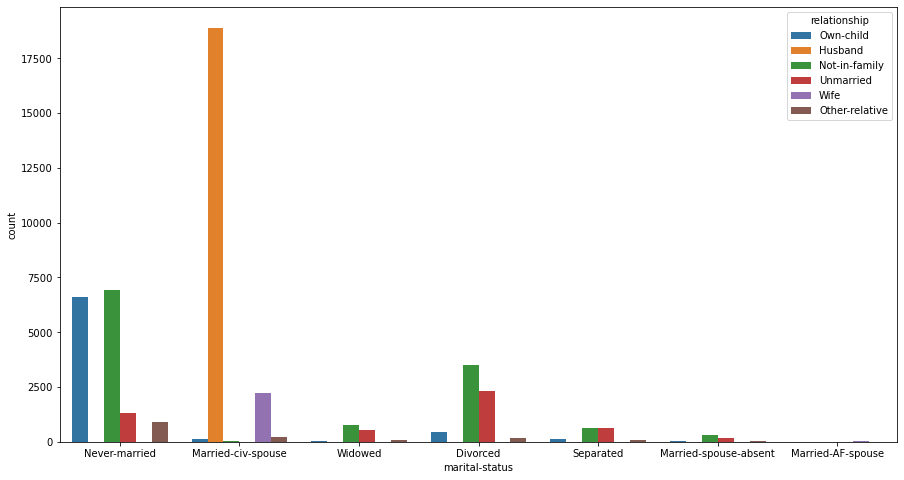

In [171]:
sns.countplot('marital-status',data=df_cat,hue='relationship');

### Inference 
- According to above plots in married-civ-spouse there are more husband present .
- According to above plots in widowed,separated,Married-spouse-absent and Never-married there are no husband present 
- According to above plots in married-civ-spouse even wife are more after the husband.
- Husband and wife are more in married-civ-spouse.
- Husband and wife are less in widowed,separated,Married-spouse-absent and Never-married, that is zero.

# Marital-status AND Race

In [172]:
ax=pd.crosstab(index=df_cat['marital-status'], columns= df_cat['race'])
ax

race                   Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  \
marital-status                                                                
Divorced                               88                 105    681     42   
Married-AF-spouse                       0                   1      3      0   
Married-civ-spouse                    165                 708   1195    152   
Married-spouse-absent                  12                  62     85     16   
Never-married                         157                 529   1940    159   
Separated                              17                  26    376     21   
Widowed                                18                  36    186      9   

race                   White  
marital-status                
Divorced                5515  
Married-AF-spouse         28  
Married-civ-spouse     19284  
Married-spouse-absent    423  
Never-married          12935  
Separated               1041  
Widowed                 1162

### Inference
- marital-status is not affected by race.

# Marital-status AND Sex

In [173]:
ax=pd.crosstab(index=df_cat['marital-status'], columns= df_cat['sex'])
ax

sex                    Female   Male
marital-status                      
Divorced                 3901   2530
Married-AF-spouse          22     10
Married-civ-spouse       2416  19088
Married-spouse-absent     293    305
Never-married            7067   8653
Separated                 911    570
Widowed                  1164    247

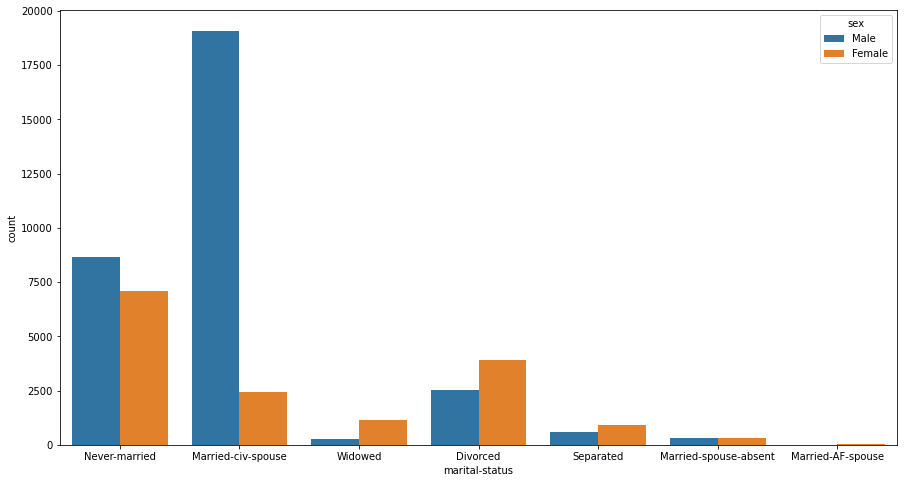

In [174]:
sns.countplot('marital-status',data=df_cat,hue='sex');

### Inference
- According to the above plots females are more Divorced.
- According to the above plots Married-civ-spouse has more number of males.

# Marital-status AND Native-country

In [175]:
ax=pd.crosstab(index=df_cat['marital-status'], columns= df_cat['native-country'])
ax

native-country         Cambodia  Canada  China  Columbia  Cuba  \
marital-status                                                   
Divorced                      1      27      6         9    22   
Married-AF-spouse             0       0      0         0     0   
Married-civ-spouse           16      91     80        31    72   
Married-spouse-absent         1       4      7         6     3   
Never-married                 9      46     21        26    25   
Separated                     0       5      3         6     9   
Widowed                       1       5      2         3     5   

native-country         Dominican-Republic  Ecuador  El-Salvador  England  \
marital-status                                                             
Divorced                               13        5            5       21   
Married-AF-spouse                       0        0            0        0   
Married-civ-spouse                     34       21           50       53   
Married-spouse-absent                  11        3            8        1   
Never-married                          35       11           71       40   
Separated                               6        3            9        2   
Widowed                                 1        1            3        6   

native-country         France  Germany  Greece  Guatemala  Haiti  \
marital-status                                                     
Divorced                    8       35       2          4      7   
Married-AF-spouse           0        0       0          0      0   
Married-civ-spouse         15       94      32         21     30   
Married-spouse-absent       1        4       0          7      7   
Never-married              11       56       9         42     26   
Separated                   0        7       0          6      3   
Widowed                     1        8       2          4      2   

native-country         Holand-Netherlands  Honduras  Hong  Hungary  India  \
marital-status                                                              
Divorced                                0         5     0        2      3   
Married-AF-spouse                       0         0     0        0      0   
Married-civ-spouse                      0         4    19        9     85   
Married-spouse-absent                   0         2     0        1     14   
Never-married                           1         6    10        5     38   
Separated                               0         3     1        0      2   
Widowed                                 0         0     0        1      3   

native-country         Iran  Ireland  Italy  Jamaica  Japan  Laos  Mexico  \
marital-status                                                              
Divorced                  7        3      5        9     12     0      41   
Married-AF-spouse         0        0      0        0      0     0       0   
Married-civ-spouse       33       14     71       32     45    13     440   
Married-spouse-absent     1        2      1        8      2     2      52   
Never-married            14       17     16       47     24     8     318   
Separated                 1        1      2        8      2     0      45   
Widowed                   2        0      6        1      1     0      17   

native-country         Nicaragua  Outlying-US(Guam-USVI-etc)  Peru  \
marital-status                                                       
Divorced                       4                           5     5   
Married-AF-spouse              0                           0     0   
Married-civ-spouse            14                           5    16   
Married-spouse-absent          0                           0     2   
Never-married                 19                          11    17   
Separated                      4                           1     3   
Widowed                        3                           1     0   

native-country         Philippines  Poland  Portugal  Puerto-Rico  Scotland  \
marital-s

### Infrence
- According to the  graph the data is fairly divided,marital-status is not effected by the country.

# Marital-status AND class

In [176]:
ax=pd.crosstab(index=df_cat['marital-status'], columns= df_cat['class'])
ax

class                  <=50K  >50K
marital-status                    
Divorced                5834   597
Married-AF-spouse         19    13
Married-civ-spouse     11992  9512
Married-spouse-absent    549    49
Never-married          15058   662
Separated               1393    88
Widowed                 1298   113

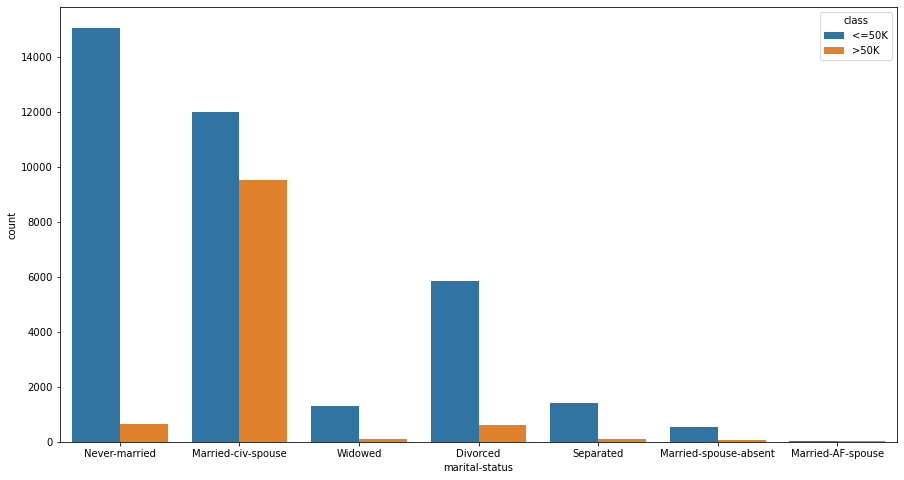

In [177]:
plt.figure(figsize=(15,8))
sns.countplot('marital-status',data=df_cat,hue='class');

### Inference:
- People who Never married earn the highest.
- Married people with a spouse have a balanced in both the classes.
- Divorced people also earn a good amont and are in huge number.

In [178]:
# contingency table
c_t = pd.crosstab(df['marital-status'].sample(frac=0.002, replace=True, random_state=1),df['class'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

class                  <=50K  >50K
marital-status                    
Divorced                  11     1
Married-civ-spouse        24    18
Married-spouse-absent      2     1
Never-married             30     1
Separated                  3     1
Widowed                    2     0

- Hypothesis test (to test the relationship between income & marital-status).
- Here, In this example


- H0(Null Hypothesis) : There is no relationship between marital-status and income.
- H1(Alternate Hypothesis) : There is a relationship between marital-status and income.

In [179]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
p_value 0.0026955070813438793
[[ 9.19148936  2.80851064]
 [32.17021277  9.82978723]
 [ 2.29787234  0.70212766]
 [23.74468085  7.25531915]
 [ 3.06382979  0.93617021]
 [ 1.53191489  0.46808511]]
probability=0.950, critical=11.070, stat=18.209
Dependent (reject H0)


### Conclusion:
- With the help of Chi-Squared test,


- As we have rejected the H0, that there is no relationship between these two categorical variable.
- We can conclude that is some dependency of "marital-status" attribute on the target variable "income"

# Occupation AND Relationship

In [180]:
ax=pd.crosstab(index=df_cat['occupation'], columns= df_cat['relationship'])
ax

relationship       Husband  Not-in-family  Other-relative  Own-child  \
occupation                                                             
Adm-clerical           915           1698             206       1129   
Armed-Forces             6              5               2          2   
Craft-repair          3635           1186             146        576   
Exec-managerial       3090           1485              72        344   
Farming-fishing        745            257              51        199   
Handlers-cleaners      654            451             137        607   
Machine-op-inspct     1302            712             117        395   
Other-service          744           1422             268       1276   
Priv-house-serv          1             93              29         34   
Prof-specialty        2544           1827              78        457   
Protective-serv        543            210              22        110   
Sales                 2173           1295             160       1038   
Tech-support           516            438              36        177   
Transport-moving      1389            442              40        228   

relationship       Unmarried  Wife  
occupation                          
Adm-clerical            1046   512  
Armed-Forces               0     0  
Craft-repair             373    48  
Exec-managerial          504   337  
Farming-fishing           88    18  
Handlers-cleaners        154    27  
Machine-op-inspct        336   116  
Other-service            815   263  
Priv-house-serv           56    17  
Prof-specialty           531   447  
Protective-serv           53     9  
Sales                    471   195  
Tech-support             174    71  
Transport-moving         135    24

### Inference:
- According to the graph Armed-Forces they have no one working from Unmarried, Wife .
- According to the graph occupation dose not depand on relationship.

# Occupation AND Race

In [181]:
ax=pd.crosstab(index=df_cat['occupation'], columns= df_cat['race'])
ax

race               Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
occupation                                                                    
Adm-clerical                       54                 196    713     43   4500
Armed-Forces                        1                   0      1      0     13
Craft-repair                       59                 116    356     58   5375
Exec-managerial                    47                 185    325     19   5256
Farming-fishing                    14                  22     53     14   1255
Handlers-cleaners                  33                  38    250     18   1691
Machine-op-inspct                  28                  84    421     47   2398
Other-service                      57                 176    794     51   3710
Priv-house-serv                     1                   5     47      4    173
Prof-specialty                     47                 274    351     43   5169
Protective-serv                    12                  21    137      7    770
Sales                              35                 163    337     36   4761
Tech-support                        8                  61    123      9   1211
Transport-moving                   27                  38    243     19   1931

### Inference:
- White People are spread throughout in all ocuupation with the highest in  number.
- Black people are also present in alsmost all the categories.

# Occupation AND Sex

In [182]:
ax=pd.crosstab(index=df_cat['occupation'], columns= df_cat['sex'])
ax

sex                Female  Male
occupation                     
Adm-clerical         3693  1813
Armed-Forces            0    15
Craft-repair          320  5644
Exec-managerial      1692  4140
Farming-fishing        93  1265
Handlers-cleaners     245  1785
Machine-op-inspct     796  2182
Other-service        2637  2151
Priv-house-serv       219    11
Prof-specialty       2170  3714
Protective-serv       116   831
Sales                1912  3420
Tech-support          550   862
Transport-moving      123  2135

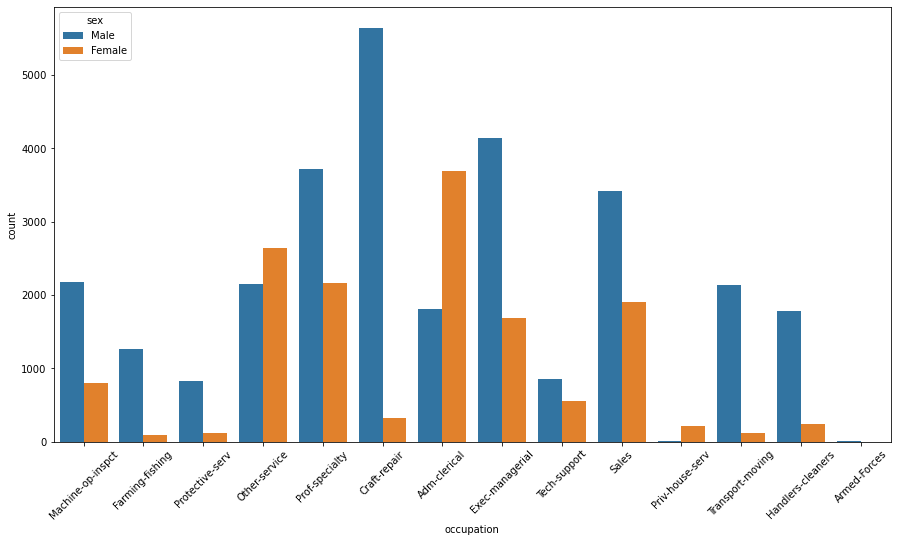

In [183]:
plt.figure(figsize=(15,8))
sns.countplot('occupation',data=df_cat,hue='sex');
plt.xticks(rotation=45)
plt.show()

### Inference:
- Males are almost higher in all categories.
- There isn imbalance seen in certain occupation.
- Mlaes in Craft repair are the highest in number.

# Occupation AND Native-country 

In [184]:
ax=pd.crosstab(index=df_cat['occupation'], columns= df_cat['native-country'])
ax

native-country     Cambodia  Canada  China  Columbia  Cuba  \
occupation                                                   
Adm-clerical              0      14      4         9    19   
Armed-Forces              0       0      0         0     0   
Craft-repair              9      23      5        13     7   
Exec-managerial           1      20     15         6    20   
Farming-fishing           1       3      0         1     3   
Handlers-cleaners         0       1      0         5     5   
Machine-op-inspct         5       8     10        14     9   
Other-service             1      20     26        11    17   
Priv-house-serv           0       0      0         3     2   
Prof-specialty            4      40     39         6    17   
Protective-serv           0       2      0         0     7   
Sales                     4      17      6         3    15   
Tech-support              0       4      4         2     1   
Transport-moving          1       9      2         5     9   

native-country     Dominican-Republic  Ecuador  El-Salvador  England  France  \
occupation                                                                     
Adm-clerical                        9        4            4        9       3   
Armed-Forces                        0        0            0        0       0   
Craft-repair                       10        7           21       12       1   
Exec-managerial                     4        4            2       32       8   
Farming-fishing                     0        0            3        1       1   
Handlers-cleaners                   7        2           10        2       0   
Machine-op-inspct                  27        9            7        3       0   
Other-service                      19        4           53        9       2   
Priv-house-serv                     1        1           11        3       2   
Prof-specialty                      2        4            6       26      10   
Protective-serv                     1        0            1        3       1   
Sales                               9        3           11        9       2   
Tech-support                        0        1            2        5       4   
Transport-moving                    5        3            7        1       0   

native-country     Germany  Greece  Guatemala  Haiti  Holand-Netherlands  \
occupation                                                                 
Adm-clerical            32       2          3      7                   0   
Armed-Forces             0       0          0      0                   0   
Craft-repair            23       7         14      6                   0   
Exec-managerial         29      16          2      0                   0   
Farming-fishing          3       0          5      2                   0   
Handlers-cleaners        5       1         11      3                   0   
Machine-op-inspct        8       2         12      7                   1   
Other-service           12       6          9     26                   0   
Priv-house-serv          1       0         14      1                   0   
Prof-specialty          38       3          2      6                   0   
Protective-serv          7       0          1      1                   0   
Sales                   20       6          5      3                   0   
Tech-support             8       0          2      1                   0   
Transport-moving         5       2          2      6                   0   

native-country     Honduras  Hong  Hungary  India  Iran  Ireland  Italy  \
occupation                                                                
Adm-clerical              2     4        1     18     3        2     13   
Armed-Forces              0     0        0      0     0        0      0   
Craft-repair              3     5        5     10     5       10     18   
Exec-managerial           1     4        4     15    11        4      8   
Farming-fishing           0     1        0      0     0    

### Inference 
- According to the graph more people in united-states are working and have more occupation.

# Occupation AND class

In [185]:
ax=pd.crosstab(index=df_cat['occupation'], columns= df_cat['class'])
ax

class              <=50K  >50K
occupation                    
Adm-clerical        4765   741
Armed-Forces          10     5
Craft-repair        4638  1326
Exec-managerial     3084  2748
Farming-fishing     1209   149
Handlers-cleaners   1899   131
Machine-op-inspct   2612   366
Other-service       4597   191
Priv-house-serv      228     2
Prof-specialty      3287  2597
Protective-serv      650   297
Sales               3950  1382
Tech-support        1006   406
Transport-moving    1804   454

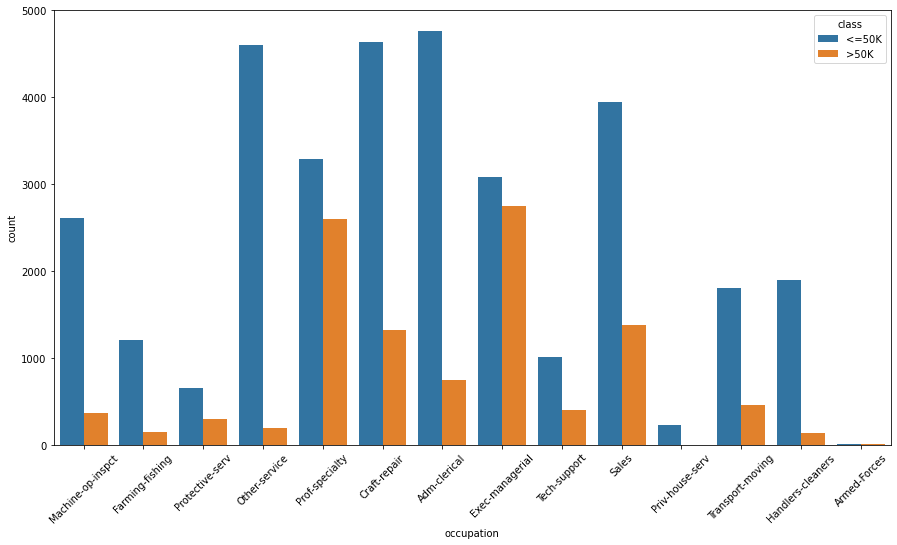

In [186]:
sns.countplot('occupation',data=df,hue='class');
plt.xticks(rotation=45)
plt.show()

### Inference:
- Males in almost all the categories are the highest.
- There is a lot of imbalance seen in many of the  occupation among the class.
- Prf specaialy Males are the most in number.

##### Hypothesis test (to test the relationship between income & occupation)
Here, In this example

- H0(Null Hypothesis) : There is no relationship between occupation and income.
- H1(Alternate Hypothesis) : There is a relationship between occupation and income.

In [187]:
# contingency table
c_t = pd.crosstab(df['occupation'].sample(frac=0.002, replace=True, random_state=1),df['class'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

class              <=50K  >50K
occupation                    
Adm-clerical           9     1
Craft-repair           7     3
Exec-managerial        8    10
Farming-fishing        1     0
Handlers-cleaners      1     0
Machine-op-inspct      8     0
Other-service         14     0
Prof-specialty         7     2
Protective-serv        0     1
Sales                  5     2
Tech-support           3     2
Transport-moving       3     1

In [188]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=11
[[ 7.5   2.5 ]
 [ 7.5   2.5 ]
 [13.5   4.5 ]
 [ 0.75  0.25]
 [ 0.75  0.25]
 [ 6.    2.  ]
 [10.5   3.5 ]
 [ 6.75  2.25]
 [ 0.75  0.25]
 [ 5.25  1.75]
 [ 3.75  1.25]
 [ 3.    1.  ]]
probability=0.950, critical=19.675, stat=21.981
Dependent (reject H0)


##### Final conclusion
With the help of Chi-Squared test,

- As we have rejected the H0, that there is no relationship between these two categorical variable.
- We can conclude that is some dependency of "occupation" attribute on the target variable "income"

# Relationship AND Race

In [189]:
ax=pd.crosstab(index=df_cat['relationship'], columns= df_cat['race'])
ax

race            Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
relationship                                                               
Husband                        132                 563    953    118  17146
Not-in-family                  121                 310   1161    103  10436
Other-relative                  20                 122    231     41   1052
Own-child                       64                 243    801     57   6255
Unmarried                       92                 129   1104     57   3601
Wife                            28                 100    216     23   1898

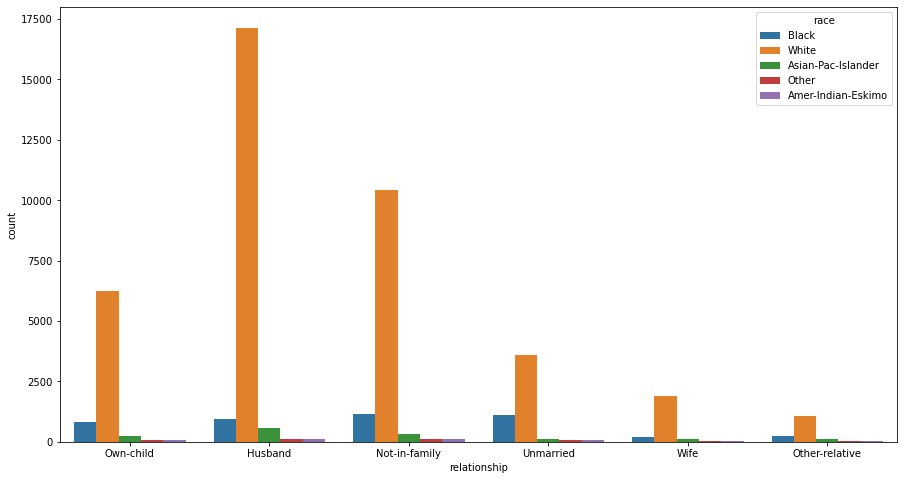

In [190]:
sns.countplot('relationship',data=df_cat,hue='race');


### Inference:
- White People who married with husband are the highest.
- White people have an imbalanced in all the classes.

# Relationship AND Sex

In [191]:
ax=pd.crosstab(index=df_cat['relationship'], columns= df_cat['sex'])
ax

sex             Female   Male
relationship                 
Husband              1  18911
Not-in-family     5689   6442
Other-relative     672    794
Own-child         3322   4098
Unmarried         3828   1155
Wife              2262      3

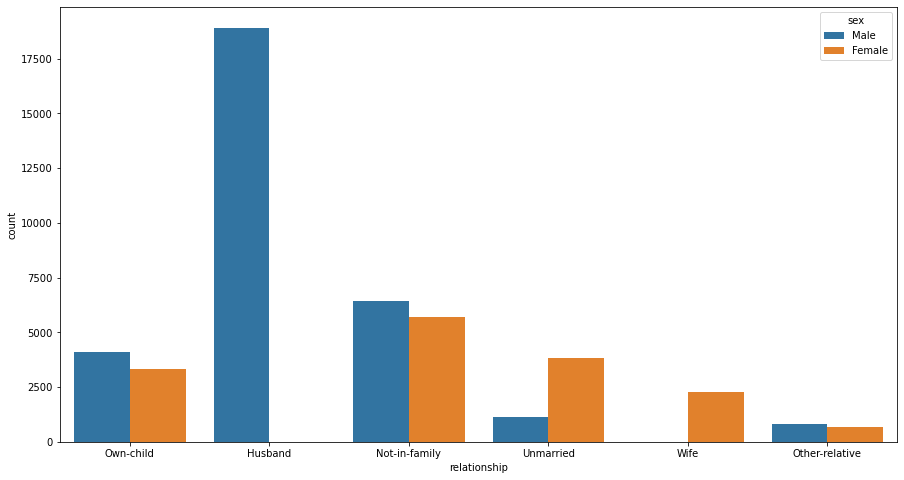

In [192]:
sns.countplot('relationship',data=df_cat,hue='sex');

### Inference:
- People who Never married earn the highest.
- Male Husbands are the highest in number as seen.
- Not in family has a kind of banlanced in ratio in both the genders.

# Relationship AND Native-country

In [193]:
ax=pd.crosstab(index=df_cat['relationship'], columns= df_cat['native-country'])
ax

native-country  Cambodia  Canada  China  Columbia  Cuba  Dominican-Republic  \
relationship                                                                  
Husband               11      75     62        25    63                  26   
Not-in-family          7      53     23        22    28                  24   
Other-relative         5       1     10         7     6                  10   
Own-child              2      16      7         8    17                  15   
Unmarried              2      18      6        16    15                  19   
Wife                   1      15     11         3     7                   6   

native-country  Ecuador  El-Salvador  England  France  Germany  Greece  \
relationship                                                             
Husband              16           40       44      14       82      28   
Not-in-family         9           28       44      13       53       7   
Other-relative       10           28        1       0        3       2   
Own-child             2           21       16       3       26       4   
Unmarried             6           22       10       5       28       2   
Wife                  1            7        8       1       12       2   

native-country  Guatemala  Haiti  Holand-Netherlands  Honduras  Hong  Hungary  \
relationship                                                                    
Husband                20     24                   0         1    12        8   
Not-in-family          29     12                   0         4     7        8   
Other-relative         16     10                   1         3     3        1   
Own-child               7      8                   0         1     0        0   
Unmarried              11     16                   0         8     1        0   
Wife                    1      5                   0         3     7        1   

native-country  India  Iran  Ireland  Italy  Jamaica  Japan  Laos  Mexico  \
relationship                                                                
Husband            78    29       13     61       27     38     9     382   
Not-in-family      32    11       19     16       29     27     4     178   
Other-relative     10     1        2      3       11      0     1     125   
Own-child          14     7        1      9       13      7     3      81   
Unmarried           8     6        2      4       21      8     2     119   
Wife                3     4        0      8        4      6     4      28   

native-country  Nicaragua  Outlying-US(Guam-USVI-etc)  Peru  Philippines  \
relationship                                                               
Husband                10                           4    13          100   
Not-in-family           4                          12     7           49   
Other-relative          8                           1     2           28   
Own-child               9                           2    10           52   
Unmarried              10                           3     8           29   
Wife                    3                           1     3           26   

native-country  Poland  Portugal  Puerto-Rico  Scotland  South  Taiwan  \
relationship                                                             
Husband             36        34           52         7     39      28   
Not-in-family       24         8           46         5     16      14   
Other-relative       5         1           12         1     12       2   
Own-child            8        10           14         1     19      10   
Unmarried            8         7           40         4     14       4   
Wife                 4         5           16         3      8       4   

native-country  Thailand  Trinadad&Tobago  United-States  Vietnam  Yugoslavia  
relationship                                                                   
Husband                9               11          17013       29          13  
Not-in-family          8                6          11008       15 

### Inference
- According to the graph relationship dose not depand on the  native-country

# Relationship AND class

In [194]:
ax=pd.crosstab(index=df_cat['relationship'], columns= df_cat['class'])
ax


class           <=50K  >50K
relationship               
Husband         10499  8413
Not-in-family   10993  1138
Other-relative   1415    51
Own-child        7322    98
Unmarried        4705   278
Wife             1209  1056

### Inference:
- According to the crosstab in the earing more than the 50k is Not-in-family.
- According to the corsstab earning less than 50k  is present in Other-relative.

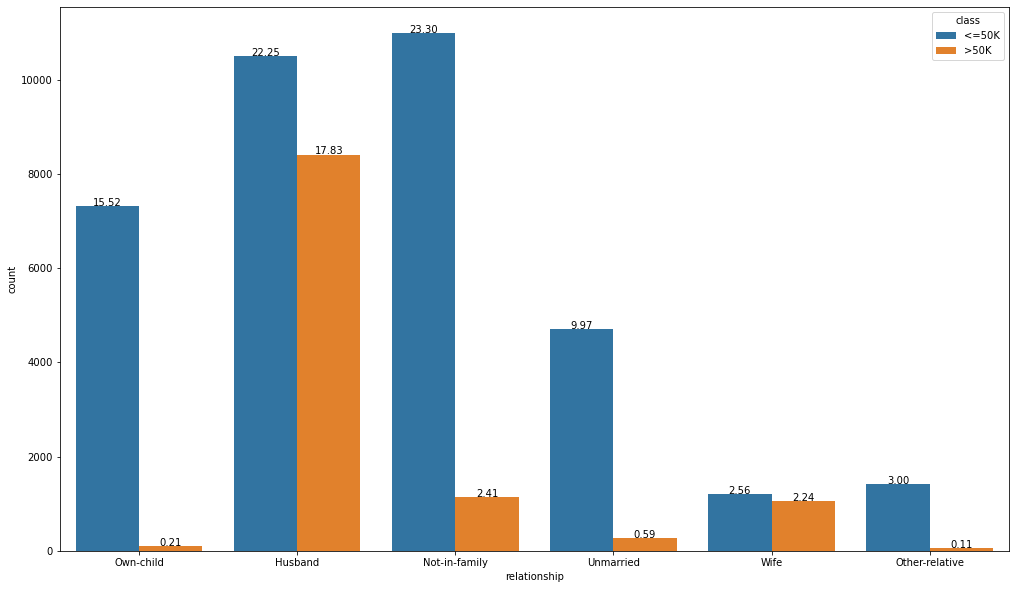

In [195]:
plt.figure(figsize=(17,10))
total = float(len(df))

ax = sns.countplot(x="relationship", hue="class", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### Description about plot
This countplot explain following things:

- husbands has the highest percentage(18.11%) of earning more than 50k in all the other categories.
- One thing to notice is that "not-in-family" has highest percentage(23.15%) to earn less than 50k but they had nearly same percentage(2.61%) as of the "wife"(2.24%) category. This comparsion is done due to fact that "wife" category has only 2.53% to fall under the income group 0.
- "own-child" and "other-relative" has the minimum percentage to fall under the income group 1 i.e. 0.23% and 0.11% respectively.
- There is huge difference between the percentage of fall either groups except for "husband" and "wife".

##### Hypothesis test (to test the relationship between income & relationship)
Here, In this example

- H0(Null Hypothesis) : Both the relationship and income variables are independent to each other.
- H1(Alternate Hypothesis) : There is a dependent to each other.

In [196]:
# contingency table
c_t = pd.crosstab(df['relationship'].sample(frac=0.002, replace=True, random_state=1),df['class'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

class           <=50K  >50K
relationship               
Husband            21    18
Not-in-family      15     3
Other-relative      1     0
Own-child          21     0
Unmarried          11     1
Wife                3     0

In [197]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
[[29.87234043  9.12765957]
 [13.78723404  4.21276596]
 [ 0.76595745  0.23404255]
 [16.08510638  4.91489362]
 [ 9.19148936  2.80851064]
 [ 2.29787234  0.70212766]]
probability=0.950, critical=11.070, stat=20.874
Dependent (reject H0)


#### Final conclusion
With the help of Chi-Squared test,

- As we have rejected the H0, that there are independent to each other..
- We can conclude that is some dependency of "relationship" attribute on the target variable "income"

# Race AND Sex

In [198]:
ax=pd.crosstab(index=df_cat['race'], columns= df_cat['sex'])
ax

sex                 Female   Male
race                             
Amer-Indian-Eskimo     181    276
Asian-Pac-Islander     506    961
Black                 2232   2234
Other                  154    245
White                12701  27687

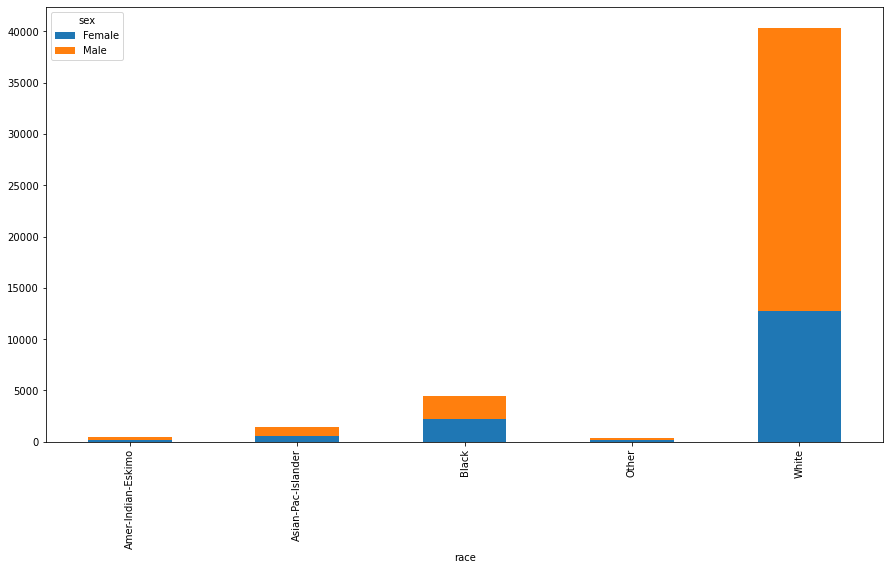

In [199]:
ax.plot.bar(stacked=True);

### Inference:
- Male white People who are the highest in number.
- Black people sex ratio is balanced.

# Race AND Native-country

In [200]:
ax=pd.crosstab(index=df_cat['race'], columns= df_cat['native-country'])
ax

native-country      Cambodia  Canada  China  Columbia  Cuba  \
race                                                          
Amer-Indian-Eskimo         0       0      0         1     0   
Asian-Pac-Islander        24       0    116         0     0   
Black                      2       0      0         0     5   
Other                      0       2      0         9     3   
White                      2     176      3        71   128   

native-country      Dominican-Republic  Ecuador  El-Salvador  England  France  \
race                                                                            
Amer-Indian-Eskimo                   0        0            0        0       0   
Asian-Pac-Islander                   1        0            0        2       1   
Black                               17        1            1       11       1   
Other                               20       12            8        1       1   
White                               62       31          137      109      33   

native-country      Germany  Greece  Guatemala  Haiti  Holand-Netherlands  \
race                                                                        
Amer-Indian-Eskimo        1       0          0      0                   0   
Asian-Pac-Islander        4       1          1      1                   0   
Black                    11       0          0     72                   0   
Other                     1       0          8      0                   0   
White                   187      44         75      2                   1   

native-country      Honduras  Hong  Hungary  India  Iran  Ireland  Italy  \
race                                                                       
Amer-Indian-Eskimo         0     1        0      0     0        0      0   
Asian-Pac-Islander         0    25        0    121     9        1      0   
Black                      3     0        0      2     0        0      0   
Other                      1     0        0      7     6        0      0   
White                     16     4       18     15    43       36    101   

native-country      Jamaica  Japan  Laos  Mexico  Nicaragua  \
race                                                          
Amer-Indian-Eskimo        0      0     0      11          0   
Asian-Pac-Islander        0     49    23       1          1   
Black                    97      4     0       5          2   
Other                     3      3     0      62          4   
White                     5     30     0     834         37   

native-country      Outlying-US(Guam-USVI-etc)  Peru  Philippines  Poland  \
race                                                                        
Amer-Indian-Eskimo                           0     0            1       0   
Asian-Pac-Islander                           3     0          269       2   
Black                                        8     0            1       0   
Other                                        0     3            0       0   
White                                       12    40           13      83   

native-country      Portugal  Puerto-Rico  Scotland  South  Taiwan  Thailand  \
race                                                                           
Amer-Indian-Eskimo         0            1         0      2       0         0   
Asian-Pac-Islander         1            1         0    104      58        23   
Black                      0           12         1      0       0         1   
Other                      1           30         0      1       1         0   
White                     63          136        20      1       3         4   

native-country      Trinadad&Tobago  United-States  Vietnam  Yugoslavia  
race                                                                     
Amer-Indian-Eskimo                0            439        0           0  
Asian-Pac-Islander                4            417       82           0  
Black                            20           4067        0           0  
Othe

### Inference 
- According to the crosstab more white people are in united-states.
- According to the corsstab other people are less in united-states.
- According to the corsstab Amer-Indian-Eskimo are less in every native country.

# Race AND class

In [201]:
ax=pd.crosstab(index=df_cat['race'], columns= df_cat['class'])
ax

class               <=50K   >50K
race                            
Amer-Indian-Eskimo    404     53
Asian-Pac-Islander   1084    383
Black                3948    518
Other                 353     46
White               30354  10034

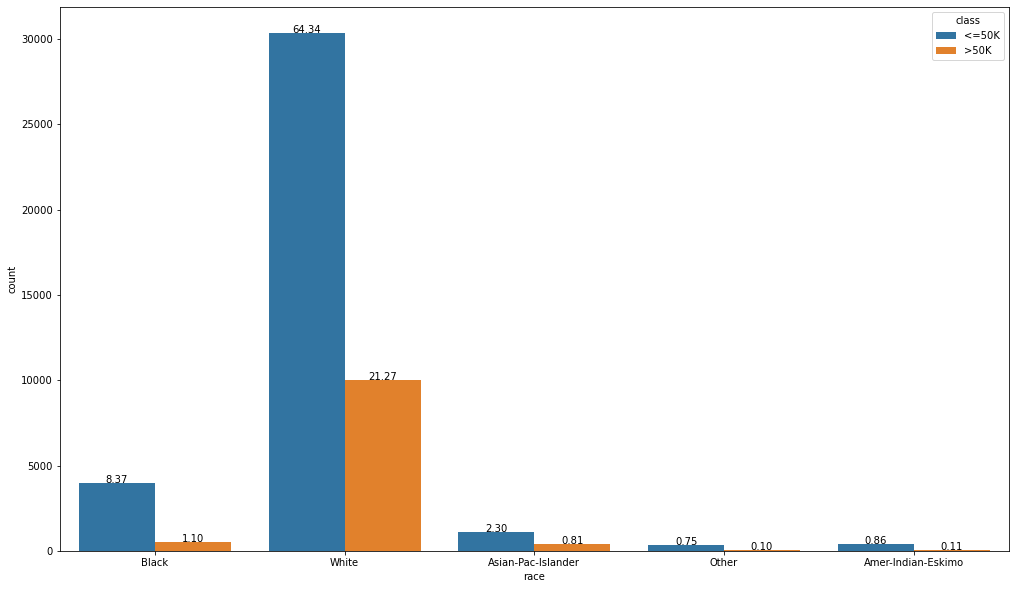

In [202]:
plt.figure(figsize=(17,10))
total = float(len(df) )

ax = sns.countplot(x="race", hue="class", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### Inference:
- Description about plot
- This countplot explain following things:

- The relationship of "white" race with "income" can easily guess based on previous summary statistics.
- There is huge difference between the percentage of fall either groups for each "race" except for the "other"(.63%) and "amer-indian-eskimo"(.74%) but this could be due the lesser number of observations for those categories.

#### Hypothesis test (to test the relationship between income & race)
Here, In this example

- H0(Null Hypothesis) : There is no relationship between race and income.
- H1(Alternate Hypothesis) : There is a relationship between race and income.

In [203]:
# contingency table
c_t = pd.crosstab(df['race'].sample(frac=0.002, replace=True, random_state=1),df['class'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

class               <=50K  >50K
race                           
Asian-Pac-Islander      5     0
Black                   5     2
Other                   2     0
White                  60    20

In [204]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=3
p_value 0.501730316713183
[[ 3.82978723  1.17021277]
 [ 5.36170213  1.63829787]
 [ 1.53191489  0.46808511]
 [61.27659574 18.72340426]]
probability=0.950, critical=7.815, stat=2.357
Independent (fail to reject H0)


#### - Final conclusion
With the help of Chi-Squared test,

- As we have accept the H0, that there is no relationship between these two categorical variable.
- We can conclude that is no dependency of "race" attribute on the target variable "income"

# Sex AND Native-country

In [205]:
ax=pd.crosstab(index=df_cat['sex'], columns= df_cat['native-country'])
ax

native-country  Cambodia  Canada  China  Columbia  Cuba  Dominican-Republic  \
sex                                                                           
Female                 6      61     32        30    50                  47   
Male                  22     117     87        51    86                  53   

native-country  Ecuador  El-Salvador  England  France  Germany  Greece  \
sex                                                                      
Female               16           51       42      14       86       8   
Male                 28           95       81      22      118      37   

native-country  Guatemala  Haiti  Holand-Netherlands  Honduras  Hong  Hungary  \
sex                                                                             
Female                 25     31                   1        11    11        6   
Male                   59     44                   0         9    19       12   

native-country  India  Iran  Ireland  Italy  Jamaica  Japan  Laos  Mexico  \
sex                                                                         
Female             17    12        9     27       57     30     9     213   
Male              128    46       28     74       48     56    14     700   

native-country  Nicaragua  Outlying-US(Guam-USVI-etc)  Peru  Philippines  \
sex                                                                        
Female                 21                           9    16          115   
Male                   23                          14    27          169   

native-country  Poland  Portugal  Puerto-Rico  Scotland  South  Taiwan  \
sex                                                                      
Female              24        14           73         8     44      18   
Male                61        51          107        13     64      44   

native-country  Thailand  Trinadad&Tobago  United-States  Vietnam  Yugoslavia  
sex                                                                            
Female                13               13          14231       30           5  
Male                  15               13          28116       54          17

### Inference:
- According to the corsstab there are more male present in every native-country .
- More female and male are present in united-states.

# Sex AND class

In [206]:
ax=pd.crosstab(index=df_cat['sex'], columns= df_cat['class'])
ax

class   <=50K  >50K
sex                
Female  14099  1675
Male    22044  9359

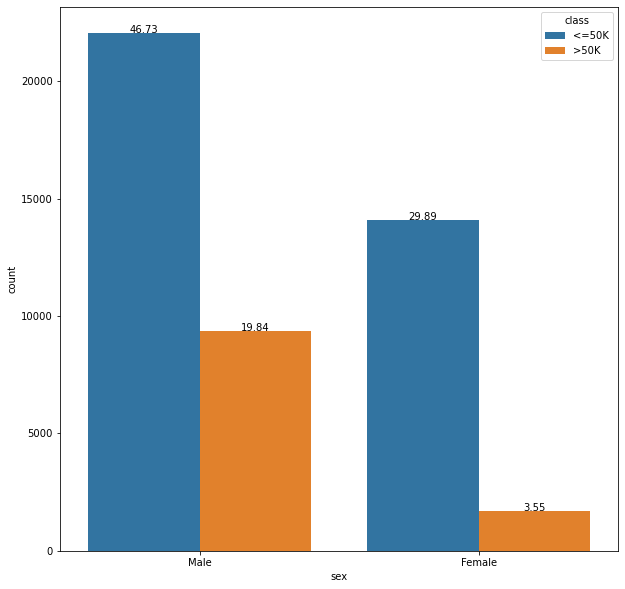

In [207]:
plt.figure(figsize=(10,10))
total = float(len(df) )

ax = sns.countplot(x="sex", hue="class", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### Inference:
- Description about plot
This countplot explain following things:

- For "female" earning more than 50k is rare with only 3.62% of all observations.
- But for male, 20.31% of all people earn more than 50k .

#### Hypothesis test (to test the relationship between income & gender)
Here, In this example

- H0(Null Hypothesis) : There is no relationship between gender and income.
- H1(Alternate Hypothesis) : There is a relationship between gender and income.

In [208]:
# contingency table
c_t = pd.crosstab(df['sex'].sample(frac=0.005, replace=True, random_state=1),df['class'].sample(frac=0.005, replace=True, random_state=1),margins = False) 
c_t

class   <=50K  >50K
sex                
Female     74     4
Male      111    47

In [209]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
p_value 3.2630030626478076e-05
[[ 61.1440678  16.8559322]
 [123.8559322  34.1440678]]
probability=0.950, critical=3.841, stat=17.258
Dependent (reject H0)


#### -Final conclusion
With the help of Chi-Squared test,

- As we have rejected the H0, that there is no relationship between these two categorical variable.
- We can conclude that is some dependency of "gender" attribute on the target variable "income"

# Native-country AND class

In [210]:
ax=pd.crosstab(index=df_cat['native-country'], columns= df_cat['class'])
ax

class                       <=50K   >50K
native-country                          
Cambodia                       19      9
Canada                        117     61
China                          85     34
Columbia                       78      3
Cuba                          102     34
Dominican-Republic             96      4
Ecuador                        39      5
El-Salvador                   135     11
England                        78     45
France                         21     15
Germany                       148     56
Greece                         29     16
Guatemala                      81      3
Haiti                          66      9
Holand-Netherlands              1      0
Honduras                       18      2
Hong                           22      8
Hungary                        12      6
India                          87     58
Iran                           37     21
Ireland                        26     11
Italy                          68     33
Jamaica                        90     15
Japan                          58     28
Laos                           21      2
Mexico                        871     42
Nicaragua                      41      3
Outlying-US(Guam-USVI-etc)     22      1
Peru                           40      3
Philippines                   205     79
Poland                         68     17
Portugal                       53     12
Puerto-Rico                   160     20
Scotland                       18      3
South                          89     19
Taiwan                         38     24
Thailand                       23      5
Trinadad&Tobago                24      2
United-States               32249  10098
Vietnam                        77      7
Yugoslavia                     14      8

### Inference:
- According to the crosstab more people are working and earing more than 50k and even earing less than 50k.
- According to the crosstab less people are are there in both the category.

#### Hypothesis test (to test the relationship between income & native-country)
Here, In this example

- H0(Null Hypothesis) : There is no relationship between native-country and income.
- H1(Alternate Hypothesis) : There is a relationship between native-country and income.

In [211]:
# contingency table
c_t = pd.crosstab(df['native-country'].sample(frac=0.005, replace=True, random_state=1),df['class'].sample(frac=0.005, replace=True, random_state=1),margins = False)
c_t

class                       <=50K  >50K
native-country                         
Dominican-Republic              1     0
El-Salvador                     1     0
Guatemala                       1     0
Haiti                           1     0
Honduras                        1     0
Hong                            1     0
Jamaica                         1     0
Mexico                          4     0
Outlying-US(Guam-USVI-etc)      1     0
Philippines                     1     0
Portugal                        2     0
United-States                 169    50

In [212]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=11
p_value 0.9583496357821112
[[  0.78632479   0.21367521]
 [  0.78632479   0.21367521]
 [  0.78632479   0.21367521]
 [  0.78632479   0.21367521]
 [  0.78632479   0.21367521]
 [  0.78632479   0.21367521]
 [  0.78632479   0.21367521]
 [  3.14529915   0.85470085]
 [  0.78632479   0.21367521]
 [  0.78632479   0.21367521]
 [  1.57264957   0.42735043]
 [172.20512821  46.79487179]]
probability=0.950, critical=19.675, stat=4.355
Independent (fail to reject H0)


#### Final conclusion
With the help of Chi-Squared test,

- As we have accept the H0, that there is no relationship between these two categorical variable.
- We can conclude that is no dependency of "native-country" attribute on the target variable "income"


# Multivariate Analysis:

In [213]:
df_num.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [214]:
df_cat.columns

Index(['workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')

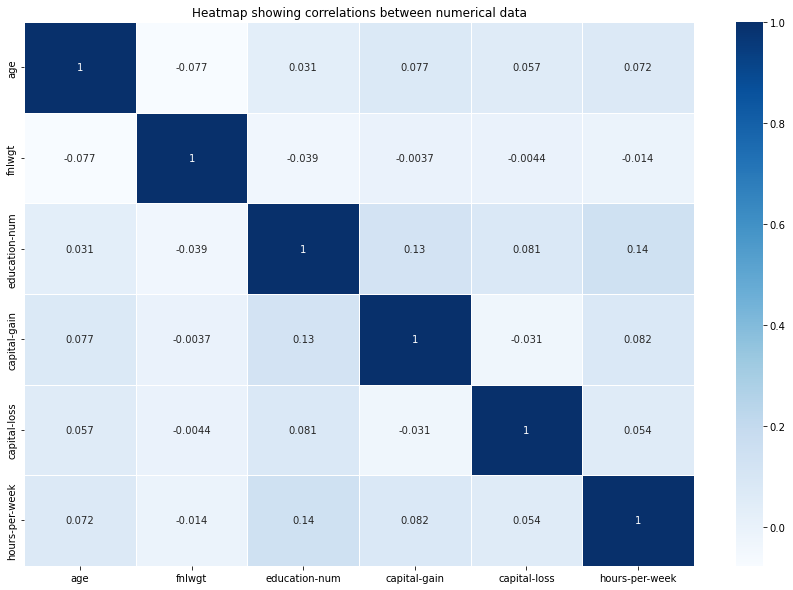

In [215]:
plt.figure(figsize=(15,10))  
sns.heatmap(df_num.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

- There is no strong correlation among the numeric attributes.
- There is neither strong positive nor strong negative correlation present in any variable .
- The strongest correlation is present between capital gain and hours-per-week with Coefficient .082.(which is less than 0.1, it means that very small correlation among them).

##### Multivariate Analysis between "class", "hours-per-week", "gender"

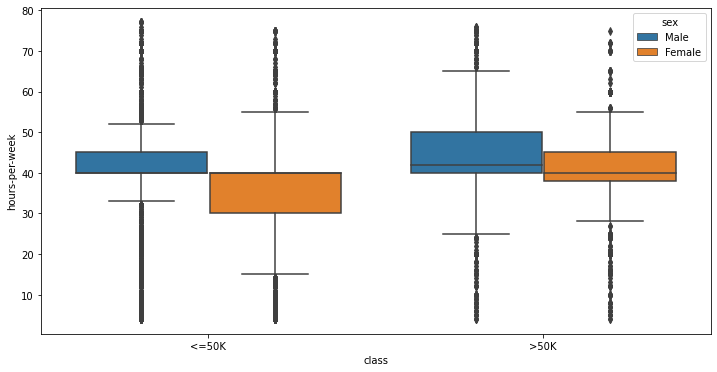

In [216]:
plt.figure(figsize=(12,6))
sns.boxplot(x='class',y ='hours-per-week', hue='sex',data=df)
plt.show()

- The median "hours-per-week" for females is lower than the males in the Income group who earns <=50k.

- Boxplot range for Income group who earns <=50k Male ~[32,52] Female ~[17,57].
##### Interpretation:
-Females have more flexible working hours per week in the income groups who earns <=50k



- Boxplot range for Income group who earns >50k  Male ~[23,63] Female ~[30,57].
##### Interpretation:
- Males have more flexible working hours per week in the income groups who earns >50k


 #### Multivariate analysis between "income", "age", "gender"¶

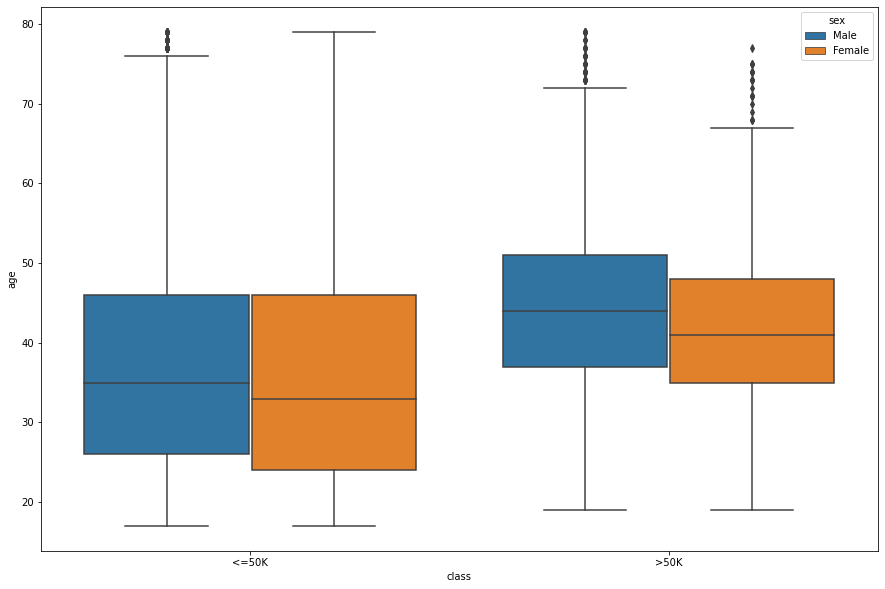

In [217]:
plt.figure(figsize=(15,10))
sns.boxplot(x="class", y="age",hue="sex",data=df)
plt.show()

##### Interpretation:
Multivariate analysis between "income", "age", "gender" shows that:

- Median "age" of Females who earn less than 50k has very minute difference than the Median "age" of males who earn less than 50k.
- But the Median "age" of Females who earn greater than 50k has age difference of 2-3years than the Median "age" of males who earn greater than 50k.


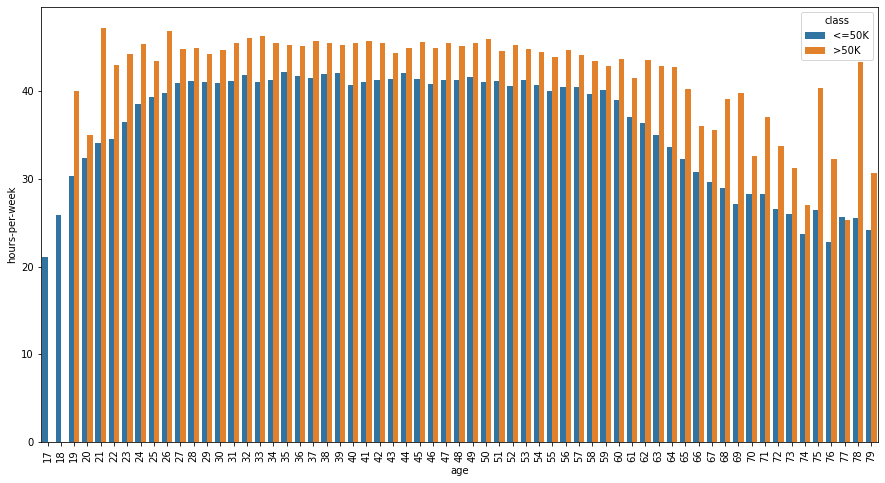

In [218]:
sns.barplot(df['age'],df['hours-per-week'],hue =df["class"],ci=0)
plt.xticks(rotation=90)
plt.show()

**Inferences:**
- Extreme values observed as age and the hours per week increase.
- There is no much corelation observed.

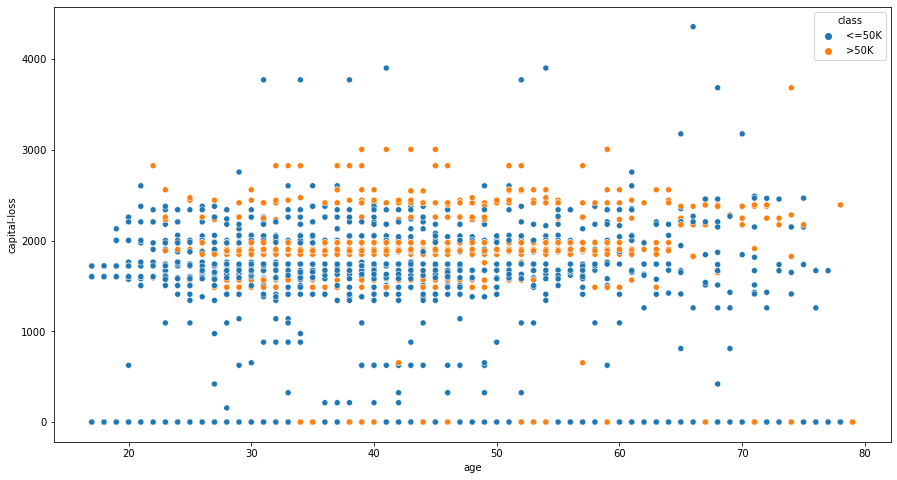

In [219]:
# Scatter plot analysis:
# Age, capital.loss based on class:

sns.scatterplot(data=df, x="age",y ="capital-loss",hue="class")
plt.show()

**Inferences:**
- Extreme values observed as age and capital loss increase.
- There are data points scattered bwteen the range of 1000 and 3000 approx.
- There is corelation observed between the class within the range of 1000 to 3000.

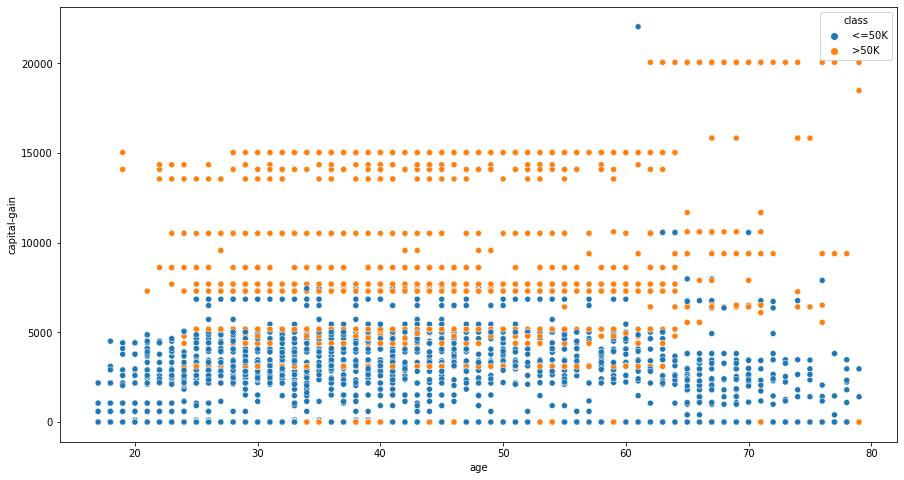

In [220]:
# Scatter plot analysis:
# Age, capital.gain based on class:

sns.scatterplot(data=df, x="age",y ="capital-gain",hue="class")
plt.show()

**Inferences:**
- Extreme values observed as age and capital.gain increase.
- Between age 28 and 64 capital gain is upto 15000 and after that it decreases and again increments at age 90
- There are no data points observed bwteen the range of 40000 and 95000 approx.
- There is no much corelation observed between the class.

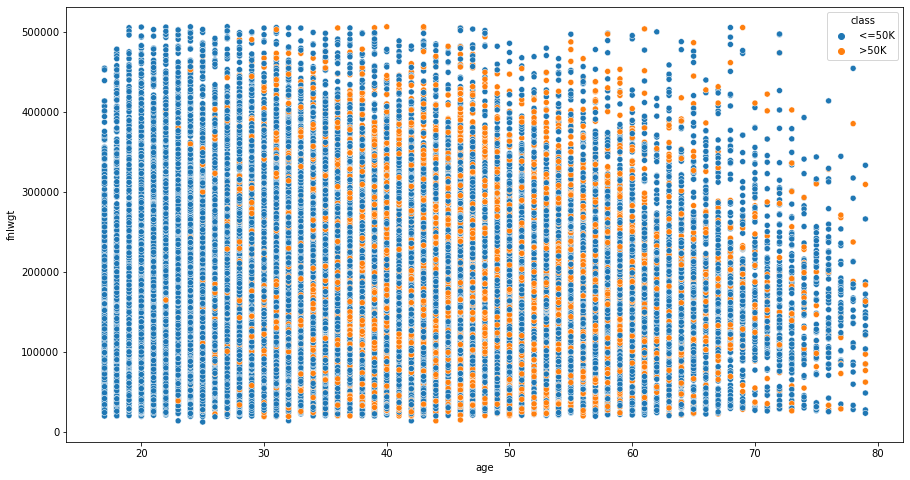

In [221]:
# Scatter plot analysis:
# Age, fnlwgt based on class:

sns.scatterplot(data=df, x="age",y ="fnlwgt",hue="class")
plt.show()

**Inferences:**
- Certain Extreme values observed as age and fnlwgt increase.
- There is corelation observed between the class within the range of 200000 to 600000.

In [222]:
cols = ['workclass','occupation']
cat_col = df.dtypes[df.dtypes == 'object']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(df[df['age'] == 90][col].value_counts())
    else:
        continue

=======================================workclass=========================
Series([], Name: workclass, dtype: int64)
=======================================occupation=========================
Series([], Name: occupation, dtype: int64)


#### Intrepretation:
At age 90 people can't work in goverment or private sectors. But there are some observations present in our dataset which shows that despite the age of 90 years they work in those sectors.

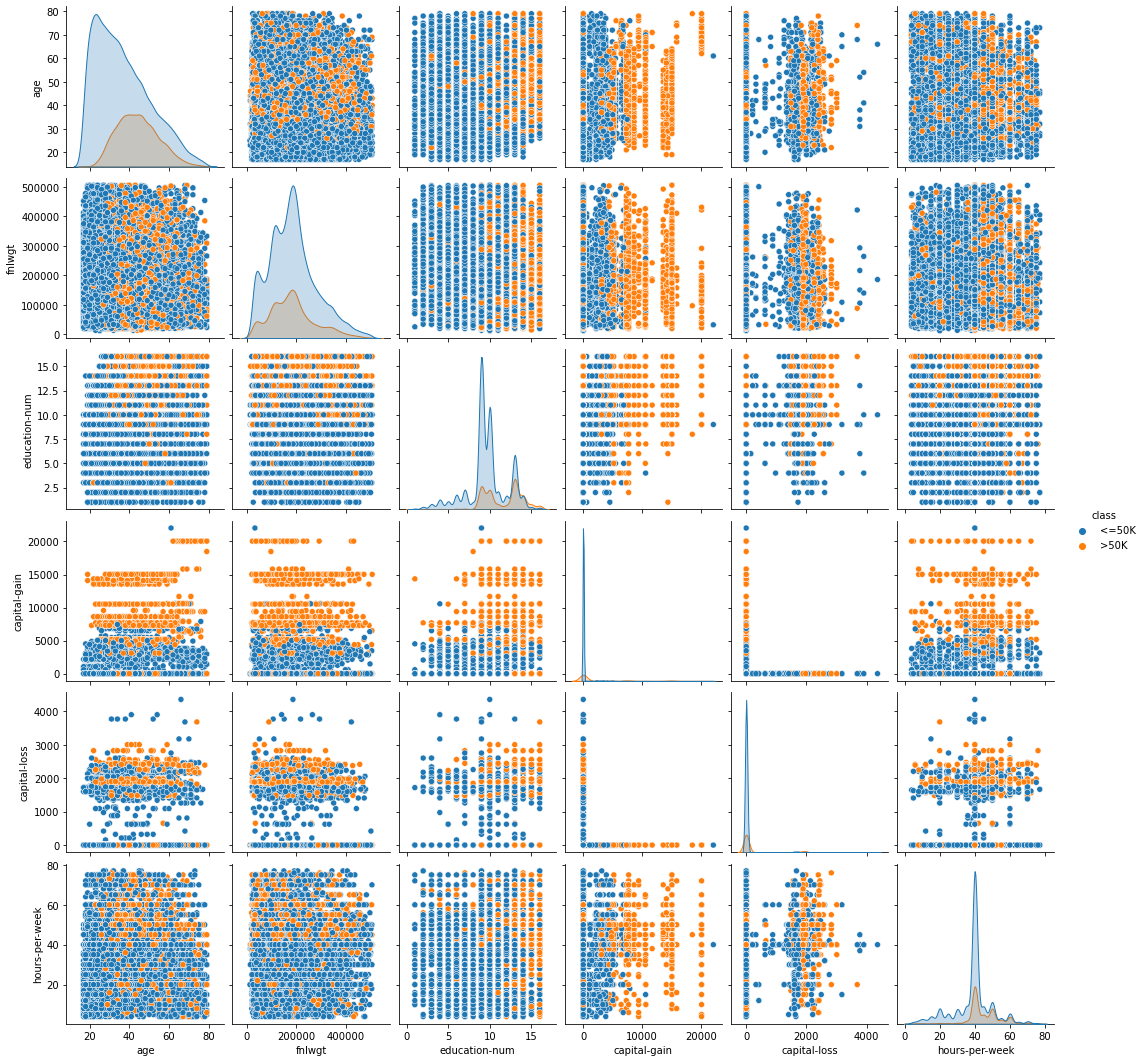

In [223]:
# Pair Plot analysis:
sns.pairplot(df,hue='class')
plt.show()

**Inferences:**
- The pair plot is done to visualize the relationship between the Numeric variables.
- It is observed that age and fnlwgt is highly scattered and correlated.
- it is also seen the age and capital.loss is also correlated.

#### Making new variable(capital_change)

In [224]:
df["capital_change"] = df["capital-gain"] - df["capital-loss"]
df["capital_change"].describe()

count   47177.000000
mean      442.222057
std      2298.442641
min     -4356.000000
25%         0.000000
50%         0.000000
75%         0.000000
max     22040.000000
Name: capital_change, dtype: float64

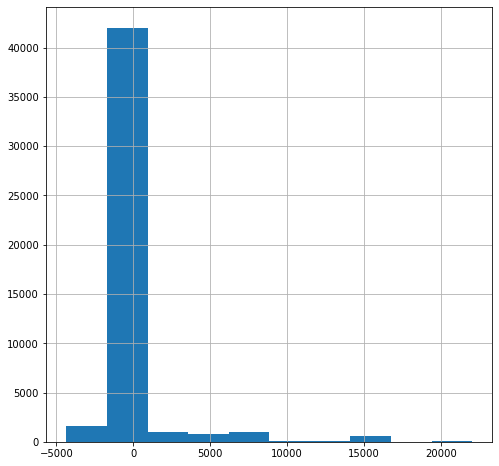

In [225]:
df["capital_change"].hist(figsize=(8,8))
plt.show()

 ### Conclusion of Complete EDA

- Feature Removal
 - 1. Education num and education are giving similar information.
 - 2. Using capital-gain and capital loss , we can make new variable called capital-change.


###### - Other Colclusion:
1. This dataset not balance , i.e. 76% of them are belong to income group 1 (who earns more than 50k) and 23.93% fall under the income group 0 (who earns less than 50k).

2. Females have more flexible working hours per week in the income groups who earns <=50k.

3. Males have more flexible working hours per week in the income groups who earns >50k.

4. The Median "age" of Females who earn greater than 50k has age difference of 2-3years(lower) than the Median "age" of males who earn greater than 50k.

5. Generally people can be seen working for 30 hours to 40 hours per week. 

6. Income group who earns >50k have flexible working hours.

7. For "female" earning more than 50k is rare with only 3.62% of all observations.
   But for male, 20.31% of all people earn more than 50k .

8. self-emp-inc workclass is only where more people earn >50k(belong to income group 1).

9. People having degree doctorate,prof-school,masters are making salary more than 50K(it can be concluded that higher education means more salary).


## BASE MODEL

In [226]:
df.head()

age  workclass  fnlwgt     education education-num      marital-status  \
0   25    Private  226802          11th             7       Never-married   
1   38    Private   89814       HS-grad             9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm            12  Married-civ-spouse   
3   44    Private  160323  Some-college            10  Married-civ-spouse   
4   18        NaN  103497  Some-college            10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  class  capital_change  
0              40  United-States  <=50K               0  
1              50  United-States  <=50K               0  
2              40  United-States   >50K               0  
3              40  United-States   >50K            7688  
4              30  United-States  <=50K               0

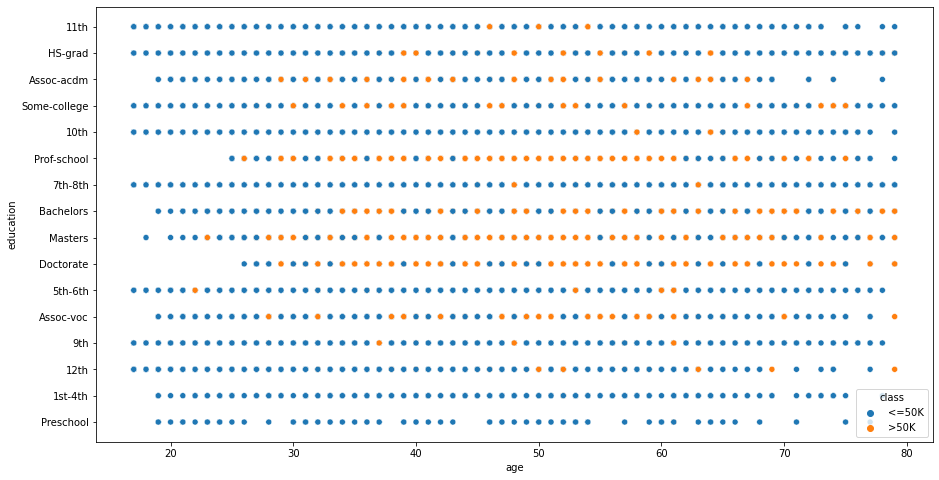

In [227]:
# Checking the highly co-relleated attribute with the target variable.
sns.scatterplot(data=df,x='age',y='education',hue='class');

In [228]:
# checking the target column if its imbalanced or not.
df['class'].value_counts()

<=50K    36143
>50K     11034
Name: class, dtype: int64

## Inference
- The target variable class is imblanced.

## Feature engineering

In [229]:
# Changing the target column to binary values.
df['class']=df['class'].apply(lambda x:1 if x=='>50K' else 0)

In [230]:
df['class'].value_counts()

0    36143
1    11034
Name: class, dtype: int64

## Missing value treatment 

In [231]:
df.isnull().sum()

age                  0
workclass         2633
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2643
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     819
class                0
capital_change       0
dtype: int64

In [232]:
df['workclass'].replace(np.nan,'Unknown',inplace=True)

In [233]:
df['occupation'].replace(np.nan,'Unknown',inplace=True)

In [234]:
df['native-country'].replace(np.nan,'Unknown',inplace=True)

In [235]:
df.head()

age  workclass  fnlwgt     education education-num      marital-status  \
0   25    Private  226802          11th             7       Never-married   
1   38    Private   89814       HS-grad             9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm            12  Married-civ-spouse   
3   44    Private  160323  Some-college            10  Married-civ-spouse   
4   18    Unknown  103497  Some-college            10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4            Unknown    Own-child  White  Female             0             0   

   hours-per-week native-country  class  capital_change  
0              40  United-States      0               0  
1              50  United-States      0               0  
2              40  United-States      1               0  
3              40  United-States      1            7688  
4              30  United-States      0               0

## Dummy encoding 

In [236]:
df_num=df.select_dtypes(include=np.number)

In [237]:
df_num.dtypes

age               int64
fnlwgt            int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
class             int64
capital_change    int64
dtype: object

In [238]:
df_cat=df.select_dtypes(exclude=np.number)

In [239]:
df_cat.dtypes

workclass         object
education         object
education-num     object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
dtype: object

In [240]:
dummy_encoding=pd.get_dummies(data=df_cat,drop_first=True)

In [241]:
df_2=pd.concat([df_num,dummy_encoding],axis=1)

In [242]:
df_2.shape

(47177, 116)

## The Target variable class imbalance.

In [243]:
(df_2['class'].value_counts()/len(df_2))*100

0   76.611484
1   23.388516
Name: class, dtype: float64

## Inference:
- According to the above code of the value counts we can see that there is imblance in the target variable,so we are using the somte technique to reduce the imblance of the data.
- The somte analysis is done only for the train data .

In [244]:
## Splitting the data to X and y

In [245]:
X=df_2.drop('class',axis=1)

In [246]:
y=df_2['class']

## Train - Test - split

In [247]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


In [248]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

## Logistic regression 

In [249]:
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3,stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (33023, 115)
y_train (33023,)
X_test (14154, 115)
y_test (14154,)


In [250]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [251]:
y_pred_test=lr.predict(X_test)
y_pred_train=lr.predict(X_train)
y_pred_test_proba=lr.predict_proba(X_test)[:,1]
y_pred_train_proba=lr.predict_proba(X_train)[:,1]

#### Train Result

In [252]:
print('Accuracy:\n',accuracy_score(y_train,y_pred_train))
print('Classfication Report:\n',classification_report(y_train,y_pred_train))
print('confusion_matrix:\n',confusion_matrix(y_train,y_pred_train))

Accuracy:
 0.796323774339097
Classfication Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88     25299
           1       0.68      0.24      0.36      7724

    accuracy                           0.80     33023
   macro avg       0.74      0.60      0.62     33023
weighted avg       0.78      0.80      0.76     33023

confusion_matrix:
 [[24437   862]
 [ 5864  1860]]


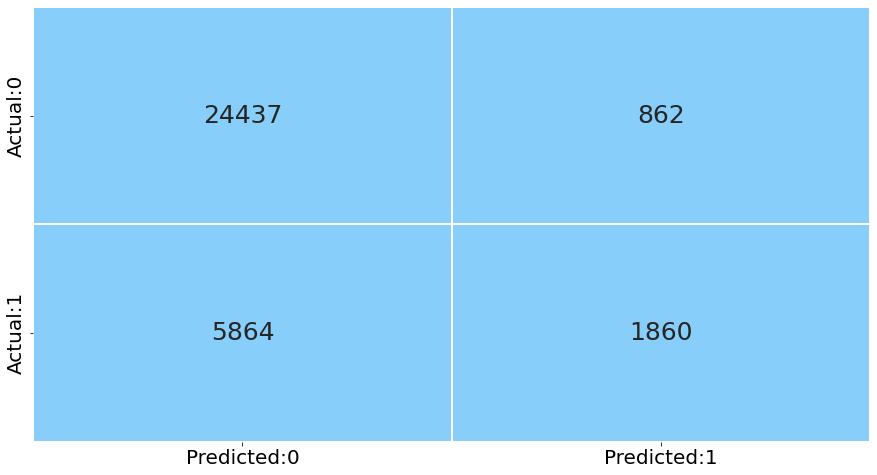

In [253]:
cm = confusion_matrix(y_train, y_pred_train)
from matplotlib.colors import ListedColormap

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)


plt.yticks(fontsize = 20)

plt.show()

In [254]:
score_card_train = pd.DataFrame(columns=['Model_Name', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score', 'f1-score'])


Model = pd.Series({'Model_Name': "Logistic regression_train",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_train, y_pred_train_proba),
                    'Precision Score': metrics.precision_score(y_train, y_pred_train),
                    'Recall Score': metrics.recall_score(y_train, y_pred_train),
                     'Accuracy Score': metrics.accuracy_score(y_train, y_pred_train),
                     'f1-score': metrics.f1_score(y_train, y_pred_train)})

score_card_train = score_card_train.append(Model, ignore_index=True)
score_card_train

Model_Name  AUC Score  Precision Score  Recall Score  \
0  Logistic regression_train        NaN         0.683321      0.240808   

   Accuracy Score  f1-score  Roc-AUC Score  
0        0.796324  0.356117       0.573881

### Test result

In [255]:
print('Accuracy:\n',accuracy_score(y_test,y_pred_test))
print('Classfication Report:\n',classification_report(y_test,y_pred_test))
print('confusion_matrix:\n',confusion_matrix(y_test,y_pred_test))

Accuracy:
 0.7980782817578069
Classfication Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88     10844
           1       0.71      0.23      0.35      3310

    accuracy                           0.80     14154
   macro avg       0.76      0.60      0.62     14154
weighted avg       0.78      0.80      0.76     14154

confusion_matrix:
 [[10520   324]
 [ 2534   776]]


In [256]:
score_card_test = pd.DataFrame(columns=['Model_Name', 'Precision Score', 'Recall Score','Accuracy Score', 'f1-score'])

Model = pd.Series({'Model_Name': "Logistic regression_test",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_test, y_pred_test_proba),
                    'Precision Score': metrics.precision_score(y_test, y_pred_test),
                    'Recall Score': metrics.recall_score(y_test, y_pred_test),
                     'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test),
                     'f1-score': metrics.f1_score(y_test, y_pred_test)})


score_card_test = score_card_test.append(Model, ignore_index=True)
score_card_test

Model_Name  Precision Score  Recall Score  Accuracy Score  \
0  Logistic regression_test         0.705455      0.234441        0.798078   

   f1-score  Roc-AUC Score  
0  0.351927       0.562681

### KNN 

In [257]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

### Train result

In [258]:
y_pred_train_knn=knn.predict(X_train)
y_pred_train_probaknn=knn.predict_proba(X_train)[:,1]

In [259]:
print('ROC-AUC Score = ',roc_auc_score(y_train,y_pred_train_probaknn))
print()
print('Accuracy = ',accuracy_score(y_train,y_pred_train_knn))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_train,y_pred_train_knn))
print()
print('Classification Report = ','\n',classification_report(y_train,y_pred_train_knn))

ROC-AUC Score =  0.8673356787467155

Accuracy =  0.8348423825818369

Confusion Matrix =  
 [[24076  1223]
 [ 4231  3493]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     25299
           1       0.74      0.45      0.56      7724

    accuracy                           0.83     33023
   macro avg       0.80      0.70      0.73     33023
weighted avg       0.82      0.83      0.82     33023



In [260]:
Model = pd.Series({'Model_Name': "K Nearest neighbour train",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_train, y_pred_train_probaknn),
                    'Precision Score': metrics.precision_score(y_train, y_pred_train_knn),
                    'Recall Score': metrics.recall_score(y_train, y_pred_train_knn),
                     'Accuracy Score': metrics.accuracy_score(y_train, y_pred_train_knn),
                     'f1-score': metrics.f1_score(y_train, y_pred_train_knn)})

score_card_train = score_card_train.append(Model, ignore_index=True)
score_card_train

Model_Name  AUC Score  Precision Score  Recall Score  \
0  Logistic regression_train        NaN         0.683321      0.240808   
1  K Nearest neighbour train        NaN         0.740670      0.452227   

   Accuracy Score  f1-score  Roc-AUC Score  
0        0.796324  0.356117       0.573881  
1        0.834842  0.561576       0.867336

### Test result

In [261]:
y_pred_test_knn=knn.predict(X_test)
y_pred_test_probaknn=knn.predict_proba(X_test)[:,1]

In [262]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_test_probaknn))
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_test_knn))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_test_knn))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_test_knn))

ROC-AUC Score =  0.6722407089389653

Accuracy =  0.7751165748198389

Confusion Matrix =  
 [[9948  896]
 [2287 1023]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     10844
           1       0.53      0.31      0.39      3310

    accuracy                           0.78     14154
   macro avg       0.67      0.61      0.63     14154
weighted avg       0.75      0.78      0.75     14154



In [263]:
Model = pd.Series({'Model_Name': "K Nearest neighbour test",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_test, y_pred_test_probaknn),
                    'Precision Score': metrics.precision_score(y_test, y_pred_test_knn),
                    'Recall Score': metrics.recall_score(y_test, y_pred_test_knn),
                     'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test_knn),
                     'f1-score': metrics.f1_score(y_test, y_pred_test_knn)})


score_card_test = score_card_test.append(Model, ignore_index=True)
score_card_test

Model_Name  Precision Score  Recall Score  Accuracy Score  \
0  Logistic regression_test         0.705455      0.234441        0.798078   
1  K Nearest neighbour test         0.533090      0.309063        0.775117   

   f1-score  Roc-AUC Score  
0  0.351927       0.562681  
1  0.391279       0.672241

### Naive Bayes

In [264]:
## As our dataset target varaible is binary class we will use Bernoulli Naive Bayes
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [265]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

In [266]:
y_pred_train_bnb=bnb.predict(X_train)
y_pred_train_probabnb=bnb.predict_proba(X_train)[:,1]

In [267]:
print('ROC-AUC Score = ',roc_auc_score(y_train,y_pred_train_probabnb))
print()
print('Accuracy = ',accuracy_score(y_train,y_pred_train_bnb))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_train,y_pred_train_bnb))
print()
print('Classification Report = ','\n',classification_report(y_train,y_pred_train_bnb))

ROC-AUC Score =  0.8864779541192773

Accuracy =  0.8231535596402507

Confusion Matrix =  
 [[21756  3543]
 [ 2297  5427]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     25299
           1       0.61      0.70      0.65      7724

    accuracy                           0.82     33023
   macro avg       0.75      0.78      0.77     33023
weighted avg       0.83      0.82      0.83     33023



In [268]:
Model = pd.Series({'Model_Name': "Naive base_train",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_train, y_pred_train_probabnb),
                    'Precision Score': metrics.precision_score(y_train, y_pred_train_bnb),
                    'Recall Score': metrics.recall_score(y_train, y_pred_train_bnb),
                     'Accuracy Score': metrics.accuracy_score(y_train, y_pred_train_bnb),
                     'f1-score': metrics.f1_score(y_train, y_pred_train_bnb)})

score_card_train = score_card_train.append(Model, ignore_index=True)
score_card_train

Model_Name  AUC Score  Precision Score  Recall Score  \
0  Logistic regression_train        NaN         0.683321      0.240808   
1  K Nearest neighbour train        NaN         0.740670      0.452227   
2           Naive base_train        NaN         0.605017      0.702615   

   Accuracy Score  f1-score  Roc-AUC Score  
0        0.796324  0.356117       0.573881  
1        0.834842  0.561576       0.867336  
2        0.823154  0.650174       0.886478

In [269]:

y_pred_test_bnb=bnb.predict(X_test)
y_pred_test_probabnb=bnb.predict_proba(X_test)[:,1]

In [270]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_test_probabnb))
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_test_bnb))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_test_bnb))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_test_bnb))

ROC-AUC Score =  0.8836783898205921

Accuracy =  0.8198389147944044

Confusion Matrix =  
 [[9298 1546]
 [1004 2306]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     10844
           1       0.60      0.70      0.64      3310

    accuracy                           0.82     14154
   macro avg       0.75      0.78      0.76     14154
weighted avg       0.83      0.82      0.82     14154



In [271]:

Model = pd.Series({'Model_Name': "Logistic regression_test",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_test,y_pred_test_probabnb),
                    'Precision Score': metrics.precision_score(y_test, y_pred_test_bnb),
                    'Recall Score': metrics.recall_score(y_test, y_pred_test_bnb),
                     'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test_bnb),
                     'f1-score': metrics.f1_score(y_test, y_pred_test_bnb)})


score_card_test = score_card_test.append(Model, ignore_index=True)
score_card_test

Model_Name  Precision Score  Recall Score  Accuracy Score  \
0  Logistic regression_test         0.705455      0.234441        0.798078   
1  K Nearest neighbour test         0.533090      0.309063        0.775117   
2  Logistic regression_test         0.598650      0.696677        0.819839   

   f1-score  Roc-AUC Score  
0  0.351927       0.562681  
1  0.391279       0.672241  
2  0.643954       0.883678

## Base model Decision tress classifier

In [272]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

## Train result

In [273]:
y_pred_train_dt=dt.predict(X_train)
y_pred_train_probadt=dt.predict_proba(X_train)[:,1]

In [274]:
print('ROC-AUC Score = ',roc_auc_score(y_train,y_pred_train_probadt)) 
print()
print('Accuracy = ',accuracy_score(y_train,y_pred_train_dt))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_train,y_pred_train_dt))
print()
print('Classification Report = ','\n',classification_report(y_train,y_pred_train_dt))

ROC-AUC Score =  0.9999999974412704

Accuracy =  0.9999697180752809

Confusion Matrix =  
 [[25299     0]
 [    1  7723]]

Classification Report =  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25299
           1       1.00      1.00      1.00      7724

    accuracy                           1.00     33023
   macro avg       1.00      1.00      1.00     33023
weighted avg       1.00      1.00      1.00     33023



In [275]:
Model = pd.Series({'Model_Name': "Decision tree_train",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_train, y_pred_train_probadt),
                    'Precision Score': metrics.precision_score(y_train, y_pred_train_dt),
                    'Recall Score': metrics.recall_score(y_train, y_pred_train_dt),
                     'Accuracy Score': metrics.accuracy_score(y_train, y_pred_train_dt),
                     'f1-score': metrics.f1_score(y_train, y_pred_train_dt)})

score_card_train = score_card_train.append(Model, ignore_index=True)
score_card_train

Model_Name  AUC Score  Precision Score  Recall Score  \
0  Logistic regression_train        NaN         0.683321      0.240808   
1  K Nearest neighbour train        NaN         0.740670      0.452227   
2           Naive base_train        NaN         0.605017      0.702615   
3        Decision tree_train        NaN         1.000000      0.999871   

   Accuracy Score  f1-score  Roc-AUC Score  
0        0.796324  0.356117       0.573881  
1        0.834842  0.561576       0.867336  
2        0.823154  0.650174       0.886478  
3        0.999970  0.999935       1.000000

## Test result

In [276]:
y_pred_dt=dt.predict(X_test)
y_pred_probadt=dt.predict_proba(X_test)[:,1]

In [277]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_probadt))
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_dt))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_dt))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_dt))

ROC-AUC Score =  0.7437446438979162

Accuracy =  0.8136922424756252

Confusion Matrix =  
 [[9490 1354]
 [1283 2027]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     10844
           1       0.60      0.61      0.61      3310

    accuracy                           0.81     14154
   macro avg       0.74      0.74      0.74     14154
weighted avg       0.82      0.81      0.81     14154



In [278]:

Model = pd.Series({'Model_Name': "Decision tree_test",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_test, y_pred_probadt),
                    'Precision Score': metrics.precision_score(y_test, y_pred_test),
                    'Recall Score': metrics.recall_score(y_test, y_pred_test),
                     'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test),
                     'f1-score': metrics.f1_score(y_test, y_pred_test)})


score_card_test = score_card_test.append(Model, ignore_index=True)
score_card_test

Model_Name  Precision Score  Recall Score  Accuracy Score  \
0  Logistic regression_test         0.705455      0.234441        0.798078   
1  K Nearest neighbour test         0.533090      0.309063        0.775117   
2  Logistic regression_test         0.598650      0.696677        0.819839   
3        Decision tree_test         0.705455      0.234441        0.798078   

   f1-score  Roc-AUC Score  
0  0.351927       0.562681  
1  0.391279       0.672241  
2  0.643954       0.883678  
3  0.351927       0.743745

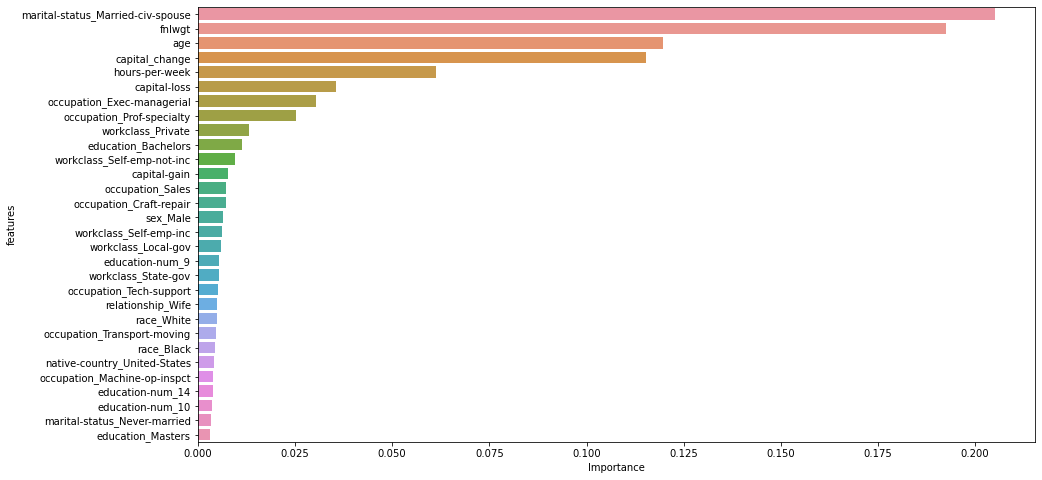

In [279]:
feature_imp=pd.DataFrame({'features':X_train.columns,'Importance':dt.feature_importances_})
feature_imp=feature_imp.sort_values(by='Importance',ascending=False)
sns.barplot(x='Importance',y='features',data=feature_imp.head(30))
plt.show()

## Grid Search

In [280]:
dtc2 = DecisionTreeClassifier() 
params = {'max_depth': range(2,8),
                'criterion': ['gini', 'entropy'], 
                'max_features': range(1,7), 
                'min_samples_split': range(10,20), 
                'min_samples_leaf':range(20,40)
}

In [281]:
import sklearn
rsearch = sklearn.model_selection.RandomizedSearchCV(estimator = dtc2, param_distributions = params, cv = 3, scoring = 'roc_auc')
rsearch.fit(X_train, y_train)
rsearch.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 28,
 'max_features': 5,
 'max_depth': 6,
 'criterion': 'entropy'}

In [282]:
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 8),
                                        'max_features': range(1, 7),
                                        'min_samples_leaf': range(20, 40),
                                        'min_samples_split': range(10, 20)},
                   scoring='roc_auc')

In [283]:
dt2 = DecisionTreeClassifier(**rsearch.best_params_)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=5,
                       min_samples_leaf=36, min_samples_split=19)

## Train result

In [284]:
y_pred_train_dt2=dt2.predict(X_train)
y_pred_train_probadt2=dt2.predict_proba(X_train)[:,1]

In [285]:
print('ROC-AUC Score = ',roc_auc_score(y_train,y_pred_train_probadt2)) 
print()
print('Accuracy = ',accuracy_score(y_train,y_pred_train_dt2))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_train,y_pred_train_dt2))
print()
print('Classification Report = ','\n',classification_report(y_train,y_pred_train_dt2))

ROC-AUC Score =  0.663184023378682

Accuracy =  0.7661024134694001

Confusion Matrix =  
 [[25299     0]
 [ 7724     0]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.77      1.00      0.87     25299
           1       0.00      0.00      0.00      7724

    accuracy                           0.77     33023
   macro avg       0.38      0.50      0.43     33023
weighted avg       0.59      0.77      0.66     33023



In [286]:
Model = pd.Series({'Model_Name': "Decision tree_train with hyperparameter tunning",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_train, y_pred_train_probadt2),
                    'Precision Score': metrics.precision_score(y_train, y_pred_train_dt2),
                    'Recall Score': metrics.recall_score(y_train, y_pred_train_dt2),
                     'Accuracy Score': metrics.accuracy_score(y_train, y_pred_train_dt2),
                     'f1-score': metrics.f1_score(y_train, y_pred_train_dt)})

score_card_train = score_card_train.append(Model, ignore_index=True)
score_card_train

Model_Name  AUC Score  \
0                        Logistic regression_train        NaN   
1                        K Nearest neighbour train        NaN   
2                                 Naive base_train        NaN   
3                              Decision tree_train        NaN   
4  Decision tree_train with hyperparameter tunning        NaN   

   Precision Score  Recall Score  Accuracy Score  f1-score  Roc-AUC Score  
0         0.683321      0.240808        0.796324  0.356117       0.573881  
1         0.740670      0.452227        0.834842  0.561576       0.867336  
2         0.605017      0.702615        0.823154  0.650174       0.886478  
3         1.000000      0.999871        0.999970  0.999935       1.000000  
4         0.000000      0.000000        0.766102  0.999935       0.663184

## Test result

In [287]:
y_pred_dt2=dt2.predict(X_test)
y_pred_probadt2=dt2.predict_proba(X_test)[:,1]

In [288]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_probadt2))
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_dt2))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_dt2))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_dt2))

ROC-AUC Score =  0.6565402673008365

Accuracy =  0.7661438462625406

Confusion Matrix =  
 [[10844     0]
 [ 3310     0]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.77      1.00      0.87     10844
           1       0.00      0.00      0.00      3310

    accuracy                           0.77     14154
   macro avg       0.38      0.50      0.43     14154
weighted avg       0.59      0.77      0.66     14154



In [289]:
Model = pd.Series({'Model_Name': "Decision tree_test with tunning",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_test,y_pred_probadt2 ),
                    'Precision Score': metrics.precision_score(y_test, y_pred_dt2),
                    'Recall Score': metrics.recall_score(y_test, y_pred_dt2),
                     'Accuracy Score': metrics.accuracy_score(y_test, y_pred_dt2),
                     'f1-score': metrics.f1_score(y_test, y_pred_dt2)})


score_card_test = score_card_test.append(Model, ignore_index=True)
score_card_test

Model_Name  Precision Score  Recall Score  \
0         Logistic regression_test         0.705455      0.234441   
1         K Nearest neighbour test         0.533090      0.309063   
2         Logistic regression_test         0.598650      0.696677   
3               Decision tree_test         0.705455      0.234441   
4  Decision tree_test with tunning         0.000000      0.000000   

   Accuracy Score  f1-score  Roc-AUC Score  
0        0.798078  0.351927       0.562681  
1        0.775117  0.391279       0.672241  
2        0.819839  0.643954       0.883678  
3        0.798078  0.351927       0.743745  
4        0.766144  0.000000       0.656540

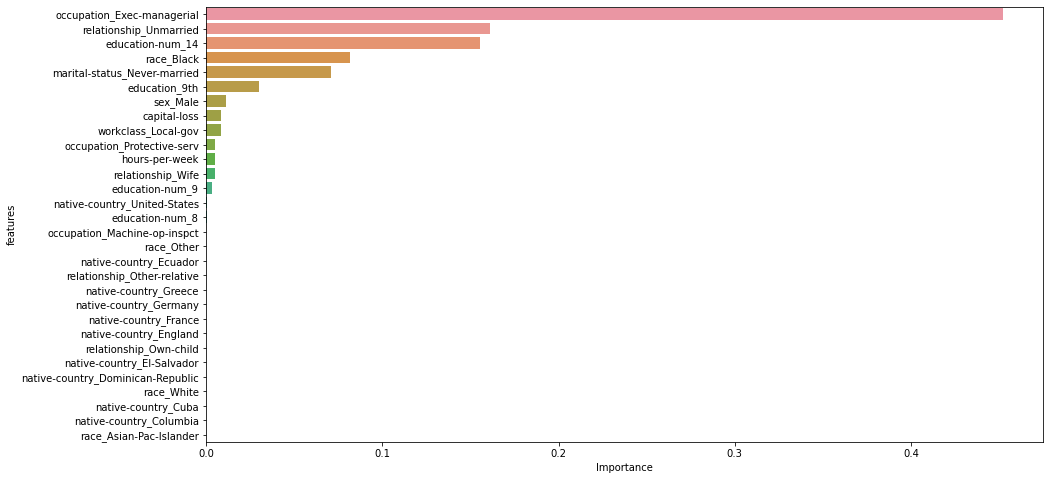

In [290]:
feature_imp=pd.DataFrame({'features':X_train.columns,'Importance':dt2.feature_importances_})
feature_imp=feature_imp.sort_values(by='Importance',ascending=False)
sns.barplot(x='Importance',y='features',data=feature_imp.head(30))
plt.show()

## Feature selection statical test

In [291]:
for i in df.select_dtypes(include='object'):
    if i != 'class':
        a=pd.crosstab(df['class'],df[i])
        stats,p,dof,exp_val=chi2_contingency(observed=a,correction=False)
        if p < 0.05:
            print(f'The variable {i} and class are dependent')
        else:
            print(f'The variable {i} and class are independent')

The variable workclass and class are dependent
The variable education and class are dependent
The variable education-num and class are dependent
The variable marital-status and class are dependent
The variable occupation and class are dependent
The variable relationship and class are dependent
The variable race and class are dependent
The variable sex and class are dependent
The variable native-country and class are dependent


## Inference:
- According to the statically test we cant drop any categorical colummn 

## Kruskal-wallis H test

In [292]:
df_0=df_num[df_num['class']==0]
df_1=df_num[df_num['class']==1]

In [293]:
df_0.drop('class',axis=1,inplace=True)
df_1.drop('class',axis=1,inplace=True)


In [294]:
df_0.dtypes

age               int64
fnlwgt            int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
capital_change    int64
dtype: object

In [295]:
df_0['age']=df_0['age'].astype('float64')
df_0['fnlwgt']=df_0['fnlwgt'].astype('float64')
df_0['capital-gain']=df_0['capital-gain'].astype('float64')
df_0['capital-loss']=df_0['capital-loss'].astype('float64')
df_0['hours-per-week']=df_0['hours-per-week'].astype('float64')
df_0['capital_change']=df_0['capital_change'].astype('float64')

In [296]:
df_1.head()

age  fnlwgt  capital-gain  capital-loss  hours-per-week  capital_change
2    28  336951             0             0              40               0
3    44  160323          7688             0              40            7688
7    63  104626          3103             0              32            3103
10   65  184454          6418             0              40            6418
14   48  279724          3103             0              48            3103

In [297]:
df_1['age']=df_1['age'].astype('float64')
df_1['fnlwgt']=df_1['fnlwgt'].astype('float64')
df_1['capital-gain']=df_1['capital-gain'].astype('float64')
df_1['capital-loss']=df_1['capital-loss'].astype('float64')
df_1['hours-per-week']=df_1['hours-per-week'].astype('float64')
df_1['capital_change']=df_1['capital_change'].astype('float64')

In [298]:
df_1.dtypes


age               float64
fnlwgt            float64
capital-gain      float64
capital-loss      float64
hours-per-week    float64
capital_change    float64
dtype: object

## Kruskal-wallis test 
- p_value < = alpha(0.05) reject H0,different distribution 
- p_value > alpha(0.05) fail to reject H0 ,same distribution 

In [299]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal
seed(1)

for var in df_num:
    stats,p_value=stats.kruskal(df_1[var],df_0[var])
    print('{}: {}:'.format(var,p_value))

## Random forest classifier

In [300]:
rf= RandomForestClassifier(oob_score=True,random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(oob_score=True, random_state=10)

In [301]:
y_pred_rf=rf.predict(X_train)
y_pred_probarf=rf.predict_proba(X_train)[:,1]

## Train result 

In [302]:
print('ROC-AUC Score = ',roc_auc_score(y_train,y_pred_probarf)) 
print()
print('Accuracy = ',accuracy_score(y_train,y_pred_rf))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_train,y_pred_rf))
print()
print('Classification Report = ','\n',classification_report(y_train,y_pred_rf))

ROC-AUC Score =  0.9999999641777864

Accuracy =  0.9998788723011235

Confusion Matrix =  
 [[25299     0]
 [    4  7720]]

Classification Report =  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25299
           1       1.00      1.00      1.00      7724

    accuracy                           1.00     33023
   macro avg       1.00      1.00      1.00     33023
weighted avg       1.00      1.00      1.00     33023



In [303]:
Model = pd.Series({'Model_Name': "Random forest classifier_train",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_train, y_pred_probarf),
                    'Precision Score': metrics.precision_score(y_train, y_pred_rf),
                    'Recall Score': metrics.recall_score(y_train, y_pred_rf),
                     'Accuracy Score': metrics.accuracy_score(y_train, y_pred_rf),
                     'f1-score': metrics.f1_score(y_train, y_pred_rf)})

score_card_train = score_card_train.append(Model, ignore_index=True)
score_card_train

Model_Name  AUC Score  \
0                        Logistic regression_train        NaN   
1                        K Nearest neighbour train        NaN   
2                                 Naive base_train        NaN   
3                              Decision tree_train        NaN   
4  Decision tree_train with hyperparameter tunning        NaN   
5                   Random forest classifier_train        NaN   

   Precision Score  Recall Score  Accuracy Score  f1-score  Roc-AUC Score  
0         0.683321      0.240808        0.796324  0.356117       0.573881  
1         0.740670      0.452227        0.834842  0.561576       0.867336  
2         0.605017      0.702615        0.823154  0.650174       0.886478  
3         1.000000      0.999871        0.999970  0.999935       1.000000  
4         0.000000      0.000000        0.766102  0.999935       0.663184  
5         1.000000      0.999482        0.999879  0.999741       1.000000

## Test result

In [304]:
y_pred_test_rf=rf.predict(X_test) 
y_pred_test_probarf=rf.predict_proba(X_test)[:,1]

In [305]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_test_probarf)) 
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_test_rf))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_test_rf))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_test_rf))

ROC-AUC Score =  0.8985965062334162

Accuracy =  0.8524798643493006

Confusion Matrix =  
 [[10055   789]
 [ 1299  2011]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     10844
           1       0.72      0.61      0.66      3310

    accuracy                           0.85     14154
   macro avg       0.80      0.77      0.78     14154
weighted avg       0.85      0.85      0.85     14154



In [306]:
Model = pd.Series({'Model_Name': "Random Forest_test result",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_test,y_pred_test_probarf ),
                    'Precision Score': metrics.precision_score(y_test, y_pred_test_rf),
                    'Recall Score': metrics.recall_score(y_test, y_pred_test_rf),
                     'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test_rf),
                     'f1-score': metrics.f1_score(y_test, y_pred_test_rf)})


score_card_test = score_card_test.append(Model, ignore_index=True)
score_card_test

Model_Name  Precision Score  Recall Score  \
0         Logistic regression_test         0.705455      0.234441   
1         K Nearest neighbour test         0.533090      0.309063   
2         Logistic regression_test         0.598650      0.696677   
3               Decision tree_test         0.705455      0.234441   
4  Decision tree_test with tunning         0.000000      0.000000   
5        Random Forest_test result         0.718214      0.607553   

   Accuracy Score  f1-score  Roc-AUC Score  
0        0.798078  0.351927       0.562681  
1        0.775117  0.391279       0.672241  
2        0.819839  0.643954       0.883678  
3        0.798078  0.351927       0.743745  
4        0.766144  0.000000       0.656540  
5        0.852480  0.658265       0.898597

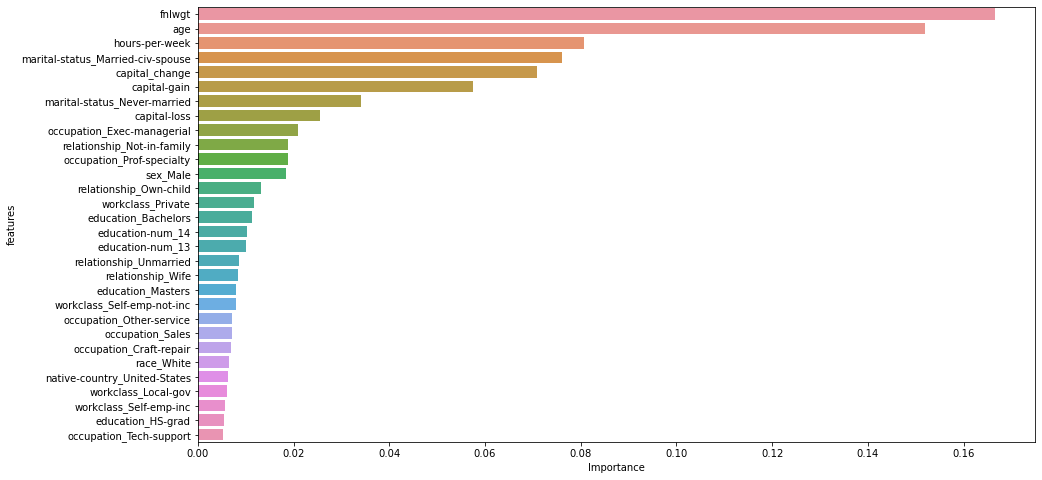

In [307]:
feature_imp=pd.DataFrame({'features':X_train.columns,'Importance':rf.feature_importances_})
feature_imp=feature_imp.sort_values(by='Importance',ascending=False)
sns.barplot(x='Importance',y='features',data=feature_imp.head(30))
plt.show()

### Hyperparameter tunning
#### Randomized Search

In [308]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
rf1=RandomForestClassifier(random_state=10)
params = {'n_estimators':sp_randint(100,110),
                 'criterion':['gini','entropy'], 
                'max_depth': sp_randint(2,10), 
                'min_samples_leaf': sp_randint(10,50), 
                'min_samples_split':sp_randint(10,20)}

In [309]:
rsearch = RandomizedSearchCV(estimator = rf1, param_distributions = params, cv = 3, scoring = 'roc_auc')
rsearch.fit(X_train, y_train)
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 40,
 'min_samples_split': 10,
 'n_estimators': 106}

In [310]:
rf1 = RandomForestClassifier(**rsearch.best_params_) 
rf1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=40,
                       min_samples_split=10, n_estimators=106)

### Train Result after hyperparameter tunning for Random Forest

In [311]:
y_pred_train_rf1=rf1.predict(X_train) 
y_pred_train_proba_rf1=rf1.predict_proba(X_train)[:,1]

In [312]:
print('ROC-AUC Score = ',roc_auc_score(y_train,y_pred_train_proba_rf1))
print()
print('Accuracy = ',accuracy_score(y_train,y_pred_train_rf1))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_train,y_pred_train_rf1))
print()
print('Classification Report = ','\n',classification_report(y_train,y_pred_train_rf1))

ROC-AUC Score =  0.9067224303902233

Accuracy =  0.8539805590043303

Confusion Matrix =  
 [[24515   784]
 [ 4038  3686]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     25299
           1       0.82      0.48      0.60      7724

    accuracy                           0.85     33023
   macro avg       0.84      0.72      0.76     33023
weighted avg       0.85      0.85      0.84     33023



In [313]:
Model = pd.Series({'Model_Name': "Random forest classifier_train with tunning",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_train, y_pred_train_proba_rf1),
                    'Precision Score': metrics.precision_score(y_train, y_pred_train_rf1),
                    'Recall Score': metrics.recall_score(y_train, y_pred_train_rf1),
                     'Accuracy Score': metrics.accuracy_score(y_train, y_pred_train_rf1),
                     'f1-score': metrics.f1_score(y_train, y_pred_train_rf1)})

score_card_train = score_card_train.append(Model, ignore_index=True)
score_card_train

Model_Name  AUC Score  \
0                        Logistic regression_train        NaN   
1                        K Nearest neighbour train        NaN   
2                                 Naive base_train        NaN   
3                              Decision tree_train        NaN   
4  Decision tree_train with hyperparameter tunning        NaN   
5                   Random forest classifier_train        NaN   
6      Random forest classifier_train with tunning        NaN   

   Precision Score  Recall Score  Accuracy Score  f1-score  Roc-AUC Score  
0         0.683321      0.240808        0.796324  0.356117       0.573881  
1         0.740670      0.452227        0.834842  0.561576       0.867336  
2         0.605017      0.702615        0.823154  0.650174       0.886478  
3         1.000000      0.999871        0.999970  0.999935       1.000000  
4         0.000000      0.000000        0.766102  0.999935       0.663184  
5         1.000000      0.999482        0.999879  0.999741       1.000000  
6         0.824609      0.477214        0.853981  0.604560       0.906722

### Test Result after hyperparameter tunning for Random Forest

In [314]:
y_pred_test_rf1=rf1.predict(X_test) 
y_pred_test_proba_rf1=rf1.predict_proba(X_test)[:,1]

In [315]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_test_proba_rf1))
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_test_rf1))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_test_rf1))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_test_rf1))

ROC-AUC Score =  0.9020785576497675

Accuracy =  0.8521266073194856

Confusion Matrix =  
 [[10512   332]
 [ 1761  1549]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     10844
           1       0.82      0.47      0.60      3310

    accuracy                           0.85     14154
   macro avg       0.84      0.72      0.75     14154
weighted avg       0.85      0.85      0.84     14154



In [316]:
Model = pd.Series({'Model_Name': "Random Forest_test result with tunning",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_test,y_pred_test_proba_rf1 ),
                    'Precision Score': metrics.precision_score(y_test, y_pred_test_rf1),
                    'Recall Score': metrics.recall_score(y_test, y_pred_test_rf1),
                     'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test_rf1),
                     'f1-score': metrics.f1_score(y_test, y_pred_test_rf1)})


score_card_test = score_card_test.append(Model, ignore_index=True)
score_card_test

Model_Name  Precision Score  Recall Score  \
0                Logistic regression_test         0.705455      0.234441   
1                K Nearest neighbour test         0.533090      0.309063   
2                Logistic regression_test         0.598650      0.696677   
3                      Decision tree_test         0.705455      0.234441   
4         Decision tree_test with tunning         0.000000      0.000000   
5               Random Forest_test result         0.718214      0.607553   
6  Random Forest_test result with tunning         0.823498      0.467976   

   Accuracy Score  f1-score  Roc-AUC Score  
0        0.798078  0.351927       0.562681  
1        0.775117  0.391279       0.672241  
2        0.819839  0.643954       0.883678  
3        0.798078  0.351927       0.743745  
4        0.766144  0.000000       0.656540  
5        0.852480  0.658265       0.898597  
6        0.852127  0.596802       0.902079

### Applying Boosting algorithm to check performance 

## AdaBOOST

In [317]:
ada=AdaBoostClassifier() 
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [318]:
y_pred_ada=ada.predict(X_train)
y_pred_proba_ada=ada.predict_proba(X_train)[:,1]

## Train result

In [319]:
print('ROC-AUC Score = ',roc_auc_score(y_train,y_pred_proba_ada)) 
print()
print('Accuracy = ',accuracy_score(y_train,y_pred_ada))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_train,y_pred_ada))
print()
print('Classification Report = ','\n',classification_report(y_train,y_pred_ada))

ROC-AUC Score =  0.9150449515559829

Accuracy =  0.8632468279683857

Confusion Matrix =  
 [[23844  1455]
 [ 3061  4663]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     25299
           1       0.76      0.60      0.67      7724

    accuracy                           0.86     33023
   macro avg       0.82      0.77      0.79     33023
weighted avg       0.86      0.86      0.86     33023



In [320]:
Model = pd.Series({'Model_Name': "Adaboost classifier_train",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_train, y_pred_train_proba_rf1),
                    'Precision Score': metrics.precision_score(y_train, y_pred_train_rf1),
                    'Recall Score': metrics.recall_score(y_train, y_pred_train_rf1),
                     'Accuracy Score': metrics.accuracy_score(y_train, y_pred_train_rf1),
                     'f1-score': metrics.f1_score(y_train, y_pred_train_rf1)})

score_card_train = score_card_train.append(Model, ignore_index=True)
score_card_train

Model_Name  AUC Score  \
0                        Logistic regression_train        NaN   
1                        K Nearest neighbour train        NaN   
2                                 Naive base_train        NaN   
3                              Decision tree_train        NaN   
4  Decision tree_train with hyperparameter tunning        NaN   
5                   Random forest classifier_train        NaN   
6      Random forest classifier_train with tunning        NaN   
7                        Adaboost classifier_train        NaN   

   Precision Score  Recall Score  Accuracy Score  f1-score  Roc-AUC Score  
0         0.683321      0.240808        0.796324  0.356117       0.573881  
1         0.740670      0.452227        0.834842  0.561576       0.867336  
2         0.605017      0.702615        0.823154  0.650174       0.886478  
3         1.000000      0.999871        0.999970  0.999935       1.000000  
4         0.000000      0.000000        0.766102  0.999935       0.663184  
5         1.000000      0.999482        0.999879  0.999741       1.000000  
6         0.824609      0.477214        0.853981  0.604560       0.906722  
7         0.824609      0.477214        0.853981  0.604560       0.906722

## Test result

In [321]:
y_pred_test_ada=ada.predict(X_test) 
y_pred_test_proba_ada=ada.predict_proba(X_test)[:,1]

In [322]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_test_proba_ada)) 
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_test_ada))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_test_ada))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_test_ada))

ROC-AUC Score =  0.9103925932282153

Accuracy =  0.8587678394800057

Confusion Matrix =  
 [[10212   632]
 [ 1367  1943]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     10844
           1       0.75      0.59      0.66      3310

    accuracy                           0.86     14154
   macro avg       0.82      0.76      0.79     14154
weighted avg       0.85      0.86      0.85     14154



In [323]:
Model = pd.Series({'Model_Name': "Adaboostclassifier_test",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_test,y_pred_test_proba_ada ),
                    'Precision Score': metrics.precision_score(y_test, y_pred_test_ada),
                    'Recall Score': metrics.recall_score(y_test, y_pred_test_ada),
                     'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test_ada),
                     'f1-score': metrics.f1_score(y_test, y_pred_test_ada)})


score_card_test = score_card_test.append(Model, ignore_index=True)
score_card_test

Model_Name  Precision Score  Recall Score  \
0                Logistic regression_test         0.705455      0.234441   
1                K Nearest neighbour test         0.533090      0.309063   
2                Logistic regression_test         0.598650      0.696677   
3                      Decision tree_test         0.705455      0.234441   
4         Decision tree_test with tunning         0.000000      0.000000   
5               Random Forest_test result         0.718214      0.607553   
6  Random Forest_test result with tunning         0.823498      0.467976   
7                 Adaboostclassifier_test         0.754563      0.587009   

   Accuracy Score  f1-score  Roc-AUC Score  
0        0.798078  0.351927       0.562681  
1        0.775117  0.391279       0.672241  
2        0.819839  0.643954       0.883678  
3        0.798078  0.351927       0.743745  
4        0.766144  0.000000       0.656540  
5        0.852480  0.658265       0.898597  
6        0.852127  0.596802       0.902079  
7        0.858768  0.660323       0.910393

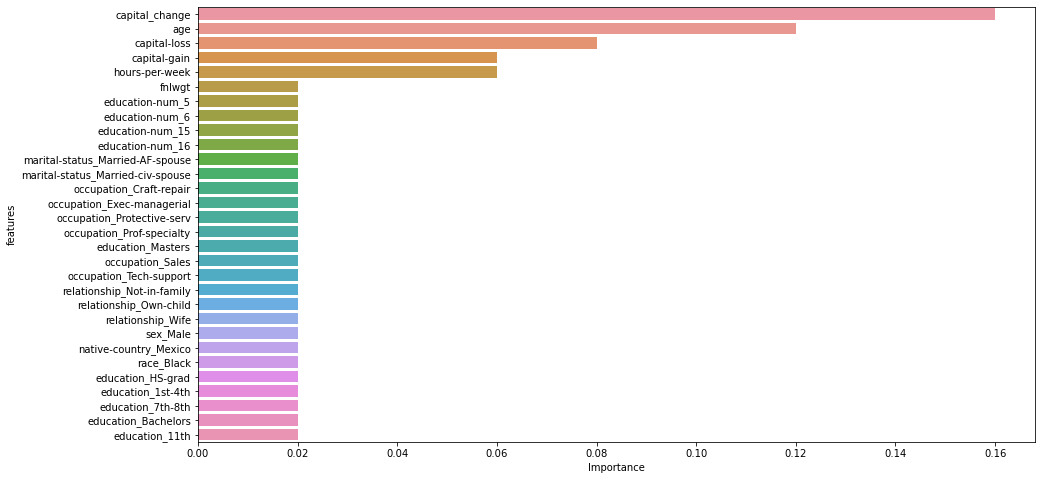

In [324]:
feature_imp=pd.DataFrame({'features':X_train.columns,'Importance':ada.feature_importances_})
feature_imp=feature_imp.sort_values(by='Importance',ascending=False)
sns.barplot(x='Importance',y='features',data=feature_imp.head(30))
plt.show()

## Gradient Boost

In [325]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

### Train result

In [326]:
y_pred_train_gboost_model=gboost_model.predict(X_train)
y_pred_train_proba_gboost_model=gboost_model.predict_proba(X_train)[:,1]

In [327]:
print('ROC-AUC Score = ',roc_auc_score(y_train,y_pred_train_proba_gboost_model)) 
print()
print('Accuracy = ',accuracy_score(y_train,y_pred_train_gboost_model))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_train,y_pred_train_gboost_model))
print()
print('Classification Report = ','\n',classification_report(y_train,y_pred_train_gboost_model))

ROC-AUC Score =  0.9862149290037501

Accuracy =  0.9434333646246555

Confusion Matrix =  
 [[24706   593]
 [ 1275  6449]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     25299
           1       0.92      0.83      0.87      7724

    accuracy                           0.94     33023
   macro avg       0.93      0.91      0.92     33023
weighted avg       0.94      0.94      0.94     33023



In [328]:
Model = pd.Series({'Model_Name': "GB-boost classifier_train",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_train, y_pred_train_proba_gboost_model),
                    'Precision Score': metrics.precision_score(y_train, y_pred_train_gboost_model),
                    'Recall Score': metrics.recall_score(y_train, y_pred_train_gboost_model),
                     'Accuracy Score': metrics.accuracy_score(y_train, y_pred_train_gboost_model),
                     'f1-score': metrics.f1_score(y_train, y_pred_train_gboost_model)})

score_card_train = score_card_train.append(Model, ignore_index=True)
score_card_train

Model_Name  AUC Score  \
0                        Logistic regression_train        NaN   
1                        K Nearest neighbour train        NaN   
2                                 Naive base_train        NaN   
3                              Decision tree_train        NaN   
4  Decision tree_train with hyperparameter tunning        NaN   
5                   Random forest classifier_train        NaN   
6      Random forest classifier_train with tunning        NaN   
7                        Adaboost classifier_train        NaN   
8                        GB-boost classifier_train        NaN   

   Precision Score  Recall Score  Accuracy Score  f1-score  Roc-AUC Score  
0         0.683321      0.240808        0.796324  0.356117       0.573881  
1         0.740670      0.452227        0.834842  0.561576       0.867336  
2         0.605017      0.702615        0.823154  0.650174       0.886478  
3         1.000000      0.999871        0.999970  0.999935       1.000000  
4         0.000000      0.000000        0.766102  0.999935       0.663184  
5         1.000000      0.999482        0.999879  0.999741       1.000000  
6         0.824609      0.477214        0.853981  0.604560       0.906722  
7         0.824609      0.477214        0.853981  0.604560       0.906722  
8         0.915791      0.834930        0.943433  0.873493       0.986215

### Test result

In [329]:
y_pred_test_gboost_model=gboost_model.predict(X_test) 
y_pred_test_proba_gboost_model=gboost_model.predict_proba(X_test)[:,1]

In [330]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_test_proba_gboost_model)) 
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_test_gboost_model))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_test_gboost_model))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_test_gboost_model))

ROC-AUC Score =  0.9227458541401764

Accuracy =  0.8685883849088597

Confusion Matrix =  
 [[10191   653]
 [ 1207  2103]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     10844
           1       0.76      0.64      0.69      3310

    accuracy                           0.87     14154
   macro avg       0.83      0.79      0.80     14154
weighted avg       0.86      0.87      0.86     14154



In [331]:
Model = pd.Series({'Model_Name': "GB-boostclassifier_test",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_test,y_pred_test_proba_gboost_model ),
                    'Precision Score': metrics.precision_score(y_test, y_pred_test_gboost_model),
                    'Recall Score': metrics.recall_score(y_test, y_pred_test_gboost_model),
                     'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test_gboost_model),
                     'f1-score': metrics.f1_score(y_test, y_pred_test_gboost_model)})


score_card_test = score_card_test.append(Model, ignore_index=True)
score_card_test

Model_Name  Precision Score  Recall Score  \
0                Logistic regression_test         0.705455      0.234441   
1                K Nearest neighbour test         0.533090      0.309063   
2                Logistic regression_test         0.598650      0.696677   
3                      Decision tree_test         0.705455      0.234441   
4         Decision tree_test with tunning         0.000000      0.000000   
5               Random Forest_test result         0.718214      0.607553   
6  Random Forest_test result with tunning         0.823498      0.467976   
7                 Adaboostclassifier_test         0.754563      0.587009   
8                 GB-boostclassifier_test         0.763062      0.635347   

   Accuracy Score  f1-score  Roc-AUC Score  
0        0.798078  0.351927       0.562681  
1        0.775117  0.391279       0.672241  
2        0.819839  0.643954       0.883678  
3        0.798078  0.351927       0.743745  
4        0.766144  0.000000       0.656540  
5        0.852480  0.658265       0.898597  
6        0.852127  0.596802       0.902079  
7        0.858768  0.660323       0.910393  
8        0.868588  0.693373       0.922746

## XG boost

In [332]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## Train result 

In [333]:
y_pred_train_xgb=xgb.predict(X_train)
y_pred_train_proba_xgb=xgb.predict_proba(X_train)[:,1]

In [334]:
print('ROC-AUC Score = ',roc_auc_score(y_train,y_pred_train_proba_xgb)) 
print()
print('Accuracy = ',accuracy_score(y_train,y_pred_train_xgb))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_train,y_pred_train_xgb))
print()
print('Classification Report = ','\n',classification_report(y_train,y_pred_train_xgb))

ROC-AUC Score =  0.9561154879715251

Accuracy =  0.8976773763740423

Confusion Matrix =  
 [[24221  1078]
 [ 2301  5423]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     25299
           1       0.83      0.70      0.76      7724

    accuracy                           0.90     33023
   macro avg       0.87      0.83      0.85     33023
weighted avg       0.89      0.90      0.89     33023



In [335]:
Model = pd.Series({'Model_Name': "XGboost classifier_train",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_train, y_pred_train_proba_xgb),
                    'Precision Score': metrics.precision_score(y_train, y_pred_train_xgb),
                    'Recall Score': metrics.recall_score(y_train, y_pred_train_xgb),
                     'Accuracy Score': metrics.accuracy_score(y_train, y_pred_train_xgb),
                     'f1-score': metrics.f1_score(y_train, y_pred_train_xgb)})

score_card_train = score_card_train.append(Model, ignore_index=True)
score_card_train

Model_Name  AUC Score  \
0                        Logistic regression_train        NaN   
1                        K Nearest neighbour train        NaN   
2                                 Naive base_train        NaN   
3                              Decision tree_train        NaN   
4  Decision tree_train with hyperparameter tunning        NaN   
5                   Random forest classifier_train        NaN   
6      Random forest classifier_train with tunning        NaN   
7                        Adaboost classifier_train        NaN   
8                        GB-boost classifier_train        NaN   
9                         XGboost classifier_train        NaN   

   Precision Score  Recall Score  Accuracy Score  f1-score  Roc-AUC Score  
0         0.683321      0.240808        0.796324  0.356117       0.573881  
1         0.740670      0.452227        0.834842  0.561576       0.867336  
2         0.605017      0.702615        0.823154  0.650174       0.886478  
3         1.000000      0.999871        0.999970  0.999935       1.000000  
4         0.000000      0.000000        0.766102  0.999935       0.663184  
5         1.000000      0.999482        0.999879  0.999741       1.000000  
6         0.824609      0.477214        0.853981  0.604560       0.906722  
7         0.824609      0.477214        0.853981  0.604560       0.906722  
8         0.915791      0.834930        0.943433  0.873493       0.986215  
9         0.834179      0.702097        0.897677  0.762460       0.956115

## Test result 

In [336]:
y_pred_test_xgb=xgb.predict(X_test) 
y_pred_test_proba_xgb=xgb.predict_proba(X_test)[:,1]

In [337]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_test_proba_xgb)) 
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_test_xgb))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_test_xgb))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_test_xgb))

ROC-AUC Score =  0.9259289946631215

Accuracy =  0.8715557439593048

Confusion Matrix =  
 [[10203   641]
 [ 1177  2133]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     10844
           1       0.77      0.64      0.70      3310

    accuracy                           0.87     14154
   macro avg       0.83      0.79      0.81     14154
weighted avg       0.87      0.87      0.87     14154



In [338]:
Model = pd.Series({'Model_Name': "XGboostclassifier_test",
                   'Roc-AUC Score' : metrics.roc_auc_score(y_test,y_pred_test_proba_xgb ),
                    'Precision Score': metrics.precision_score(y_test, y_pred_test_xgb),
                    'Recall Score': metrics.recall_score(y_test, y_pred_test_xgb),
                     'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test_xgb),
                     'f1-score': metrics.f1_score(y_test, y_pred_test_xgb)})


score_card_test = score_card_test.append(Model, ignore_index=True)
score_card_test

Model_Name  Precision Score  Recall Score  \
0                Logistic regression_test         0.705455      0.234441   
1                K Nearest neighbour test         0.533090      0.309063   
2                Logistic regression_test         0.598650      0.696677   
3                      Decision tree_test         0.705455      0.234441   
4         Decision tree_test with tunning         0.000000      0.000000   
5               Random Forest_test result         0.718214      0.607553   
6  Random Forest_test result with tunning         0.823498      0.467976   
7                 Adaboostclassifier_test         0.754563      0.587009   
8                 GB-boostclassifier_test         0.763062      0.635347   
9                  XGboostclassifier_test         0.768926      0.644411   

   Accuracy Score  f1-score  Roc-AUC Score  
0        0.798078  0.351927       0.562681  
1        0.775117  0.391279       0.672241  
2        0.819839  0.643954       0.883678  
3        0.798078  0.351927       0.743745  
4        0.766144  0.000000       0.656540  
5        0.852480  0.658265       0.898597  
6        0.852127  0.596802       0.902079  
7        0.858768  0.660323       0.910393  
8        0.868588  0.693373       0.922746  
9        0.871556  0.701183       0.925929

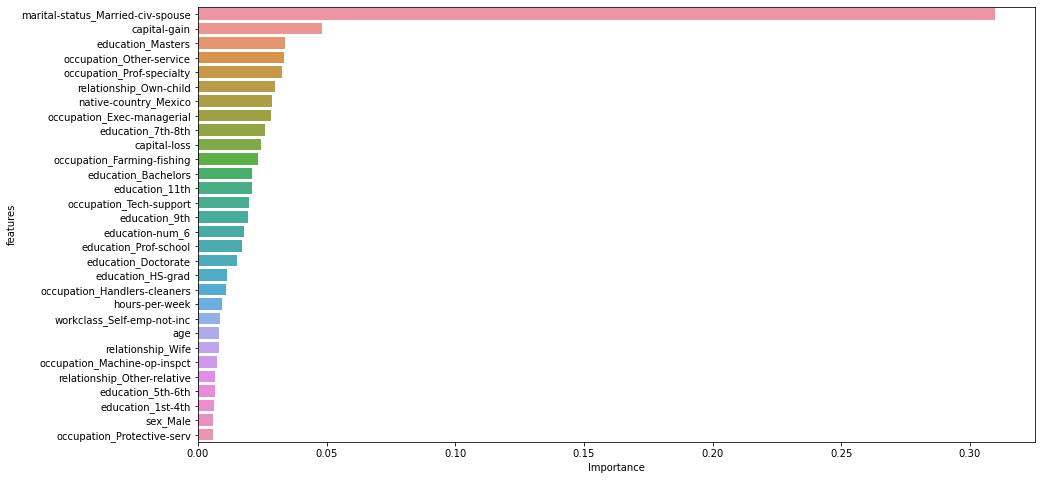

In [339]:
feature_imp=pd.DataFrame({'features':X_train.columns,'Importance':xgb.feature_importances_})
feature_imp=feature_imp.sort_values(by='Importance',ascending=False)
sns.barplot(x='Importance',y='features',data=feature_imp.head(30))
plt.show()

## SCORE card - train 

In [340]:
score_card_train.drop('AUC Score',axis=1,inplace=True)

In [341]:
score_card_train

Model_Name  Precision Score  \
0                        Logistic regression_train         0.683321   
1                        K Nearest neighbour train         0.740670   
2                                 Naive base_train         0.605017   
3                              Decision tree_train         1.000000   
4  Decision tree_train with hyperparameter tunning         0.000000   
5                   Random forest classifier_train         1.000000   
6      Random forest classifier_train with tunning         0.824609   
7                        Adaboost classifier_train         0.824609   
8                        GB-boost classifier_train         0.915791   
9                         XGboost classifier_train         0.834179   

   Recall Score  Accuracy Score  f1-score  Roc-AUC Score  
0      0.240808        0.796324  0.356117       0.573881  
1      0.452227        0.834842  0.561576       0.867336  
2      0.702615        0.823154  0.650174       0.886478  
3      0.999871        0.999970  0.999935       1.000000  
4      0.000000        0.766102  0.999935       0.663184  
5      0.999482        0.999879  0.999741       1.000000  
6      0.477214        0.853981  0.604560       0.906722  
7      0.477214        0.853981  0.604560       0.906722  
8      0.834930        0.943433  0.873493       0.986215  
9      0.702097        0.897677  0.762460       0.956115

## SCORE card - test

In [342]:
score_card_test

Model_Name  Precision Score  Recall Score  \
0                Logistic regression_test         0.705455      0.234441   
1                K Nearest neighbour test         0.533090      0.309063   
2                Logistic regression_test         0.598650      0.696677   
3                      Decision tree_test         0.705455      0.234441   
4         Decision tree_test with tunning         0.000000      0.000000   
5               Random Forest_test result         0.718214      0.607553   
6  Random Forest_test result with tunning         0.823498      0.467976   
7                 Adaboostclassifier_test         0.754563      0.587009   
8                 GB-boostclassifier_test         0.763062      0.635347   
9                  XGboostclassifier_test         0.768926      0.644411   

   Accuracy Score  f1-score  Roc-AUC Score  
0        0.798078  0.351927       0.562681  
1        0.775117  0.391279       0.672241  
2        0.819839  0.643954       0.883678  
3        0.798078  0.351927       0.743745  
4        0.766144  0.000000       0.656540  
5        0.852480  0.658265       0.898597  
6        0.852127  0.596802       0.902079  
7        0.858768  0.660323       0.910393  
8        0.868588  0.693373       0.922746  
9        0.871556  0.701183       0.925929

In [ ]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier())]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring="f1_weighted",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.757381 (0.002918)


In [ ]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier())]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="f1_weighted",n_jobs=-1)
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)